# After Analysis

Combine results from several analyses of single-colloid diffusion processes. These results are stored in .mat files. 

<u>Rk:</u> all the required information for further analysis and plotting (_e.g._ frame rates) should be included in the .mat files.

Figures settings are made according to _Science_'s first submission rules. 

# Importations

In [1]:
import numpy as np
from scipy.io import loadmat, savemat
from scipy import interpolate

In [2]:
import ComputeObservables as co
# Personnal .py with functions used to compute observables (PDF, forces, etc.). 
# Copy past the .py in site-packages or in the same floder as the notebook.

# This should be converted into a class. Or use what Maxime did. 

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib as mpl
from matplotlib import rc
import matplotlib.colors as mplcolors
from mpltools import annotation
from matplotlib.ticker import ScalarFormatter

rc('lines', linewidth=1.5, markeredgecolor='k', markeredgewidth=1)
rc('xtick', direction='in', labelsize=8)
rc('ytick', direction='in', labelsize=8)

rc('font', family='serif', size=8)
rc('text', usetex=True)

rc('figure', dpi=500)
rc('savefig', dpi=500)

# Load the data

In [4]:
# Trajectories over glass cover slip

### PS in salted water (3-um or 6-um spheres) 
dir0_0 = '../../traj_and_results/ref_PS_water/maxou_PRR_SFI_order_2/data_exp_PS_exp_2020_analysis_20230930_filename_data_exp_glass_exp_2020_analysis_20230322_filename_TRAJ_MAXOU_fit_result_dur_27052020_n_r_fix_0p0513_wav_532_r_1p516_n_1p597.mat'
dir0_1 = '../../traj_and_results/ref_PS_water/C4_SFI_order_2/data_exp_PS_exp_20211019_analysis_20230929_filename_data_exp_glass_exp_20211019_analysis_20230419_filename_TRAJ_C4_fit_result_rigid_08122021rp_1p5185_np_1p5819.mat'
dir0_2 = '../../../analysis_glass/verre_2023_03_3um/5/data_exp_glass_exp_20230310_analysis_20230422_filename_traj_rp_1p4749_np_1p5843.mat'
dir0_3 = '../../../analysis_glass/verre_2023_08_6um/5/data_exp_PS_exp_20230824_analysis_20230829_filename_traj_rp_2p9713_np_1p5884_vid_5.mat'
dir0_4 = '../../../analysis_glass/verre_2023_08_6um/3/data_exp_PS_exp_20230824_analysis_20230829_filename_traj_rp_2p9864_np_1p5864_vid_3.mat'
dir0_5 = '../../../analysis_glass/verre_2023_08_6um/1/data_exp_PS_exp_20230824_analysis_20230829_filename_traj_rp_2p9765_np_1p5862_vid_1.mat'
dir0_6 = '../../traj_and_results/ref_PS_water/PS_3um_march_2023/3/data_exp_glass_exp_20230310_analysis_20230424_filename_traj_rp_1p4749_np_1p5812.mat'
dir0_7 = '../../traj_and_results/ref_PS_water/PS_3um_march_2023/6/data_exp_glass_exp_20230310_analysis_20230424_filename_traj_rp_1p4711_np_1p5834.mat'
dir0_8 = '../../traj_and_results/ref_PS_water/PS_3um_march_2023/5/data_exp_glass_exp_20230310_analysis_20230422_filename_traj_rp_1p4749_np_1p5843.mat'

### AR-1000 droplets in pure water
dir1 = '../2nd_try_only_perfect_exp/AR1000_water/data_after_analysis/'
dir1_0 = dir1 + 'data_exp_AR1000_exp_20230627_analysis_20240108_filename_traj_rp_1p6166_np_1p4649_vid_3.mat'
dir1_1 = dir1 + 'data_exp_AR1000_exp_20230721_analysis_20240108_filename_traj_rp_1p5248_np_1p4669_vid_10.mat'
dir1_2 = dir1 + 'data_exp_AR1000_exp_20230912_analysis_20240108_filename_traj_rp_2p004_np_1p4597_vid_3.mat'
dir1_3 = dir1 + 'data_exp_AR1000_exp_20230912_analysis_20240108_filename_traj_rp_2p0075_np_1p4584_vid_1.mat'

### AR-1000 droplets in water-EG mixture (w30% EG)
dir2 = '../2nd_try_only_perfect_exp/AR1000_water_EG_30/data_after_analysis/'
# dir2_0 = dir2 + 'data_exp_AR1000_exp_20230918_analysis_20240219_filename_traj_rp_2p3139_np_1p4619_vid_4.mat'
dir2_0 = dir2 + '../data_exp_AR1000_exp_20230918_analysis_20240404_filename_traj_rp_2p3139_np_1p4619_vid_4.mat'

### AR-1000 droplets in water-EG mixture (w40% EG)
dir3 = '../2nd_try_only_perfect_exp/AR1000_water_EG_40/data_after_analysis/'
# dir3_0 = dir3 + 'data_exp_AR1000_exp_20240221_analysis_20240222_filename_traj_rp_2p5836_np_1p4623_vid_5_50fps.mat'
dir3_0 = dir3 + '../data_exp_AR1000_exp_20240221_analysis_20240222_filename_traj_rp_2p5836_np_1p4623_vid_5_50fps.mat'

In [5]:
data0_0 = loadmat(dir0_0, squeeze_me=True)
data0_1 = loadmat(dir0_1, squeeze_me=True)
data0_2 = loadmat(dir0_2, squeeze_me=True)
data0_3 = loadmat(dir0_3, squeeze_me=True)
data0_4 = loadmat(dir0_4, squeeze_me=True)
data0_5 = loadmat(dir0_5, squeeze_me=True)
data0_6 = loadmat(dir0_6, squeeze_me=True)
data0_7 = loadmat(dir0_7, squeeze_me=True)
data0_8 = loadmat(dir0_8, squeeze_me=True)

data1_0 = loadmat(dir1_0, squeeze_me=True)
data1_1 = loadmat(dir1_1, squeeze_me=True)
data1_2 = loadmat(dir1_2, squeeze_me=True)
data1_3 = loadmat(dir1_3, squeeze_me=True)

data2_0 = loadmat(dir2_0, squeeze_me=True)

data3_0 = loadmat(dir3_0, squeeze_me=True)

In [6]:
datas_rigid = [data0_0, data0_1, data0_2, data0_3, data0_4, data0_5, data0_6, data0_7, data0_8]
datas_water = [data1_0, data1_1, data1_2, data1_3]
datas_wEG30 = [data2_0]
datas_wEG40 = [data3_0]

In [7]:
datas = datas_rigid + datas_water + datas_wEG30 + datas_wEG40

In [8]:
# for data in datas_rigid:
#     print(data['filename'])

# Plot Observables For One Trajectory

In [92]:
# Select one set of data
# data = datas_rigid[2] 
data =  datas_water[0]

In [93]:
data['fitted_B']

5.834135276286734

In [94]:
data['fitted_lD']

4.991615047149231e-08

In [95]:
data['lB_theory']

3.2915208559634465e-07

In [96]:
data['fitted_lB']

3.600982549287481e-07

In [97]:
data['fitted_z0']

-3.9114252266201976e-09

In [98]:
# Get data 
r = data['r']

fps = data['fps']
t = data['time']
z = data['z_dedrift']

D0 = data['D0']
z_D = data['z_D']
D_perp_z = data['D_perp_z']

x_F_eq = data['x_F_eq']
y_F_eq = data['y_F_eq']
x_F_eq_theory = data['x_F_eq_theory']
y_F_eq_theory = data['y_F_eq_theory']
width_F_eq = data['width_F_eq']
x_F_tot = data['x_F_tot']
y_F_tot = data['y_F_tot']
x_F_err_th = data['x_F_err_th']
y_F_err_th = data['y_F_err_th']
x_F_nc = data['x_F_nc']
y_F_nc = data['y_F_nc']

x_pdf_z = data['x_pdf_z']
y_pdf_z = data['y_pdf_z']
width_pdf_z = data['width_pdf_z']
err_y_pdf_z = data['err_y_pdf_z']
x_pdf_z_theory = data['x_pdf_z_theory']
y_pdf_z_theory = data['y_pdf_z_theory']

z0 = data['fitted_z0']
B = data['fitted_B']
lD = data['fitted_lD']
lB = data['fitted_lB']
b = data['fitted_b']

delta_time_MSD = data['delta_time_MSD'] 
MSD_para = data['MSD_para']
MSD_perp = data['MSD_perp']
mean_D_para_from_multifit = data['mean_D_para_from_multifit']
mean_D_perp_from_multifit = data['mean_D_perp_from_multifit']
plateau_MSDz_theory = data['plateau_MSDz_theory']

z_D_max = data['z_D_max']
x_D_para_z = data['x_D_para_z']
y_D_para_z = data['y_D_para_z']
err_y_D_para_z = data['err_y_D_para_z']
x_D_para_z_theory = data['x_D_para_z_theory']
y_D_para_z_theory = data['y_D_para_z_theory']
x_D_perp_z = data['x_D_perp_z']
y_D_perp_z = data['y_D_perp_z']
err_y_D_perp_z = data['err_y_D_perp_z']
x_D_perp_z_theory = data['x_D_perp_z_theory']
y_D_perp_z_theory = data['y_D_perp_z_theory']

bins_centers_long = data['bins_centers_long']
proba_deltaz_long = data['proba_deltaz_long']
err_proba_deltaz_long = data['err_proba_deltaz_long']
proba_deltaz_long_theory = data['proba_deltaz_long_theory']

In [99]:
D0 / (4e-21 / (4/3*np.pi*r**3*1070))

6.214073887111111e-07

In [100]:
plateau_MSDz_theory

2.6612461289789833e-13

In [101]:
1000 * lB ** 2 / 0.001

1.2967075320272966e-07

In [102]:
lB / np.sqrt(4/3*np.pi*r**3*1070)

2.6168628483672

In [103]:
1070 * r**2 / 0.001

2.7963332491999993e-06

In [104]:
D0

1.3126722181689583e-13

In [105]:
r

1.6166e-06

In [106]:
mean_D_perp_from_multifit

0.20534037387265497

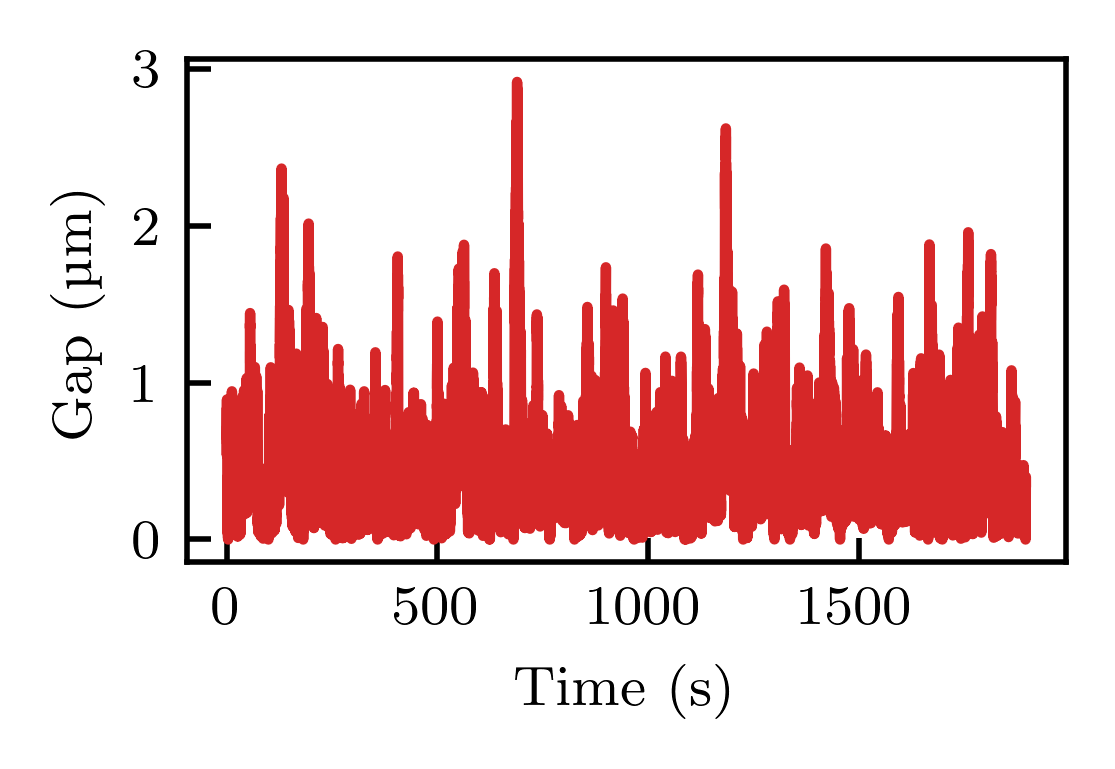

In [107]:
# Trajectory

fig, ax1 = plt.subplots(1, 1, figsize=(5.77/2.54, 4/2.54))

ax1.plot(t, z * 1e6, '-', color='tab:red')

ax1.set(
    xlabel='Time (s)', 
    ylabel='Gap (µm)', 
    xscale='linear', 
    yscale='linear', 
)

plt.tight_layout()
plt.show()

In [108]:
# Normalized perpendicular diffusion profile, using Pade's approximation, with a noise level
def Dperp_z(z, b, z0=0, nl=0):
    z = z - z0 + b
    res = (6 * z ** 2 + 2 * r * z) / (6 * z ** 2 + 9 * r * z + 2 * r ** 2)
    res += nl
    return res

D_perp_z_th = Dperp_z(z_D, b=0, z0=0, nl=0)

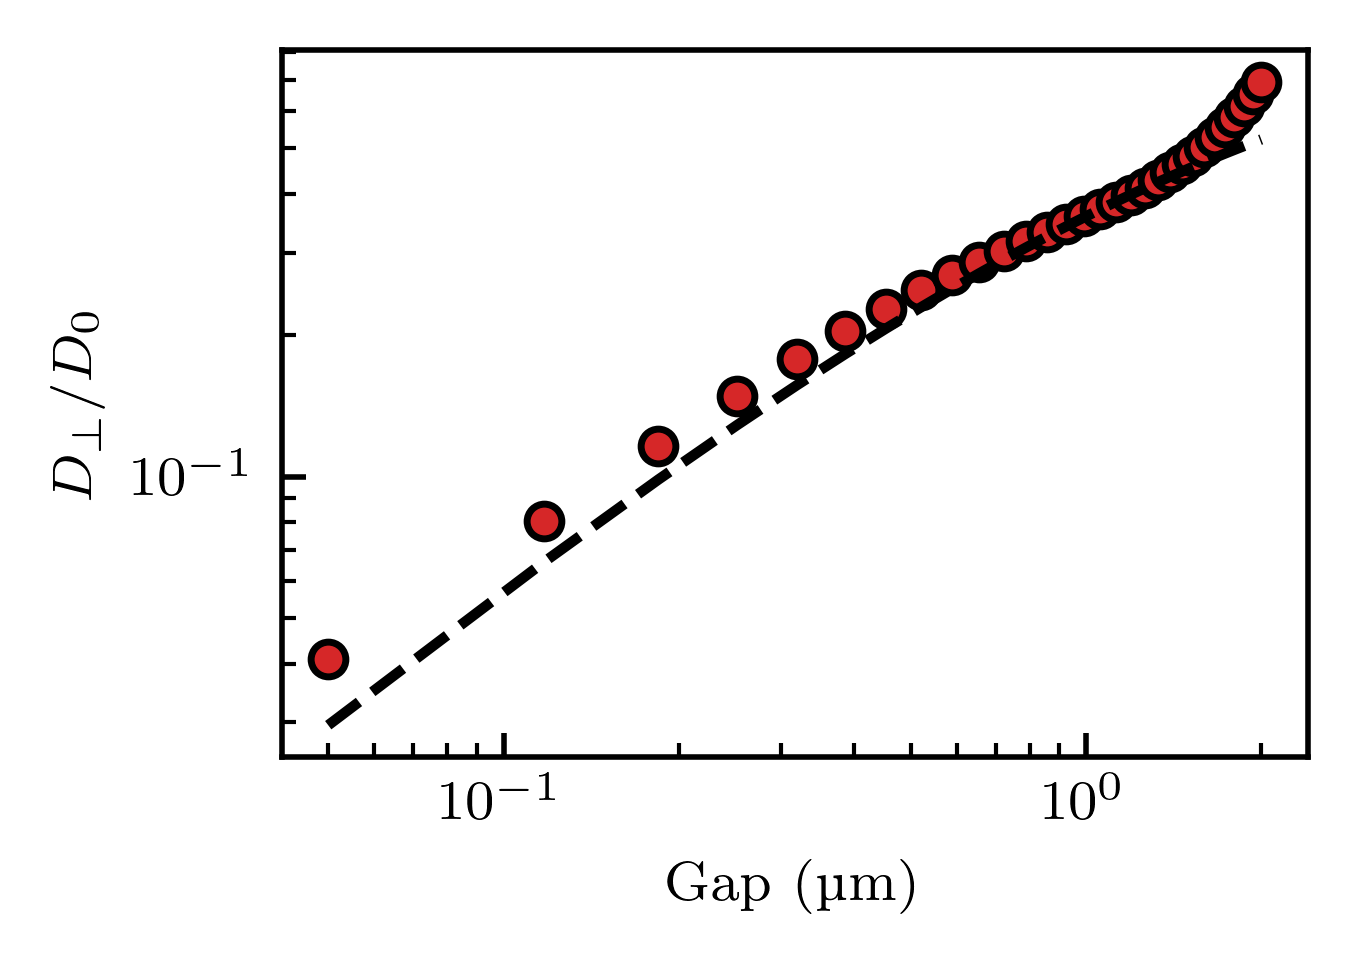

In [109]:
# Diffusion profile

fig, ax1 = plt.subplots(1, 1, figsize=(7/2.54, 5/2.54))

ax1.plot(z_D * 1e6, D_perp_z, 'o', markerfacecolor='tab:red', markersize=5)
ax1.plot(z_D * 1e6, D_perp_z_th, '--', color='k')

ax1.set(
    xlabel='Gap (µm)',
    ylabel=r'$D_\perp / D_0$', 
    xscale='log', 
    yscale='log', 
)

plt.tight_layout()
plt.show()

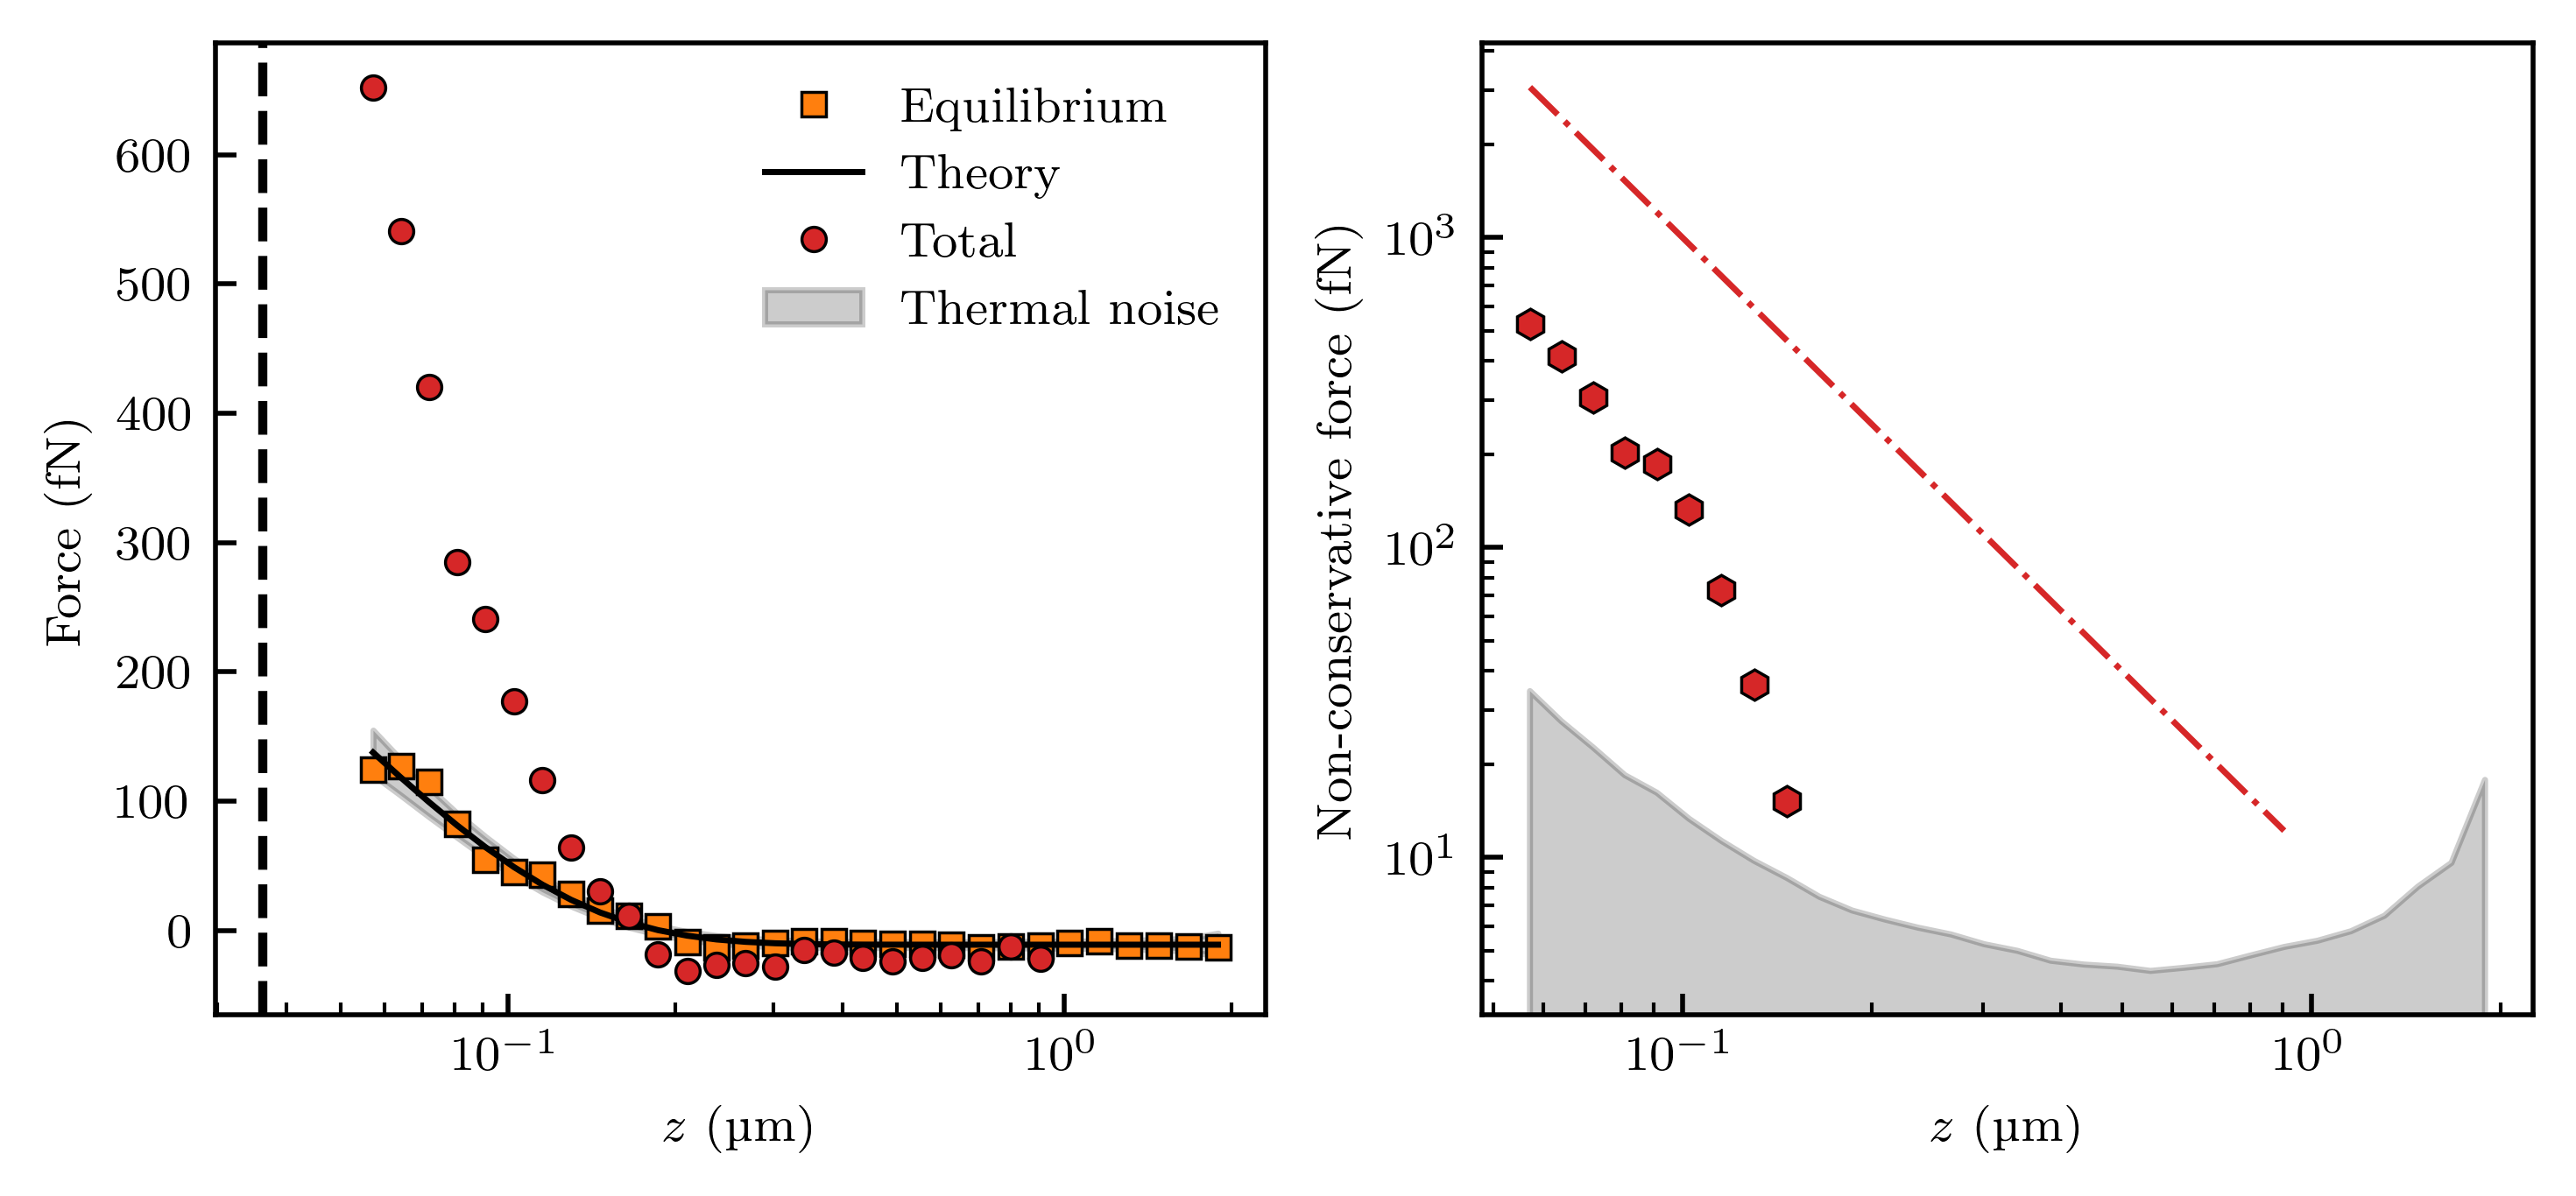

In [110]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15/2.54, 7/2.54))

ax1.plot(x_F_eq * 1e6, y_F_eq * 1e15, 's', markerfacecolor='tab:orange', markersize=4, markeredgecolor='k', markeredgewidth=0.5, label="Equilibrium")
ax1.plot(x_F_eq_theory * 1e6, y_F_eq_theory * 1e15, ls='-', linewidth=1, c='k', label="Theory")
ax1.plot(x_F_tot * 1e6, y_F_tot * 1e15, 'o', markerfacecolor='tab:red', markersize=4, markeredgecolor='k', markeredgewidth=0.5, label="Total")
ax1.fill_between(
    x_F_eq_theory * 1e6, (y_F_eq_theory - 1/2 * y_F_err_th)*1e15, (y_F_eq_theory + 1/2 * y_F_err_th)*1e15, 
    alpha = 0.2, color ="k", label = "Thermal noise", 
)
ax1.axvline(x=(b-z0)*1e6, ls='--', c='k')
ax1.legend(frameon=False)
ax1.set(
    xlabel="$z$ (µm)", 
    ylabel="Force (fN)", 
    xscale="log", 
    yscale="linear", 
)

ax2.plot(x_F_nc * 1e6, y_F_nc * 1e15, 'h', markerfacecolor='tab:red', markersize=5, markeredgecolor='k', markeredgewidth=0.5)
ax2.plot(x_F_nc * 1e6, x_F_nc ** -2 * 1e-11, ls='-.', linewidth=1, c='tab:red', label="Slope 2")
ax2.fill_between(
    x_F_err_th * 1e6, (np.zeros(len(x_F_err_th)) - 1 * y_F_err_th)*1e15, (np.zeros(len(x_F_err_th)) + 1 * y_F_err_th)*1e15, 
    alpha = 0.2, color ="k", label = "Thermal noise", 
)
# ax2.legend(frameon=False)
ax2.set(
    xlabel="$z$ (µm)", 
    ylabel="Non-conservative force (fN)", 
    xscale="log", 
    yscale="log", 
)

plt.tight_layout(pad=1)
plt.show()

In [111]:
# fig.savefig('')

In [112]:
5.7 / 1.62

3.5185185185185186

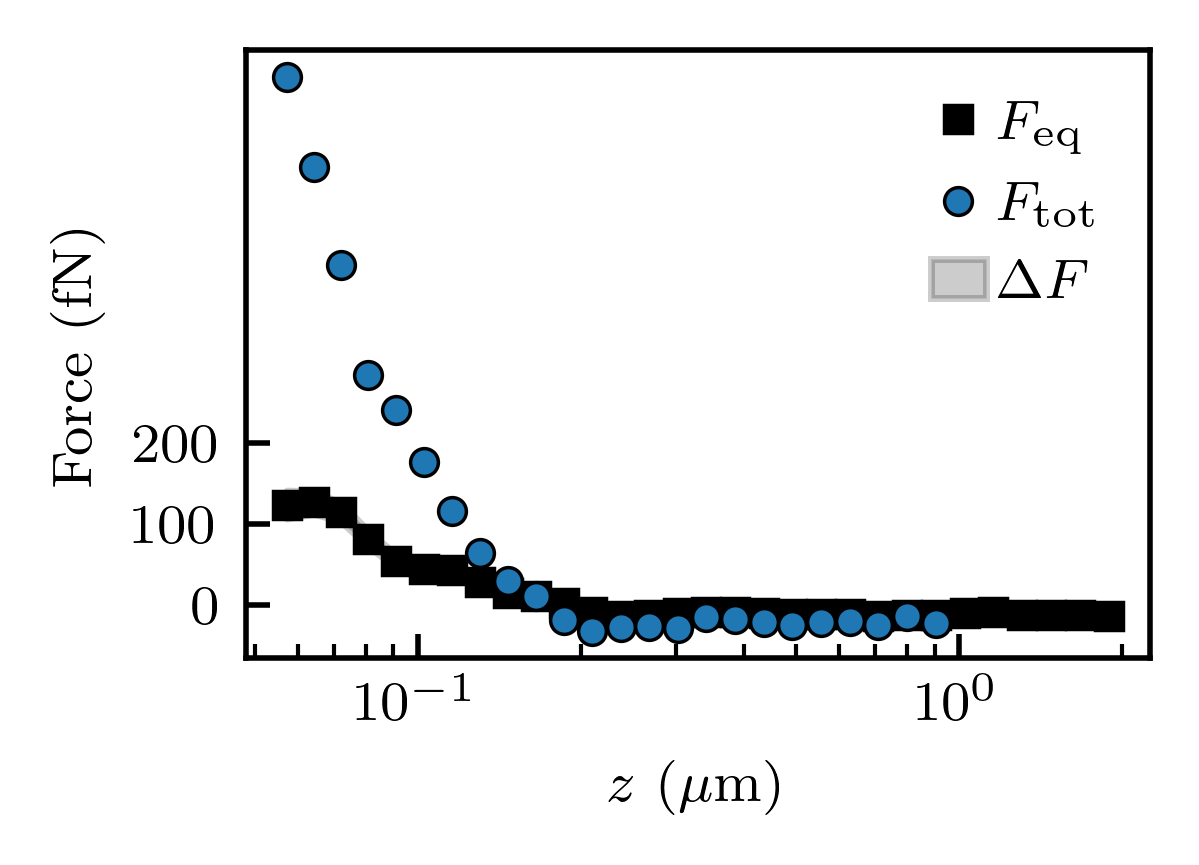

In [113]:
fig, ax1 = plt.subplots(1, 1, figsize=(5.7/2.54, 4/2.54))

ax1.plot(
    x_F_eq * 1e6, y_F_eq * 1e15, 
    's', markerfacecolor='k', markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    label=r"$F_\mathrm{eq}$")
# ax1.plot(x_F_eq_theory * 1e6, y_F_eq_theory * 1e15, ls='-', linewidth=1, c='k', label="Theory")
ax1.plot(
    x_F_tot * 1e6, y_F_tot * 1e15, 
    'o', markerfacecolor='tab:blue', markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    label=r"$F_\mathrm{tot}$"
)
ax1.fill_between(
    x_F_eq_theory * 1e6, (y_F_eq - 1/2 * y_F_err_th)*1e15, (y_F_eq + 1/2 * y_F_err_th)*1e15, 
    alpha = 0.2, color ="k", 
    label = r"$\Delta F$", 
)

ax1.legend(frameon=False, handletextpad=0.2, handlelength=1)
ax1.set(
    xlabel=r"$z$ ($\mu$m)", 
    ylabel="Force (fN)", 
    xscale="log", 
    yscale="linear", 
    yticks=[0, 100, 200], 
)

plt.tight_layout(pad=0.2)
plt.show()

In [114]:
# fig.savefig('figure_SI_forces.pdf')

In [115]:
z_Pmax = x_pdf_z[y_pdf_z == np.max(y_pdf_z)]

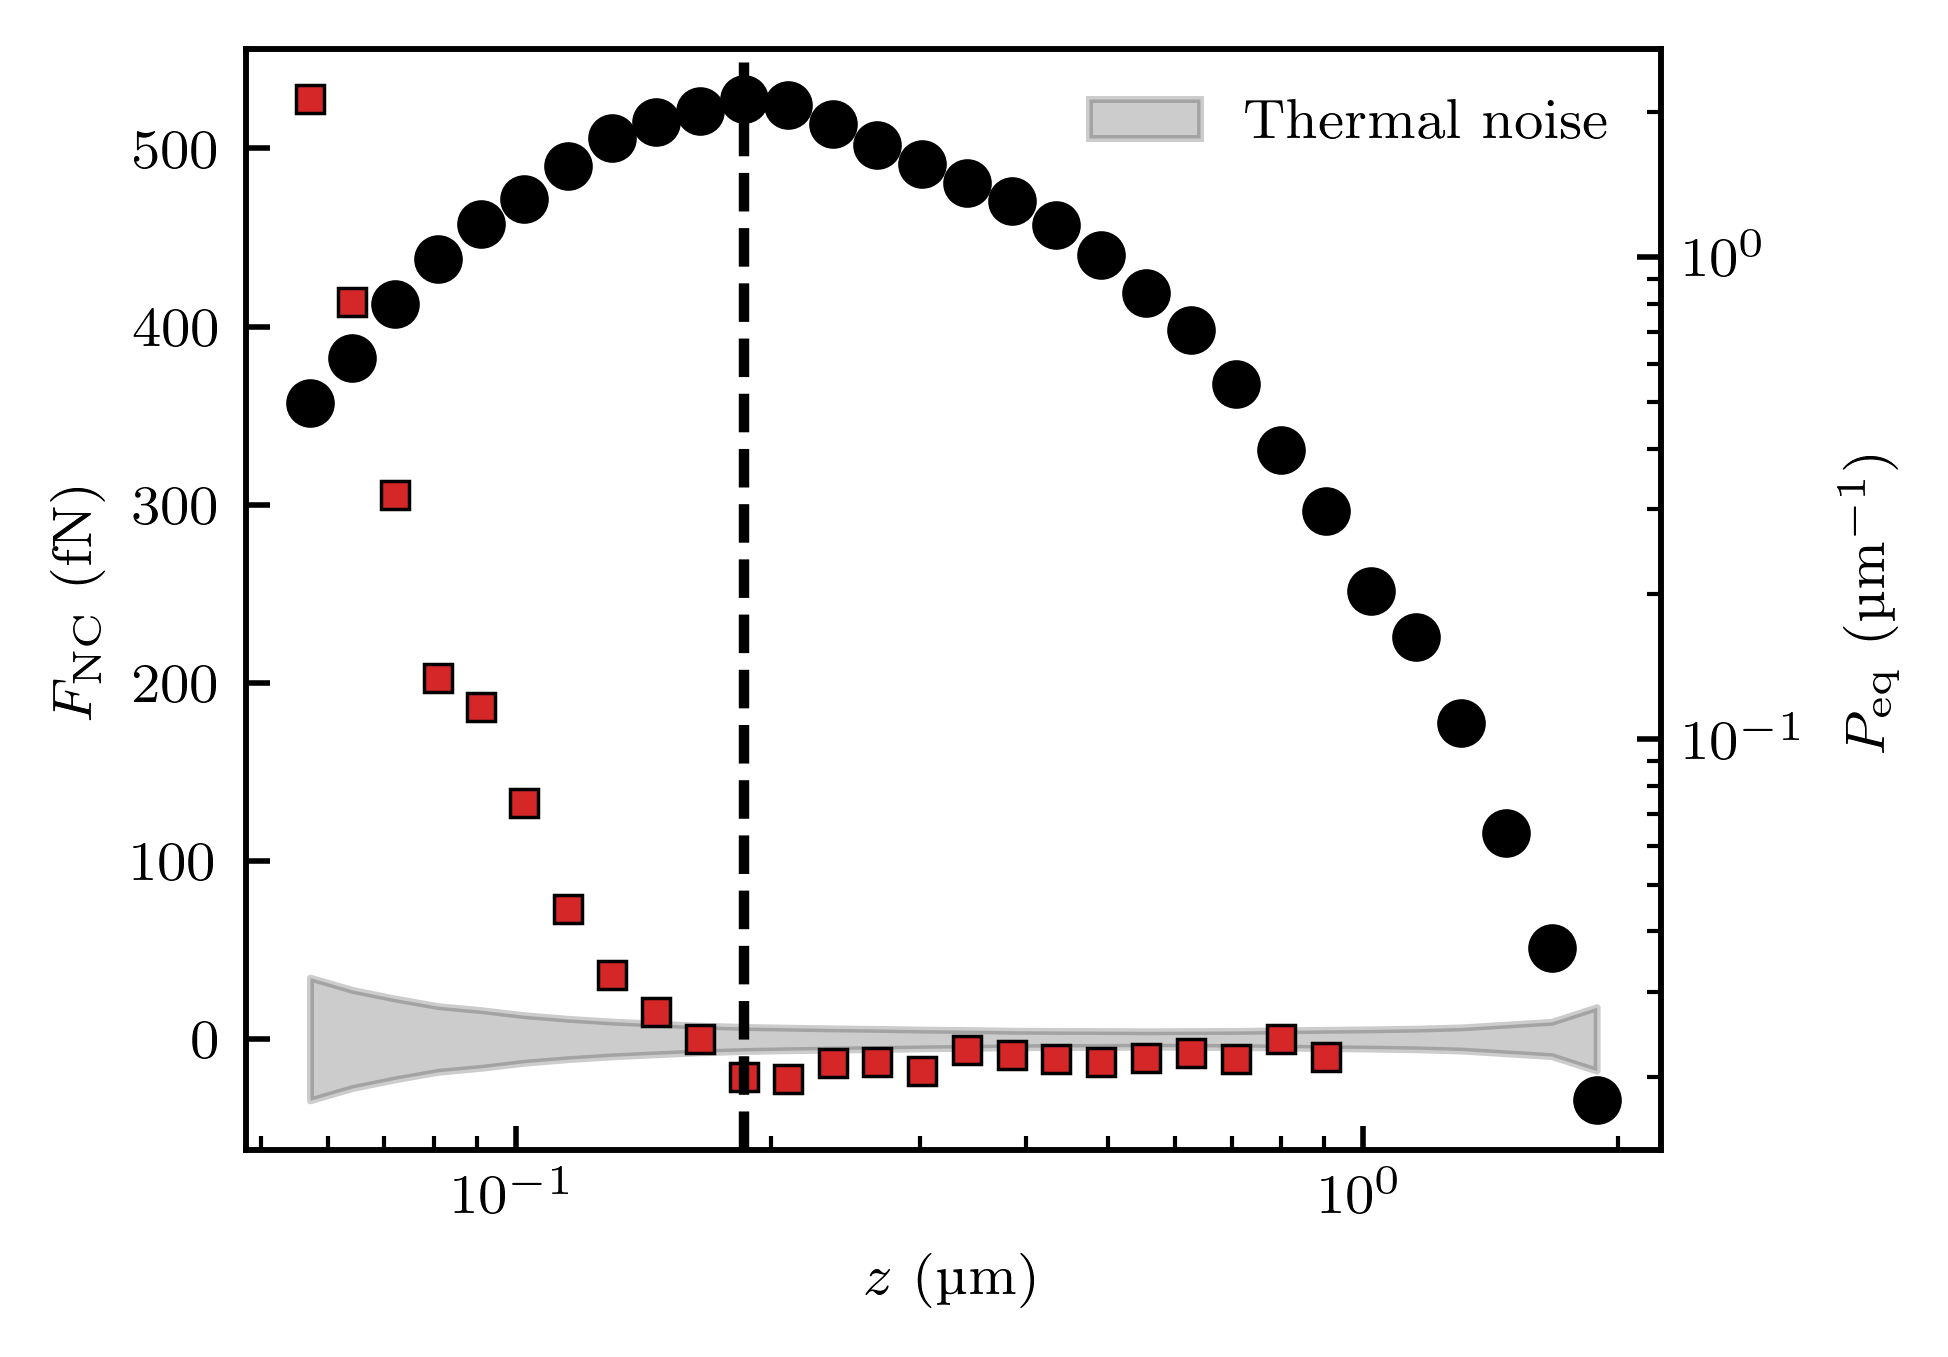

In [116]:
# Non-conservative force

fig, ax1 = plt.subplots(1, 1, figsize=(10/2.54, 7/2.54))

ax1.plot(x_F_nc * 1e6, y_F_nc * 1e15, 's', markerfacecolor='tab:red', markersize=4, markeredgecolor='k', markeredgewidth=0.5)
ax1.fill_between(
    x_F_err_th * 1e6, (0 - y_F_err_th)*1e15, (0 + y_F_err_th)*1e15, 
    alpha = 0.2, color ="k", label = "Thermal noise"
)
ax1.legend(frameon=False)
ax1.set(
    xlabel='$z$ (µm)', 
    ylabel='$F_\mathrm{NC}$ (fN)', 
    xscale='log', 
    yscale='linear', 
)

ax2 = ax1.twinx()

ax2.plot(data['x_pdf_z'] * 1e6, data['y_pdf_z'] * 1e-6, 'o', c='k')
ax2.axvline(x=z_Pmax * 1e6, ls='--', c='k')

ax2.set(
    yscale='log', 
    ylabel=r'$P_\mathrm{eq}$ (µm$^{-1}$)', 
)

plt.tight_layout()
plt.show()

## 

In [117]:
8.7/1.62

5.370370370370369

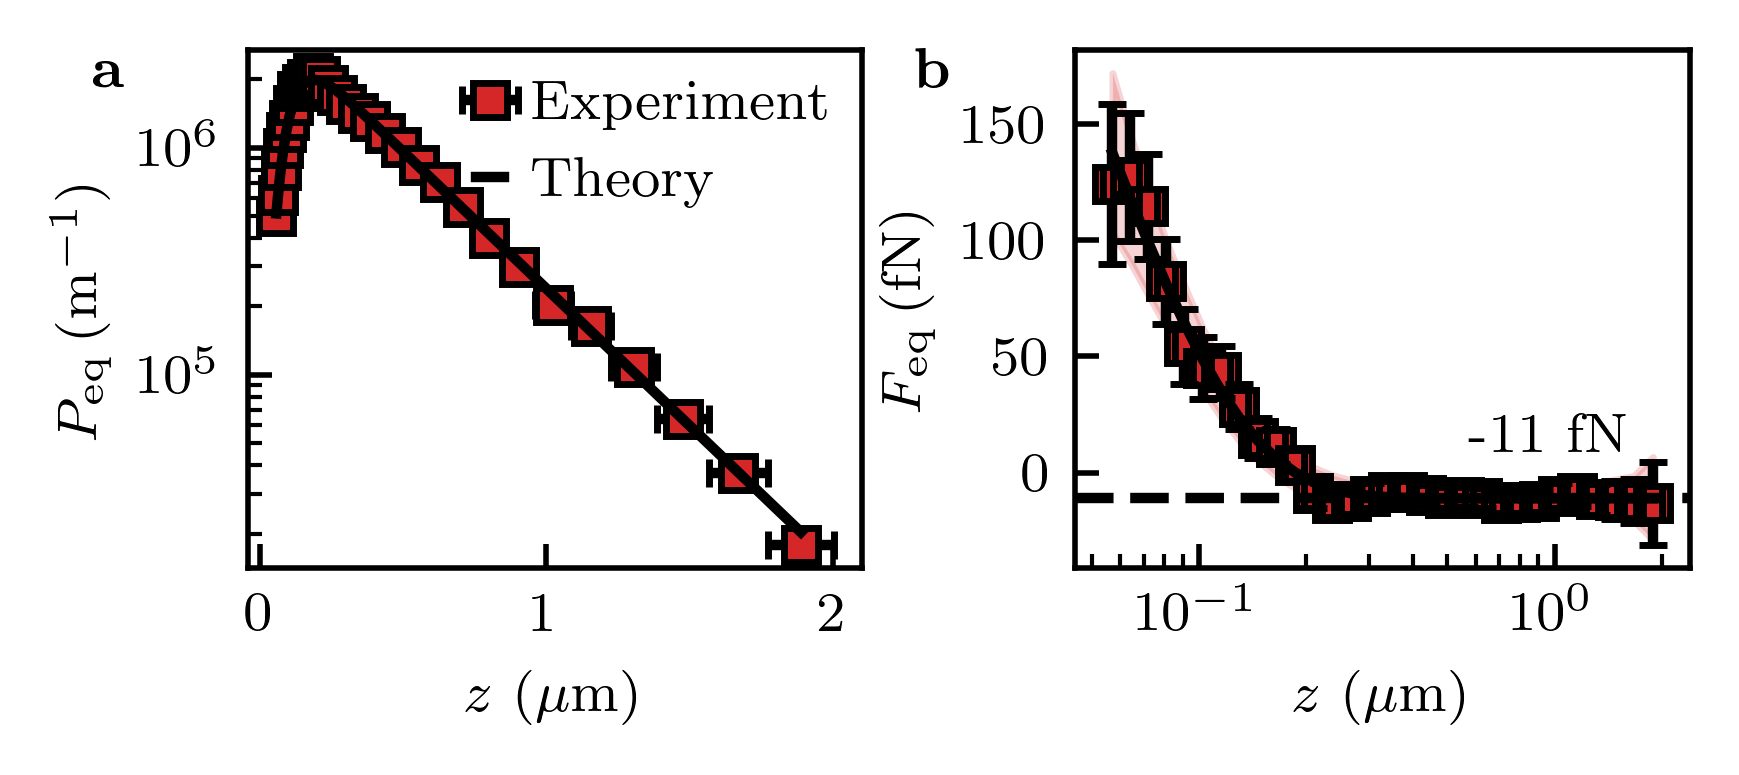

In [118]:
# Plot Peq and Feq

fig, axes = plt.subplots(1, 2, figsize=(8.5/2.54, 3.6/2.54))
ax1, ax2 = axes

# -------------------------------------------------------------------------------------------------
# ---------- Peq
# -------------------------------------------------------------------------------------------------
ax1.errorbar(
    x_pdf_z * 1e6, y_pdf_z, xerr=width_pdf_z/2*1e6,  #yerr=err_y_pdf_z,
    ls='', marker='s', markerfacecolor='tab:red', markersize=5, markeredgewidth=1, markeredgecolor='k', 
    ecolor='k', capsize=2, 
    label="Experiment", 
)
ax1.errorbar(
    x_pdf_z_theory * 1e6, y_pdf_z_theory, yerr=0, 
    ls='-', color='k', 
    ecolor='w', capsize=0, 
    label="Theory", 
)

# -------------------------------------------------------------------------------------------------
# ---------- Feq
# -------------------------------------------------------------------------------------------------
ax2.plot(
    x_F_eq * 1e6, y_F_eq * 1e15, ls='', marker='s', 
    markerfacecolor='tab:red', markersize=5, markeredgewidth=1, markeredgecolor='k', 
    # label="Experiment", 
)
ax2.errorbar(
    x_F_eq * 1e6, y_F_eq * 1e15, yerr=y_F_err_th*1e15, xerr=width_F_eq/2*1e6, 
    ls='', marker='', markerfacecolor='tab:red', markersize=5, markeredgewidth=1, markeredgecolor='k', 
    ecolor='k', capsize=2, 
    #label="Equilibrium (exp.)", 
)
# This trick of plotting with plot and errorbar is only here so that the thermal noise appears last in the legend.
ax2.plot(
    x_F_eq_theory * 1e6, y_F_eq_theory * 1e15, ls='-', color='k', 
    # label="Theory", 
)
ax2.fill_between(
    (x_F_err_th) * 1e6, (y_F_eq_theory - y_F_err_th) * 1e15, (y_F_eq_theory + y_F_err_th) * 1e15, 
    alpha=0.2, color='tab:red', 
    # label="Thermal noise range", 
)
ax2.axhline(y=-4e-21/lB * 1e15, ls='--', c='k')
ax2.annotate(
    "-{0:.0f} fN".format(4e-21/lB*1e15), 
    xy=(0, 0),  xycoords='axes fraction', xytext=(0.9, 0.3), textcoords='axes fraction', color='k',  
    horizontalalignment='right', verticalalignment='top', 
)

# -------------------------------------------------------------------------------------------------
# ---------- General properties
# -------------------------------------------------------------------------------------------------
ax1.legend(loc='upper right', frameon=False, handletextpad=0.5, handlelength=0.5, borderpad=0.05)
# ax2.legend(loc='upper right', frameon=False, handletextpad=0.5, handlelength=0.5)

ax1.set(
    xlabel=r"$z$ ($\mu$m)", 
    ylabel=r"$P_{\mathrm{eq}} \, \mathrm{(m^{-1})}$", 
    yscale='log', 
)
ax2.set(
    xlabel=r"$z$ ($\mu$m)", 
    ylabel=r"$F_{\mathrm{eq}} \, \mathrm{(fN)}$", 
    xscale='log', 
    yscale='linear', 
    yticks=[0, 50, 100, 150], 
)

ax1.annotate(
    "$\mathbf{a}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.20, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=8, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax2.annotate(
    "$\mathbf{b}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.20, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=8, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)

plt.tight_layout(pad=0.3)
plt.show()

In [119]:
# fig.savefig('figure_2.pdf')

In [120]:
# r = a

In [121]:
def Dz_z(z, r=1.5e-6):
    res = (6 * z * z + 2 * r * z) / (6 * z * z + 9 * r * z + 2 * r * r)
    return res

def Dx_z(z, r=1.5e-6):
    res = 1 - 9/16 * (r / (z + r)) + 1/8 * (r / (z + r)) ** 3 - 45/256 * (r / (z + r)) ** 4 - 1/16 * (r / (z + r)) ** 5
    return res

In [122]:
def Dperp_z(z, b, z0=0, nl=0):
    z = z - z0 + b
    res = (6 * z ** 2 + 2 * r * z) / (6 * z ** 2 + 9 * r * z + 2 * r ** 2)
    res += nl
    return res

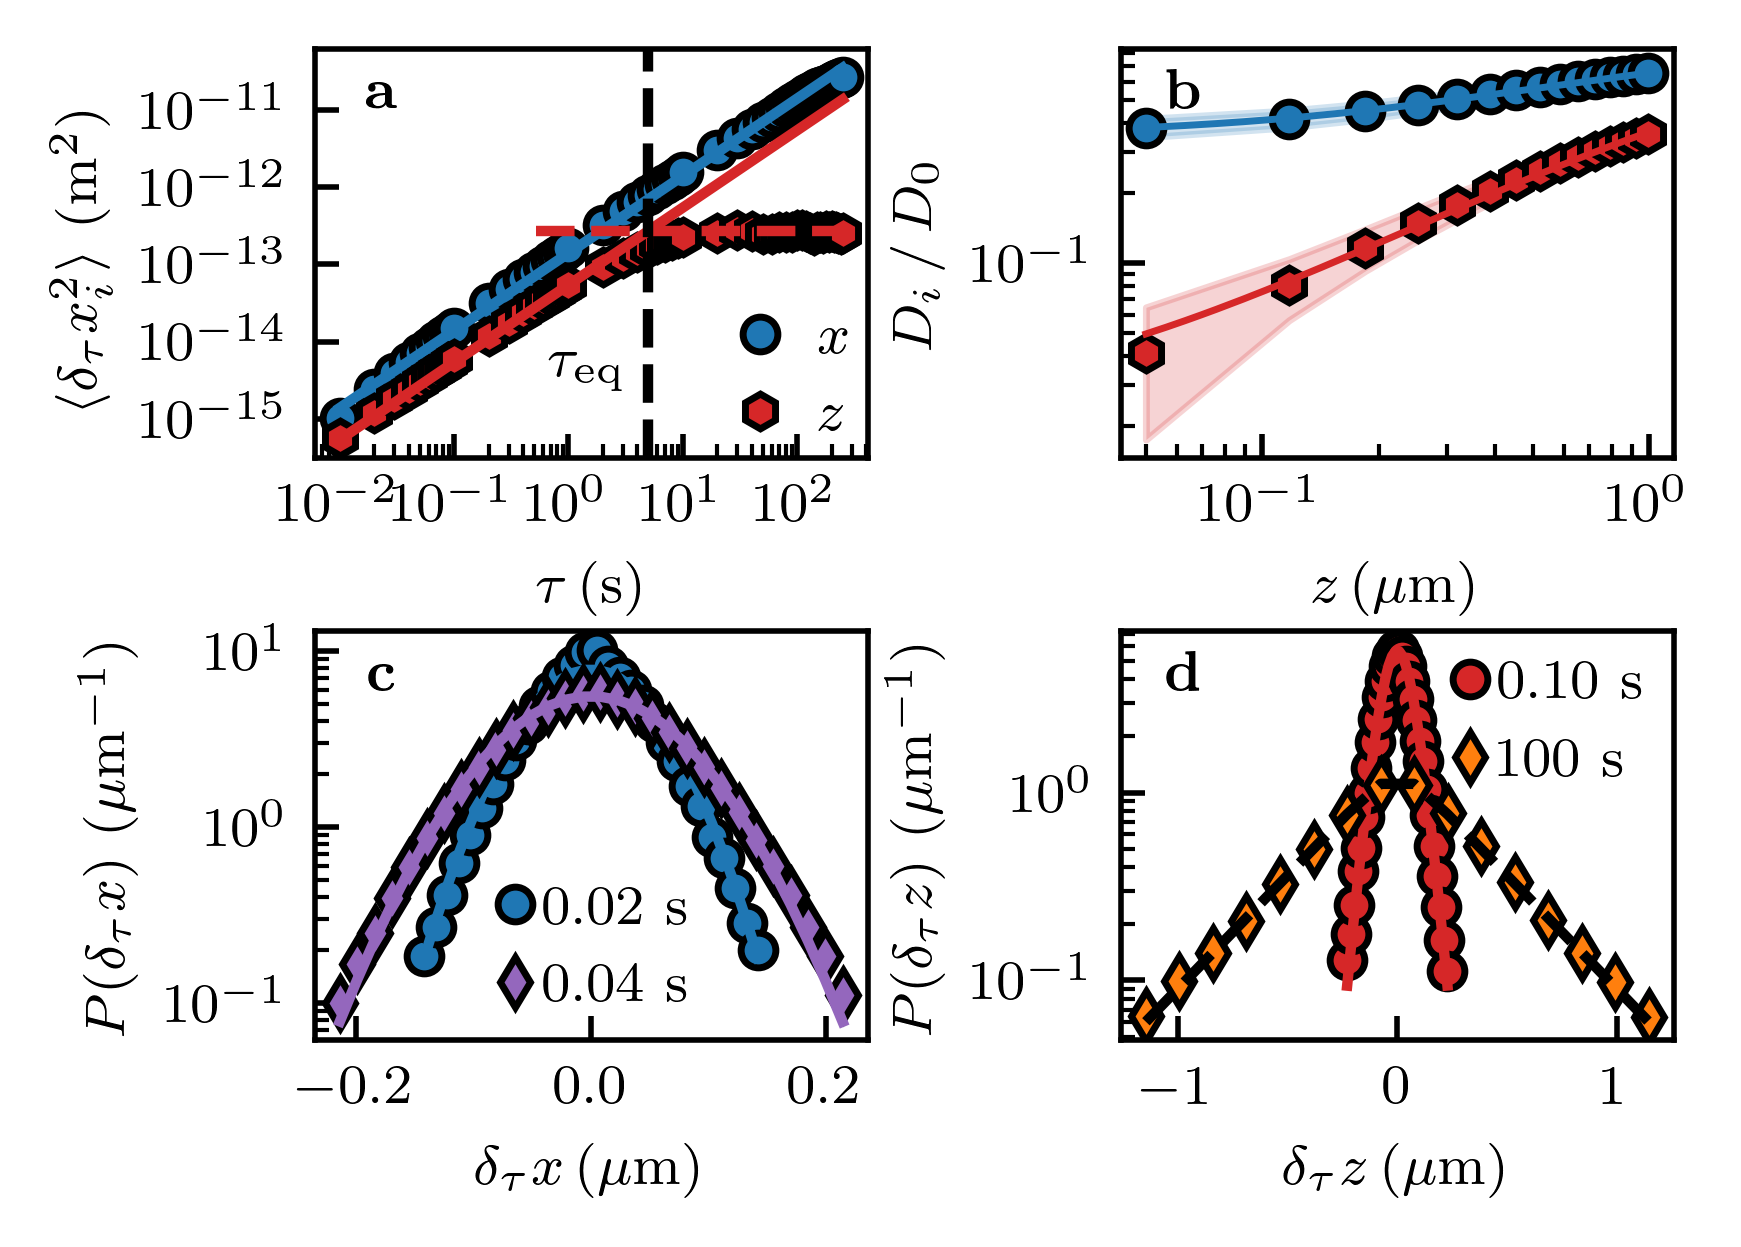

In [128]:
# MSD, D(z) ...

fig, axes = plt.subplots(2, 2, figsize=(8.5/2.54, 6/2.54))
[[ax1, ax2], [ax3, ax4]] = axes

# -------------------------------------------------------------------------------------------------
# ---------- MSD
# -------------------------------------------------------------------------------------------------

tmax = 250 # s

ax1.plot(
    delta_time_MSD[delta_time_MSD <= tmax], MSD_para[delta_time_MSD <= tmax],
    ls='', marker='o', markersize=5, markerfacecolor='tab:blue', markeredgewidth=1, markeredgecolor='k', 
    # label=r"$\parallel$",
    label=r"$x$", 
)
ax1.plot(
    delta_time_MSD[delta_time_MSD <= tmax], 2 * mean_D_para_from_multifit * D0 * delta_time_MSD[delta_time_MSD <= tmax], 
    ls='-', color='tab:blue', 
)
ax1.plot(
    delta_time_MSD[delta_time_MSD <= tmax], MSD_perp[delta_time_MSD <= tmax],
    ls='', marker='h', markersize=5, markerfacecolor='tab:red', markeredgewidth=1, markeredgecolor='k', 
    # label=r"$\perp$", 
    label=r"$z$", 
)
ax1.plot(
    delta_time_MSD[delta_time_MSD <= tmax], 2 * mean_D_perp_from_multifit * D0 * delta_time_MSD[delta_time_MSD <= tmax], 
    ls='-', color='tab:red', 
)
ax1.axhline(y=plateau_MSDz_theory, xmin=0.4, xmax=1, ls='--', color='tab:red')

ax1.axvline(x=plateau_MSDz_theory/(2*mean_D_perp_from_multifit*D0), ls='--', c='k')

ax1.annotate(
    r"$\tau_\mathrm{eq}$",
    xy=(0, 0),  xycoords='axes fraction', xytext=(3, 1e-14), textcoords='data', color='k',  
    horizontalalignment='right', verticalalignment='top', 
)


# -------------------------------------------------------------------------------------------------
# ---------- D(z)
# -------------------------------------------------------------------------------------------------
# Parallel
ax2.plot(x_D_para_z[x_D_para_z < z_D_max] * 1e6, y_D_para_z[x_D_para_z < z_D_max], 
         ls='', marker='o', markersize=5, markerfacecolor='tab:blue', 
         label=r"$\parallel$", 
        )
ax2.fill_between(x_D_para_z[x_D_para_z < z_D_max] * 1e6, 
                 y_D_para_z[x_D_para_z < z_D_max] - 1/2 * err_y_D_para_z, 
                 y_D_para_z[x_D_para_z < z_D_max] + 1/2 * err_y_D_para_z, 
                color='tab:blue', alpha=0.2, 
                )
ax2.plot(x_D_para_z_theory[x_D_para_z_theory < z_D_max] * 1e6, y_D_para_z_theory[x_D_para_z_theory < z_D_max], ls='-', linewidth=1, color='tab:blue')
# Perpendicular
ax2.plot(x_D_perp_z[x_D_perp_z < z_D_max] * 1e6, y_D_perp_z[x_D_perp_z < z_D_max], 
         ls='', marker='h', markersize=5, markerfacecolor='tab:red', 
         label=r"$\perp$", 
        )
ax2.fill_between(x_D_perp_z[x_D_perp_z < z_D_max] * 1e6, 
                 y_D_perp_z[x_D_perp_z < z_D_max] - 1/2 * err_y_D_perp_z, 
                 y_D_perp_z[x_D_perp_z < z_D_max] + 1/2 * err_y_D_perp_z, 
                color='tab:red', alpha=0.2, 
                )
ax2.plot(x_D_perp_z_theory[x_D_perp_z_theory < z_D_max] * 1e6, y_D_perp_z_theory[x_D_perp_z_theory < z_D_max], ls='-', linewidth=1, color='tab:red')



# -------------------------------------------------------------------------------------------------
# ---------- P dx
# -------------------------------------------------------------------------------------------------

markers_pdf = ['o', 'd', 's', 'h', 'D']
colors_blue = ['tab:blue', 'tab:purple', 'cornflowerblue', 'indigo', 'lightsteelblue']
colors_red = ['tab:red', 'tab:orange', 'darkred', 'rosybrown', 'salmon']

Pmin_short = 1e5

for n, i in enumerate([2, 4]):
    bins_center, hist = data["proba_dx_short_timestep_{}".format(i)]
    _, theory_hist = data["proba_dx_short_timestep_{}_theory".format(i)] #P_dx_short(bins_center, i/fps, B, lD, lB, b)
    ax3.plot(
        bins_center*1e6, hist*1e-6, 
        ls='', marker=markers_pdf[n], markersize=5, markerfacecolor=colors_blue[n], markeredgewidth=1, markeredgecolor='k', 
        label='{0:.2f} s'.format(i/fps), 
    )
    ax3.plot(bins_center*1e6, theory_hist*1e-6, ls ='-', color=colors_blue[n])


# -------------------------------------------------------------------------------------------------
# ---------- P dz
# -------------------------------------------------------------------------------------------------

Pmin_long = 5e4

# Short times
for n, i in enumerate([10]):
    bins_center, hist = data["proba_dz_short_timestep_{}".format(i)]
    _, theory_hist = data["proba_dz_short_timestep_{}_theory".format(i)] #P_dx_short(bins_center, i/fps, B, lD, lB, b)
    # theory_hist = theory_hist / np.max(hist)
    # hist = hist / np.max(hist)
    ax4.plot(
        bins_center*1e6, hist*1e-6, 
        ls='', marker=markers_pdf[n], markersize=5, markerfacecolor=colors_red[n], markeredgewidth=1, markeredgecolor='k', 
        label='{0:.2f} s'.format(i/fps), 
    )
    ax4.plot(bins_center*1e6, theory_hist*1e-6, ls ='-', color=colors_red[n])

# Long times
ax4.plot(
    bins_centers_long[proba_deltaz_long >= Pmin_long] * 1e6, proba_deltaz_long[proba_deltaz_long >= Pmin_long] * 1e-6, 
    # yerr=err_proba_deltaz_long[proba_deltaz_long >= Pmin_long] * 1e-6, xerr=np.mean(bins_centers_long[1:]-bins_centers_long[:-1])/2*1e6, 
    ls='', marker=markers_pdf[n+1], markerfacecolor=colors_red[n+1], markersize=5, markeredgewidth=1, markeredgecolor='k', 
    # ecolor='k', capsize=2, 
    label='100 s'
)
ax4.plot(
    bins_centers_long[proba_deltaz_long >= Pmin_long] * 1e6, proba_deltaz_long_theory[proba_deltaz_long >= Pmin_long] * 1e-6, 
    ls='--', color='k', 
    zorder=3, 
)

    
# -------------------------------------------------------------------------------------------------
# ---------- General properties
# -------------------------------------------------------------------------------------------------

ax1.legend(frameon=False, loc='lower right', labelspacing=0.5, handletextpad=0.05, borderpad=0.1, borderaxespad=0.2)
ax1.set(
    xlabel=r"$\tau \, \mathrm{(s)}$", 
    ylabel=r"$\langle \delta_\tau x_i ^2 \rangle$ $\mathrm{(m^2)}$", 
    xscale='log', 
    yscale='log', 
)
# ax1.set_xticks([1e-1, 1e0, 1e1, 1e2])
locmaj = mpl.ticker.LogLocator(base=10,numticks=6) 
ax1.xaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10,subs=(0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=6)
ax1.xaxis.set_minor_locator(locmin)
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
locmaj = mpl.ticker.LogLocator(base=10,numticks=10) 
ax1.yaxis.set_major_locator(locmaj)
# ax2.legend(frameon=False, loc='lower right', labelspacing=0.5, handletextpad=0.1, borderpad=0.1, borderaxespad=0.2)
ax2.set(
    xlabel=r"$z \, \mathrm{(\mu m)}$", 
    ylabel=r"$D_i \, / \, D_0$", 
    xscale='log', 
    yscale='log', 
)
ax3.legend(frameon=False, loc='best', handlelength=0.8, handletextpad=0.1, borderpad=0.01, ncol=1, columnspacing=0.3)
ax3.set(
    xlabel=r"$\delta_\tau x \, \mathrm{(\mu m)}$", 
    ylabel=r"$P(\delta_\tau x)$ ($\mathrm{\mu m ^{-1}}$)", 
    yscale='log', 
)
ax4.legend(frameon=False, loc='best', handlelength=0.8, handletextpad=0.1, borderpad=0.01, ncol=1, columnspacing=0.3)
ax4.set(
    xlabel=r"$\delta_\tau z \, \mathrm{(\mu m)}$", 
    ylabel=r"$P(\delta_\tau z)$ ($\mathrm{\mu m ^{-1}}$)", 
    yscale='log', 
    # xticks=[-1, -0.5, 0, 0.5, 1], 
)

ax1.annotate(
    "$\mathbf{a}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(0.15, 0.95), textcoords='axes fraction', 
    # weight='bold',
    fontsize=8, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax2.annotate(
    "$\mathbf{b}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(0.15, 0.95), textcoords='axes fraction', 
    # weight='bold',
    fontsize=8, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax3.annotate(
    "$\mathbf{c}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(0.15, 0.95), textcoords='axes fraction', 
    # weight='bold',
    fontsize=8, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax4.annotate(
    "$\mathbf{d}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(0.15, 0.95), textcoords='axes fraction', 
    # weight='bold',
    fontsize=8, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)

plt.tight_layout(pad=0.3)
plt.show()

In [129]:
# fig.savefig('figure_3.pdf')

In [ ]:
18/4/1.6

KeyError: 'proba_dz_short_timestep_10'

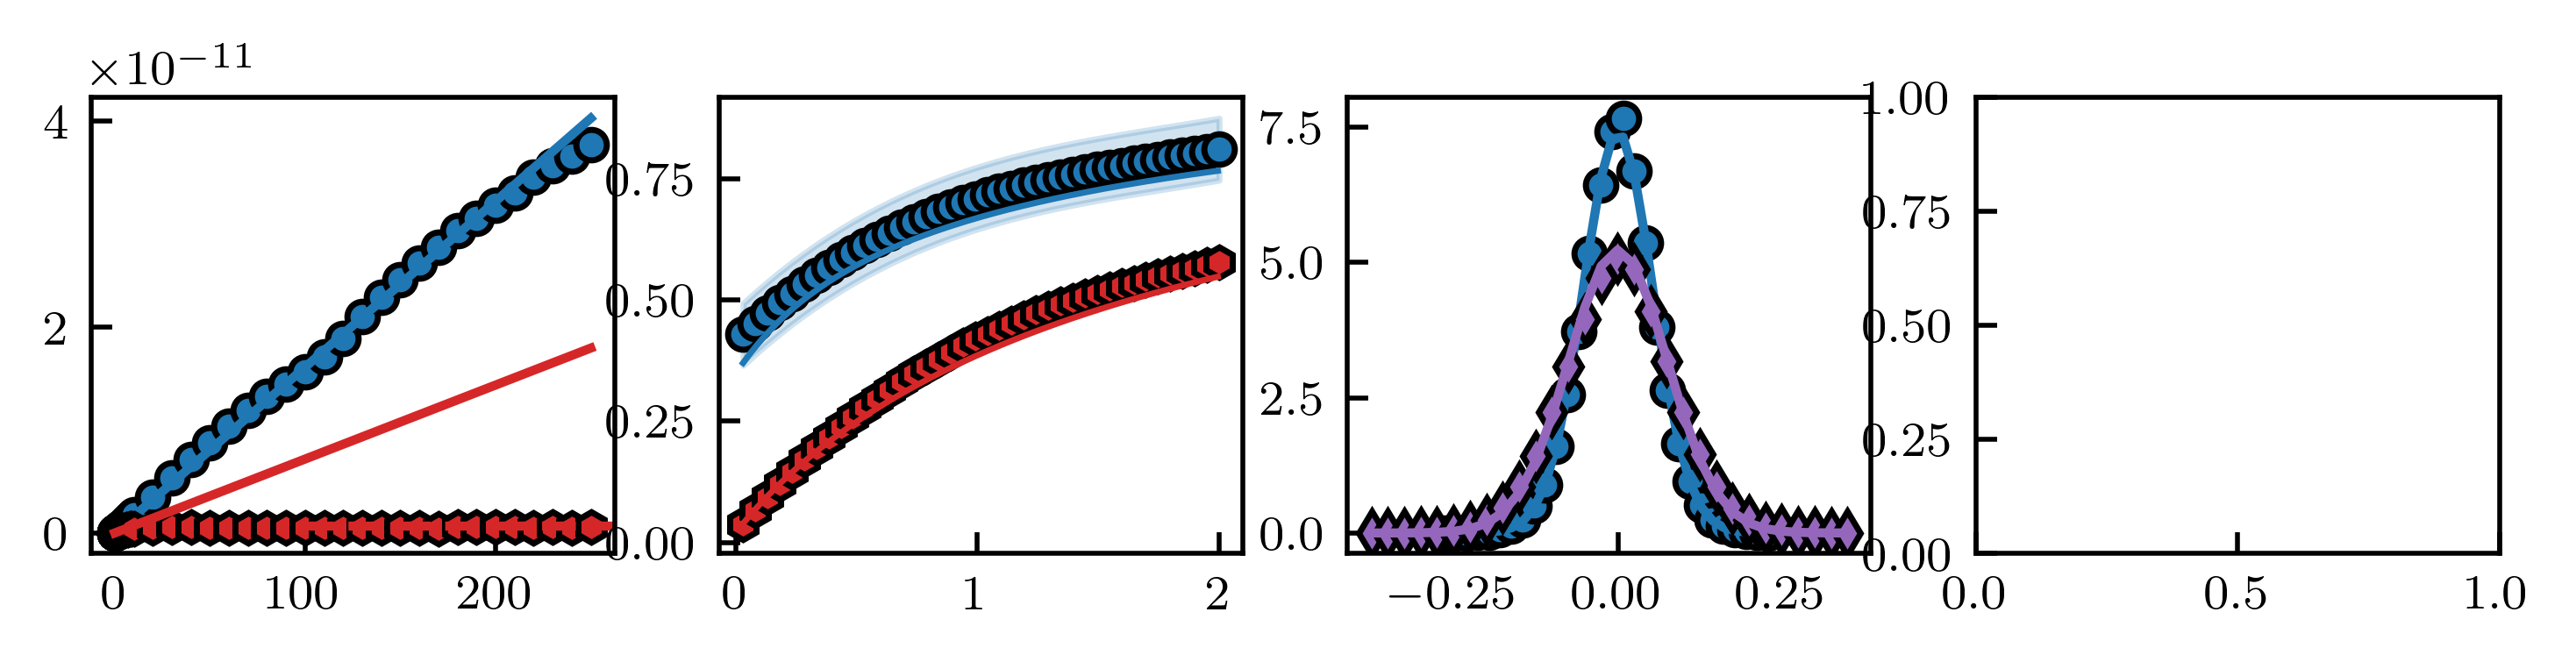

In [69]:
# MSD, D(z) ...

fig, axes = plt.subplots(1, 4, figsize=(18/2.54, 3.5/2.54))
ax1, ax2, ax3, ax4 = axes

# -------------------------------------------------------------------------------------------------
# ---------- MSD
# -------------------------------------------------------------------------------------------------

tmax = 250 # s

ax1.plot(
    delta_time_MSD[delta_time_MSD <= tmax], MSD_para[delta_time_MSD <= tmax],
    ls='', marker='o', markersize=5, markerfacecolor='tab:blue', markeredgewidth=1, markeredgecolor='k', 
    # label=r"$\parallel$",
    label=r"$x$", 
)
ax1.plot(
    delta_time_MSD[delta_time_MSD <= tmax], 2 * mean_D_para_from_multifit * D0 * delta_time_MSD[delta_time_MSD <= tmax], 
    ls='-', color='tab:blue', 
)
ax1.plot(
    delta_time_MSD[delta_time_MSD <= tmax], MSD_perp[delta_time_MSD <= tmax],
    ls='', marker='h', markersize=5, markerfacecolor='tab:red', markeredgewidth=1, markeredgecolor='k', 
    # label=r"$\perp$", 
    label=r"$z$", 
)
ax1.plot(
    delta_time_MSD[delta_time_MSD <= tmax], 2 * mean_D_perp_from_multifit * D0 * delta_time_MSD[delta_time_MSD <= tmax], 
    ls='-', color='tab:red', 
)
ax1.axhline(y=plateau_MSDz_theory, xmin=0.4, xmax=1, ls='--', color='tab:red')


# -------------------------------------------------------------------------------------------------
# ---------- D(z)
# -------------------------------------------------------------------------------------------------
# Parallel
ax2.plot(x_D_para_z[x_D_para_z < z_D_max] * 1e6, y_D_para_z[x_D_para_z < z_D_max], 
         ls='', marker='o', markersize=5, markerfacecolor='tab:blue', 
         label=r"$\parallel$", 
        )
ax2.fill_between(x_D_para_z[x_D_para_z < z_D_max] * 1e6, 
                 y_D_para_z[x_D_para_z < z_D_max] - 1/2 * err_y_D_para_z, 
                 y_D_para_z[x_D_para_z < z_D_max] + 1/2 * err_y_D_para_z, 
                color='tab:blue', alpha=0.2, 
                )
ax2.plot(x_D_para_z_theory[x_D_para_z_theory < z_D_max] * 1e6, y_D_para_z_theory[x_D_para_z_theory < z_D_max], ls='-', linewidth=1, color='tab:blue')
# Perpendicular
ax2.plot(x_D_perp_z[x_D_perp_z < z_D_max] * 1e6, y_D_perp_z[x_D_perp_z < z_D_max], 
         ls='', marker='h', markersize=5, markerfacecolor='tab:red', 
         label=r"$\perp$", 
        )
ax2.fill_between(x_D_perp_z[x_D_perp_z < z_D_max] * 1e6, 
                 y_D_perp_z[x_D_perp_z < z_D_max] - 1/2 * err_y_D_perp_z, 
                 y_D_perp_z[x_D_perp_z < z_D_max] + 1/2 * err_y_D_perp_z, 
                color='tab:red', alpha=0.2, 
                )
ax2.plot(x_D_perp_z_theory[x_D_perp_z_theory < z_D_max] * 1e6, y_D_perp_z_theory[x_D_perp_z_theory < z_D_max], ls='-', linewidth=1, color='tab:red')



# -------------------------------------------------------------------------------------------------
# ---------- P dx
# -------------------------------------------------------------------------------------------------

markers_pdf = ['o', 'd', 's', 'h', 'D']
colors_blue = ['tab:blue', 'tab:purple', 'cornflowerblue', 'indigo', 'lightsteelblue']
colors_red = ['tab:red', 'tab:orange', 'darkred', 'rosybrown', 'salmon']

Pmin_short = 1e5

for n, i in enumerate([2, 4]):
    bins_center, hist = data["proba_dx_short_timestep_{}".format(i)]
    _, theory_hist = data["proba_dx_short_timestep_{}_theory".format(i)] #P_dx_short(bins_center, i/fps, B, lD, lB, b)
    ax3.plot(
        bins_center*1e6, hist*1e-6, 
        ls='', marker=markers_pdf[n], markersize=5, markerfacecolor=colors_blue[n], markeredgewidth=1, markeredgecolor='k', 
        label='{0:.2f} s'.format(i/fps), 
    )
    ax3.plot(bins_center*1e6, theory_hist*1e-6, ls ='-', color=colors_blue[n])


# -------------------------------------------------------------------------------------------------
# ---------- P dz
# -------------------------------------------------------------------------------------------------

Pmin_long = 5e4

# Short times
for n, i in enumerate([10]):
    bins_center, hist = data["proba_dz_short_timestep_{}".format(i)]
    _, theory_hist = data["proba_dz_short_timestep_{}_theory".format(i)] #P_dx_short(bins_center, i/fps, B, lD, lB, b)
    # theory_hist = theory_hist / np.max(hist)
    # hist = hist / np.max(hist)
    ax4.plot(
        bins_center*1e6, hist*1e-6, 
        ls='', marker=markers_pdf[n], markersize=5, markerfacecolor=colors_red[n], markeredgewidth=1, markeredgecolor='k', 
        label='{0:.2f} s'.format(i/fps), 
    )
    ax4.plot(bins_center*1e6, theory_hist*1e-6, ls ='-', color=colors_red[n])

# Long times
ax4.plot(
    bins_centers_long[proba_deltaz_long >= Pmin_long] * 1e6, proba_deltaz_long[proba_deltaz_long >= Pmin_long] * 1e-6, 
    # yerr=err_proba_deltaz_long[proba_deltaz_long >= Pmin_long] * 1e-6, xerr=np.mean(bins_centers_long[1:]-bins_centers_long[:-1])/2*1e6, 
    ls='', marker=markers_pdf[n+1], markerfacecolor=colors_red[n+1], markersize=5, markeredgewidth=1, markeredgecolor='k', 
    # ecolor='k', capsize=2, 
    label='100 s'
)
ax4.plot(
    bins_centers_long[proba_deltaz_long >= Pmin_long] * 1e6, proba_deltaz_long_theory[proba_deltaz_long >= Pmin_long] * 1e-6, 
    ls='--', color='k', 
    zorder=3, 
)

    
# -------------------------------------------------------------------------------------------------
# ---------- General properties
# -------------------------------------------------------------------------------------------------

ax1.legend(frameon=False, loc='lower right', labelspacing=0.5, handletextpad=0.05, borderpad=0.1, borderaxespad=0.2)
ax1.set(
    xlabel=r"$\tau \, \mathrm{(s)}$", 
    ylabel=r"$\langle \delta_\tau x_i ^2 \rangle$ $\mathrm{(m^2)}$", 
    xscale='log', 
    yscale='log', 
)
# ax1.set_xticks([1e-1, 1e0, 1e1, 1e2])
locmaj = mpl.ticker.LogLocator(base=10,numticks=6) 
ax1.xaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10,subs=(0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=6)
ax1.xaxis.set_minor_locator(locmin)
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
locmaj = mpl.ticker.LogLocator(base=10,numticks=10) 
ax1.yaxis.set_major_locator(locmaj)
# ax2.legend(frameon=False, loc='lower right', labelspacing=0.5, handletextpad=0.1, borderpad=0.1, borderaxespad=0.2)
ax2.set(
    xlabel=r"$z \, \mathrm{(\mu m)}$", 
    ylabel=r"$D_i \, / \, D_0$", 
    xscale='log', 
    yscale='log', 
)
ax3.legend(frameon=False, loc='best', handlelength=0.8, handletextpad=0.1, borderpad=0.01, ncol=1, columnspacing=0.3)
ax3.set(
    xlabel=r"$\delta_\tau x \, \mathrm{(\mu m)}$", 
    ylabel=r"$P(\delta_\tau x)$ ($\mathrm{\mu m ^{-1}}$)", 
    yscale='log', 
)
ax4.legend(frameon=False, loc='best', handlelength=0.8, handletextpad=0.1, borderpad=0.01, ncol=1, columnspacing=0.3)
ax4.set(
    xlabel=r"$\delta_\tau z \, \mathrm{(\mu m)}$", 
    ylabel=r"$P(\delta_\tau z)$ ($\mathrm{\mu m ^{-1}}$)", 
    yscale='log', 
    # xticks=[-1, -0.5, 0, 0.5, 1], 
)

ax1.annotate(
    "$\mathbf{a}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.28, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax2.annotate(
    "$\mathbf{b}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.28, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax3.annotate(
    "$\mathbf{c}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.28, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax4.annotate(
    "$\mathbf{d}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.28, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)

plt.tight_layout(pad=0.1)
plt.show()

In [70]:
# fig.savefig('figure_3.pdf')

In [71]:
9/12.2

0.7377049180327869

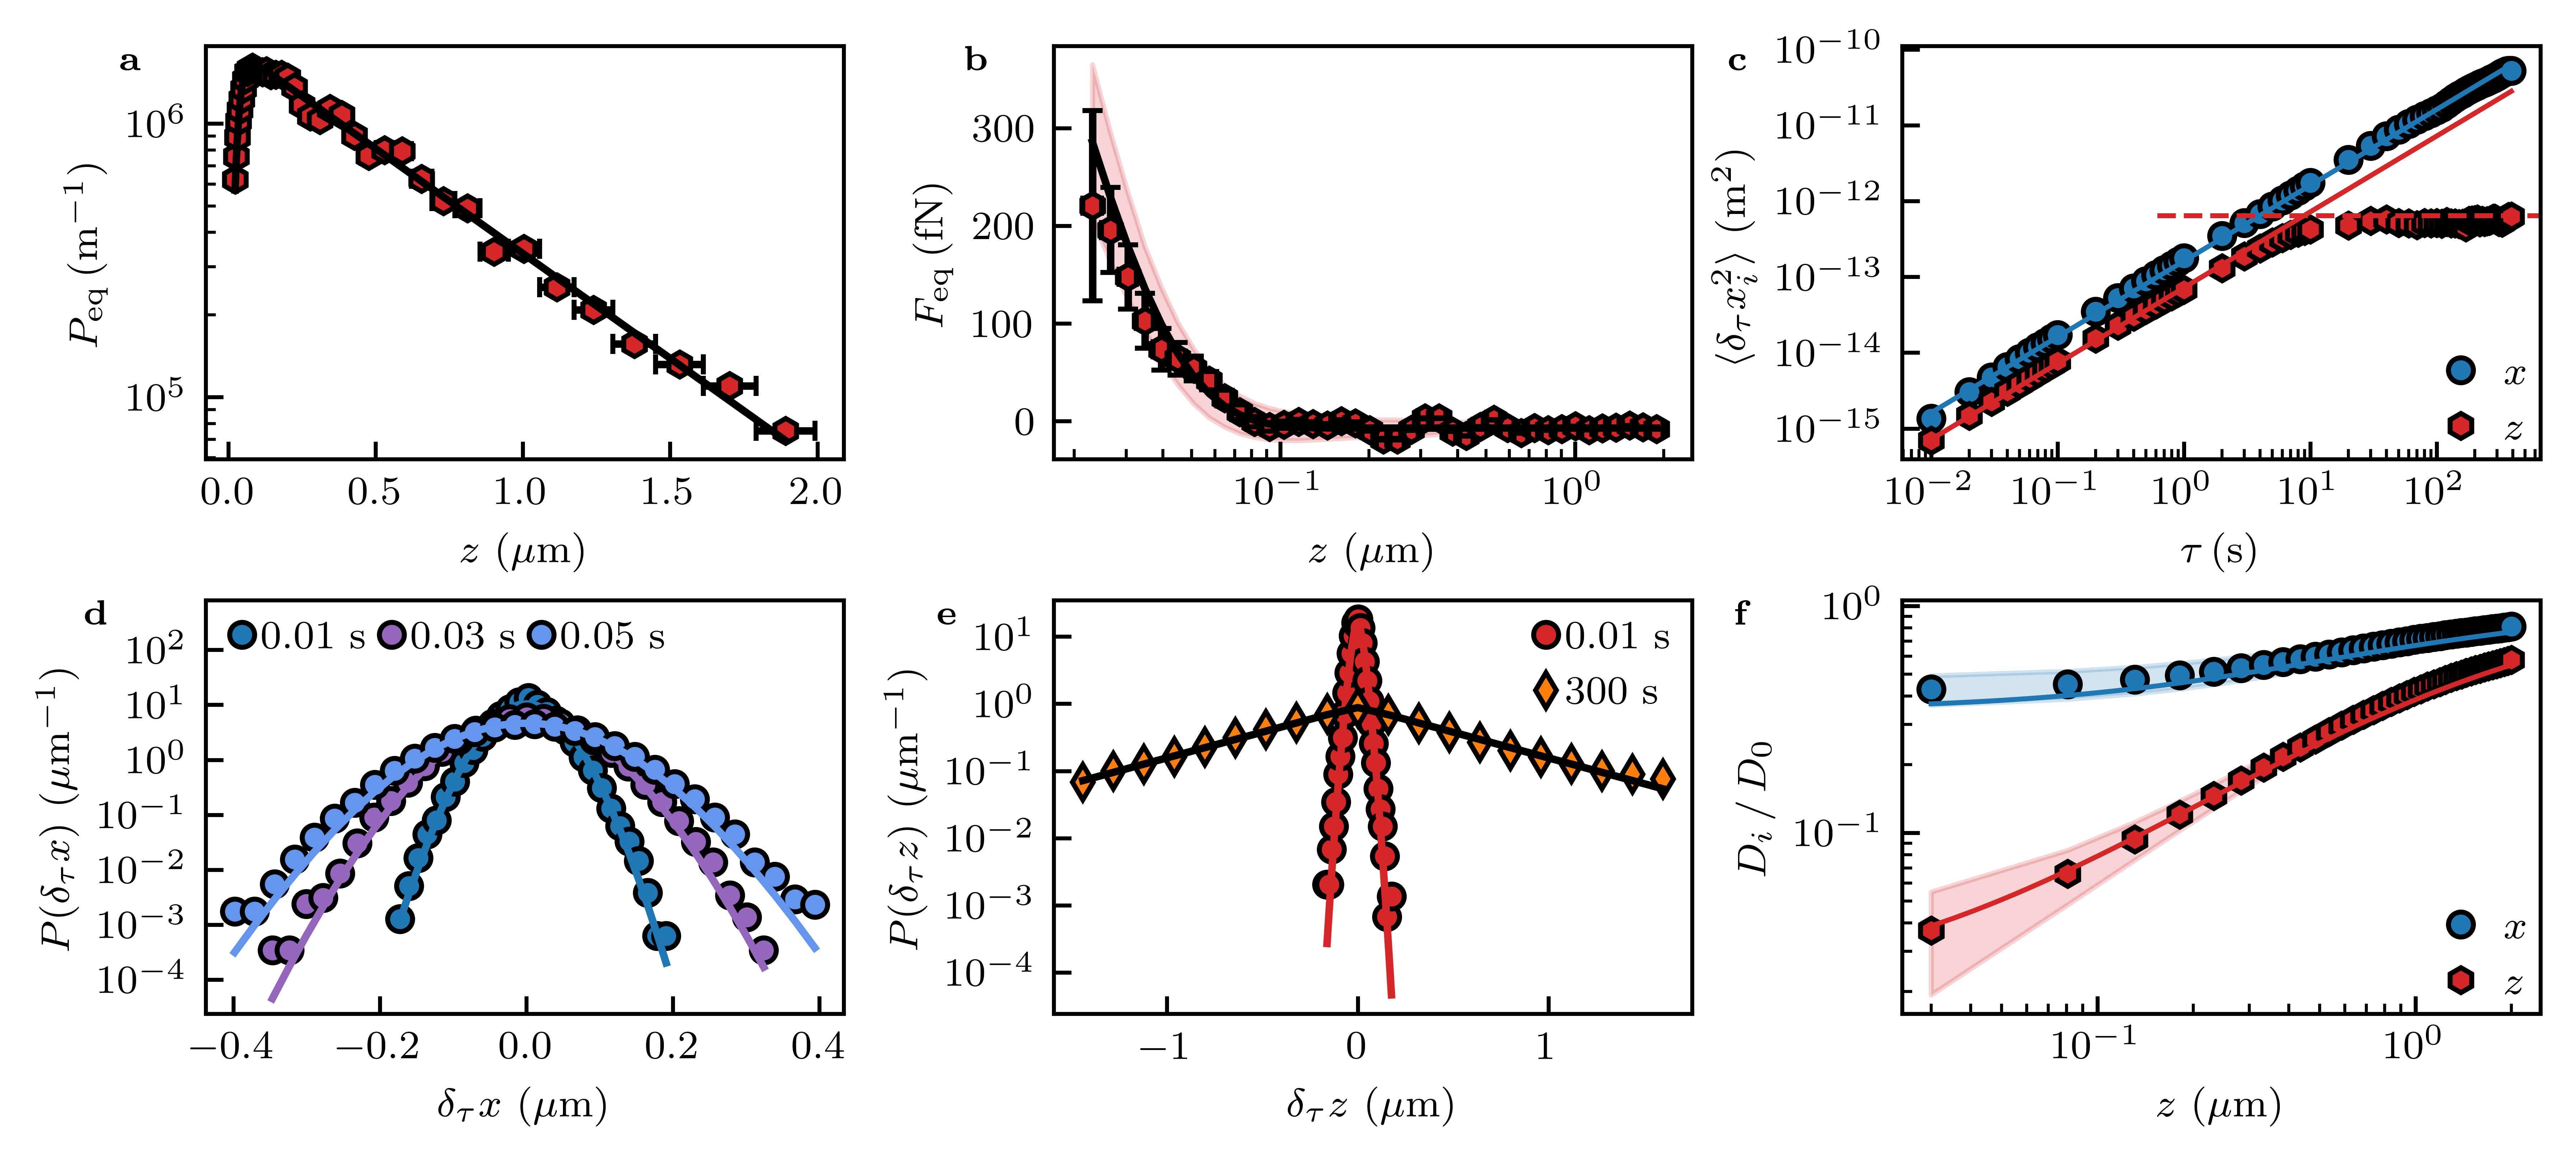

In [73]:
# Summary plot, every goddam things

fig = plt.figure(figsize=(18/2.54, 8/2.54), dpi=1000)

Nlin = 2
Ncol = 3

colors_blue = ['tab:blue', 'tab:purple', 'cornflowerblue', 'indigo', 'lightsteelblue']
colors_red = ['tab:red', 'tab:orange', 'darkred', 'rosybrown', 'salmon']


# -------------------------------------------------------------------------------------------------
# ---------- PDF
# -------------------------------------------------------------------------------------------------

ax1 = fig.add_subplot(Nlin, Ncol, 1)

ax1.errorbar(x_pdf_z * 1e6, y_pdf_z, yerr=err_y_pdf_z, xerr=width_pdf_z/2*1e6, 
             ls='', marker='h', markerfacecolor='tab:red', markersize=5, markeredgewidth=1, markeredgecolor='k', 
             ecolor='k', capsize=2, 
             label="Experiment", 
            )
ax1.errorbar(x_pdf_z_theory * 1e6, y_pdf_z_theory, yerr=0, 
             ls='-', color='k', 
             ecolor='w', capsize=0, 
             label="Theory", 
        )

# ax1.legend(loc='upper right', frameon=False)

ax1.set_xlabel(r"$z$ ($\mu$m)")
ax1.set_ylabel(r"$P_{\mathrm{eq}} \, \mathrm{(m^{-1})}$")
ax1.set_yscale("log")


# -------------------------------------------------------------------------------------------------
# ---------- Force
# -------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(Nlin, Ncol, 2)

ax2.plot(x_F_eq * 1e6, y_F_eq * 1e15, ls='', marker='h', 
         markerfacecolor='tab:red', markersize=5, markeredgewidth=1, markeredgecolor='k', 
         # label="Experiment", 
        )
ax2.errorbar(x_F_eq * 1e6, y_F_eq * 1e15, yerr=data['err_y_F_eq']*1e15, xerr=data['width_F_eq']/2*1e6, 
             ls='', marker='', markerfacecolor='tab:red', markersize=5, markeredgewidth=1, markeredgecolor='k', 
             ecolor='k', capsize=2, 
             #label="Equilibrium (exp.)", 
            )
# This trick of plotting with plot and errorbar is only here so that the thermal noise appears last in the legend.
ax2.plot(x_F_eq_theory * 1e6, y_F_eq_theory * 1e15, ls='-', color='k', 
         # label="Theory", 
        )

ax2.fill_between((x_F_err_th) * 1e6, (y_F_eq_theory - y_F_err_th) * 1e15, (y_F_eq_theory + y_F_err_th) * 1e15, 
                 alpha=0.2, color='tab:red', 
                 label="Thermal noise range", 
                )

# ax2.legend(loc='upper right', frameon=False)
ax2.set_xlabel(r"$z$ ($\mu$m)")
ax2.set_ylabel(r"$F_{\mathrm{eq}} \, \mathrm{(fN)}$")
ax2.set_xscale("log")
ax2.set_yticks([0, 100, 200, 300])


# -------------------------------------------------------------------------------------------------
# ---------- MSD 
# -------------------------------------------------------------------------------------------------

ax3 = fig.add_subplot(Nlin, Ncol, 3)

ax3.plot(delta_time_MSD, MSD_para,
         ls='', marker='o', markersize=5, markerfacecolor='tab:blue', markeredgewidth=1, markeredgecolor='k', 
         label=r"$x$", 
        )
ax3.plot(delta_time_MSD, 2 * mean_D_para_from_multifit * D0 * delta_time_MSD, ls='-', linewidth=1, color='tab:blue')

ax3.plot(delta_time_MSD, MSD_perp,
         ls='', marker='h', markersize=5, markerfacecolor='tab:red', markeredgewidth=1, markeredgecolor='k', 
         label=r"$z$", 
        )
ax3.plot(delta_time_MSD, 2 * mean_D_perp_from_multifit * D0 * delta_time_MSD, ls='-', linewidth=1, color='tab:red')
ax3.axhline(y=plateau_MSDz_theory, xmin=0.4, xmax=1, ls='--', linewidth=1, color='tab:red')

ax3.legend(frameon=False, loc='lower right', labelspacing=0.5, handletextpad=0.1, borderpad=0.1, borderaxespad=0.2)
ax3.set_xlabel(r"$\tau \, \mathrm{(s)}$")
ax3.set_ylabel(r"$\langle \delta_\tau x_i ^2 \rangle$ $\mathrm{(m^2)}$")
ax3.set_xscale("log")
ax3.set_yscale("log")


# -------------------------------------------------------------------------------------------------
# ---------- Probability of displacement parallel to the wall, at short time
# -------------------------------------------------------------------------------------------------

ax5 = fig.add_subplot(Nlin, Ncol, 4)

for n, i in enumerate([1,3,5]):
    bins_center, hist = data["proba_dx_short_timestep_{}".format(i)]
    _, theory_hist = data["proba_dx_short_timestep_{}_theory".format(i)]
    # theory_hist = P_dx_short(bins_center, i/fps, B, lD, lB, b)
    ax5.plot(
        bins_center*1e6, hist*1e-6, 
        ls='', marker='o', markersize=5, markerfacecolor=colors_blue[n], markeredgewidth=1, markeredgecolor='k', 
        label='{0:.2f} s'.format(i/fps), 
    )
    ax5.plot(bins_center*1e6, theory_hist*1e-6, ls ='-', color=colors_blue[n])
ax5.legend(frameon=False, loc='upper left', handlelength=0.8, handletextpad=0.1, borderpad=0.01, ncol=3, columnspacing=0.2)
ax5.set_xlabel(r"$\delta_\tau x$ ($\mu$m)")
ax5.set_ylabel(r"$P(\delta_\tau x)$ ($\mathrm{\mu m ^{-1}}$)")
ax5.set_yscale("log")
ax5.set_ylim([None, 800])



# -------------------------------------------------------------------------------------------------
# ---------- Probability of displacement perpendicular to the wall
# -------------------------------------------------------------------------------------------------

ax6 = fig.add_subplot(Nlin, Ncol, 5)

# for n, i in enumerate([1]):
#     bins_center, hist = data["proba_dz_short_timestep_{}".format(i)]
#     # theory_hist = P_dz_short(bins_center, i/fps, B, lD, lB, b)
#     ax6.plot(
#         bins_center*1e6, hist*1e-6, 
#         ls='', marker='o', markersize=5, markerfacecolor=colors_red[n], markeredgewidth=1, markeredgecolor='k', 
#         label='{0:.3f} s'.format(i/fps), 
#     )
#     # ax6.plot(bins_center*1e6, theory_hist*1e-6, ls ='-', color=colors_red[n])

# ax6.errorbar(
#     data['bins_centers_long'] * 1e6, data['proba_deltaz_long']*1e-6, yerr=0, xerr=0, 
#     ls='', marker='h', markerfacecolor='tab:red', markersize=5, markeredgewidth=1, markeredgecolor='k', 
#     ecolor='k', capsize=2, 
#     label="300 s", 
# )
# ax6.errorbar(
#     data['bins_centers_long'] * 1e6, data["proba_deltaz_long_theory"] * 1e-6, xerr=0, yerr=0, 
#     ls='-', marker='', color='k', 
#     ecolor='w', capsize=0, 
#     # label="Theory", 
# )


Pmin_long = 5e4

# Short times
for n, i in enumerate([1]):
    bins_center, hist = data["proba_dz_short_timestep_{}".format(i)]
    _, theory_hist = data["proba_dz_short_timestep_{}_theory".format(i)] #P_dz_short(bins_center, i/fps, B, lD, lB, b)
    # theory_hist = theory_hist / np.max(hist)
    # hist = hist / np.max(hist)
    ax6.plot(
        bins_center*1e6, hist*1e-6, 
        ls='', marker=markers_pdf[n], markersize=5, markerfacecolor=colors_red[n], markeredgewidth=1, markeredgecolor='k', 
        label='{0:.2f} s'.format(i/fps), 
    )
    ax6.plot(bins_center*1e6, theory_hist*1e-6, ls ='-', color=colors_red[n])

# Long times
ax6.plot(
    bins_centers_long[proba_deltaz_long >= Pmin_long] * 1e6, proba_deltaz_long[proba_deltaz_long >= Pmin_long] * 1e-6, 
    ls='', marker=markers_pdf[n+1], markerfacecolor=colors_red[n+1], markersize=5, markeredgewidth=1, markeredgecolor='k', 
    label='300 s'
)
ax6.plot(
    bins_centers_long[proba_deltaz_long >= Pmin_long] * 1e6, proba_deltaz_long_theory[proba_deltaz_long >= Pmin_long] * 1e-6, 
    ls='-', color='k', 
    zorder=3, 
)

ax6.legend(frameon=False, loc='best', handlelength=0.8, handletextpad=0.1, borderpad=0.01, ncol=1, columnspacing=0.3)
ax6.set_xlabel(r"$\delta_\tau z$ ($\mu$m)")
ax6.set_ylabel(r"$P(\delta_\tau z)$ ($\mathrm{\mu m ^{-1}}$)")
ax6.set_yscale("log")
# ax6.set_ylim([1e-4, 400])


# -------------------------------------------------------------------------------------------------
# ---------- Diffusion profiles
# -------------------------------------------------------------------------------------------------

ax7 = fig.add_subplot(Nlin, Ncol, 6)

# Parallel
ax7.plot(x_D_para_z[x_D_para_z < z_D_max] * 1e6, y_D_para_z[x_D_para_z < z_D_max], 
         ls='', marker='o', markersize=5, markerfacecolor='tab:blue', 
         label=r"$x$", 
        )
ax7.fill_between(x_D_para_z * 1e6, y_D_para_z - 1/2 * err_y_D_para_z, y_D_para_z + 1/2 * err_y_D_para_z, 
                color='tab:blue', alpha=0.2, 
                )
ax7.plot(x_D_para_z_theory * 1e6, y_D_para_z_theory, ls='-', linewidth=1, color='tab:blue')

# Perpendicular
ax7.plot(x_D_perp_z[x_D_para_z < z_D_max] * 1e6, y_D_perp_z[x_D_para_z < z_D_max], 
         ls='', marker='h', markersize=5, markerfacecolor='tab:red', 
         label=r"$z$", 
        )
ax7.fill_between(x_D_perp_z * 1e6, y_D_perp_z - 1/2 * err_y_D_perp_z, y_D_perp_z + 1/2 * err_y_D_perp_z, 
                color='tab:red', alpha=0.2, 
                )
ax7.plot(x_D_perp_z_theory * 1e6, y_D_perp_z_theory, ls='-', linewidth=1, color='tab:red')

ax7.legend(frameon=False, loc='lower right', labelspacing=0.5, handletextpad=0.1, borderpad=0.1, borderaxespad=0.2)

ax7.set_xlabel(r"$z$ ($\mu$m)")
ax7.set_ylabel(r"$D_i \, / \, D_0$")
ax7.set_xscale("log")
ax7.set_yscale("log")


# -------------------------------------------------------------------------------------------------
# ---------- General properties
# -------------------------------------------------------------------------------------------------

locmaj = mpl.ticker.LogLocator(base=10,numticks=6) 
ax3.xaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10,subs=(0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=6)
ax3.xaxis.set_minor_locator(locmin)
ax3.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

locmaj = mpl.ticker.LogLocator(base=10,numticks=10) 
ax3.yaxis.set_major_locator(locmaj)

locmaj = mpl.ticker.LogLocator(base=10,numticks=8) 
ax5.yaxis.set_major_locator(locmaj)
locmaj = mpl.ticker.LogLocator(base=10,numticks=8) 
ax6.yaxis.set_major_locator(locmaj)


ax1.annotate(
    "$\mathbf{a}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.1, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax2.annotate(
    "$\mathbf{b}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.1, 1.), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax3.annotate(
    "$\mathbf{c}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.24, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax5.annotate(
    "$\mathbf{d}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.15, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax6.annotate(
    "$\mathbf{e}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.15, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax7.annotate(
    "$\mathbf{f}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.24, 1.), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)




plt.tight_layout(pad=0.5)
plt.show()

In [74]:
# fig.savefig('figure_SI_multifit.pdf')

# Plot General Observables For Several Trajectories At the Same Time

In [72]:
markers = ['s', 'o', 'h', 'd', 'D']
colors = ['k', 'tab:blue', 'tab:purple', 'teal', 'olivedrab', 'navy']
labels = ['Rigid', 'Oil in water', 'Oil in water + EG (w30)', 'Oil in water + EG (w40)', 'Oil in water + Glycerol (w38)']

In [73]:
def get_multifitted_values(datas):

    a = np.zeros(len(datas))
    B = np.zeros(len(datas))
    lD = np.zeros(len(datas))
    lB = np.zeros(len(datas))
    z0 = np.zeros(len(datas))
    b = np.zeros(len(datas))
    
    for i, data in enumerate(datas):
        a[i] = data['r']
        B[i] = data['fitted_B']
        lD[i] = data['fitted_lD']
        lB[i] = data['fitted_lB']
        z0[i] = data['fitted_z0']
        b[i] = data['fitted_b']
        
    return a, B, lD, lB, z0, b

In [74]:
def B_theory(a, psi_p=0.9e-3, psi_w=20e-3, e=1.6e-19, eps_0=8.85e-12, eps_r=78.5, kT=4e-21):
    return 16 * (eps_0 * eps_r * kT) / e**2 * a * np.tanh( (e * psi_p / 4 / kT) ) * np.tanh( (e * psi_w / 4 / kT) )

# The values of psi are chosen randomly.

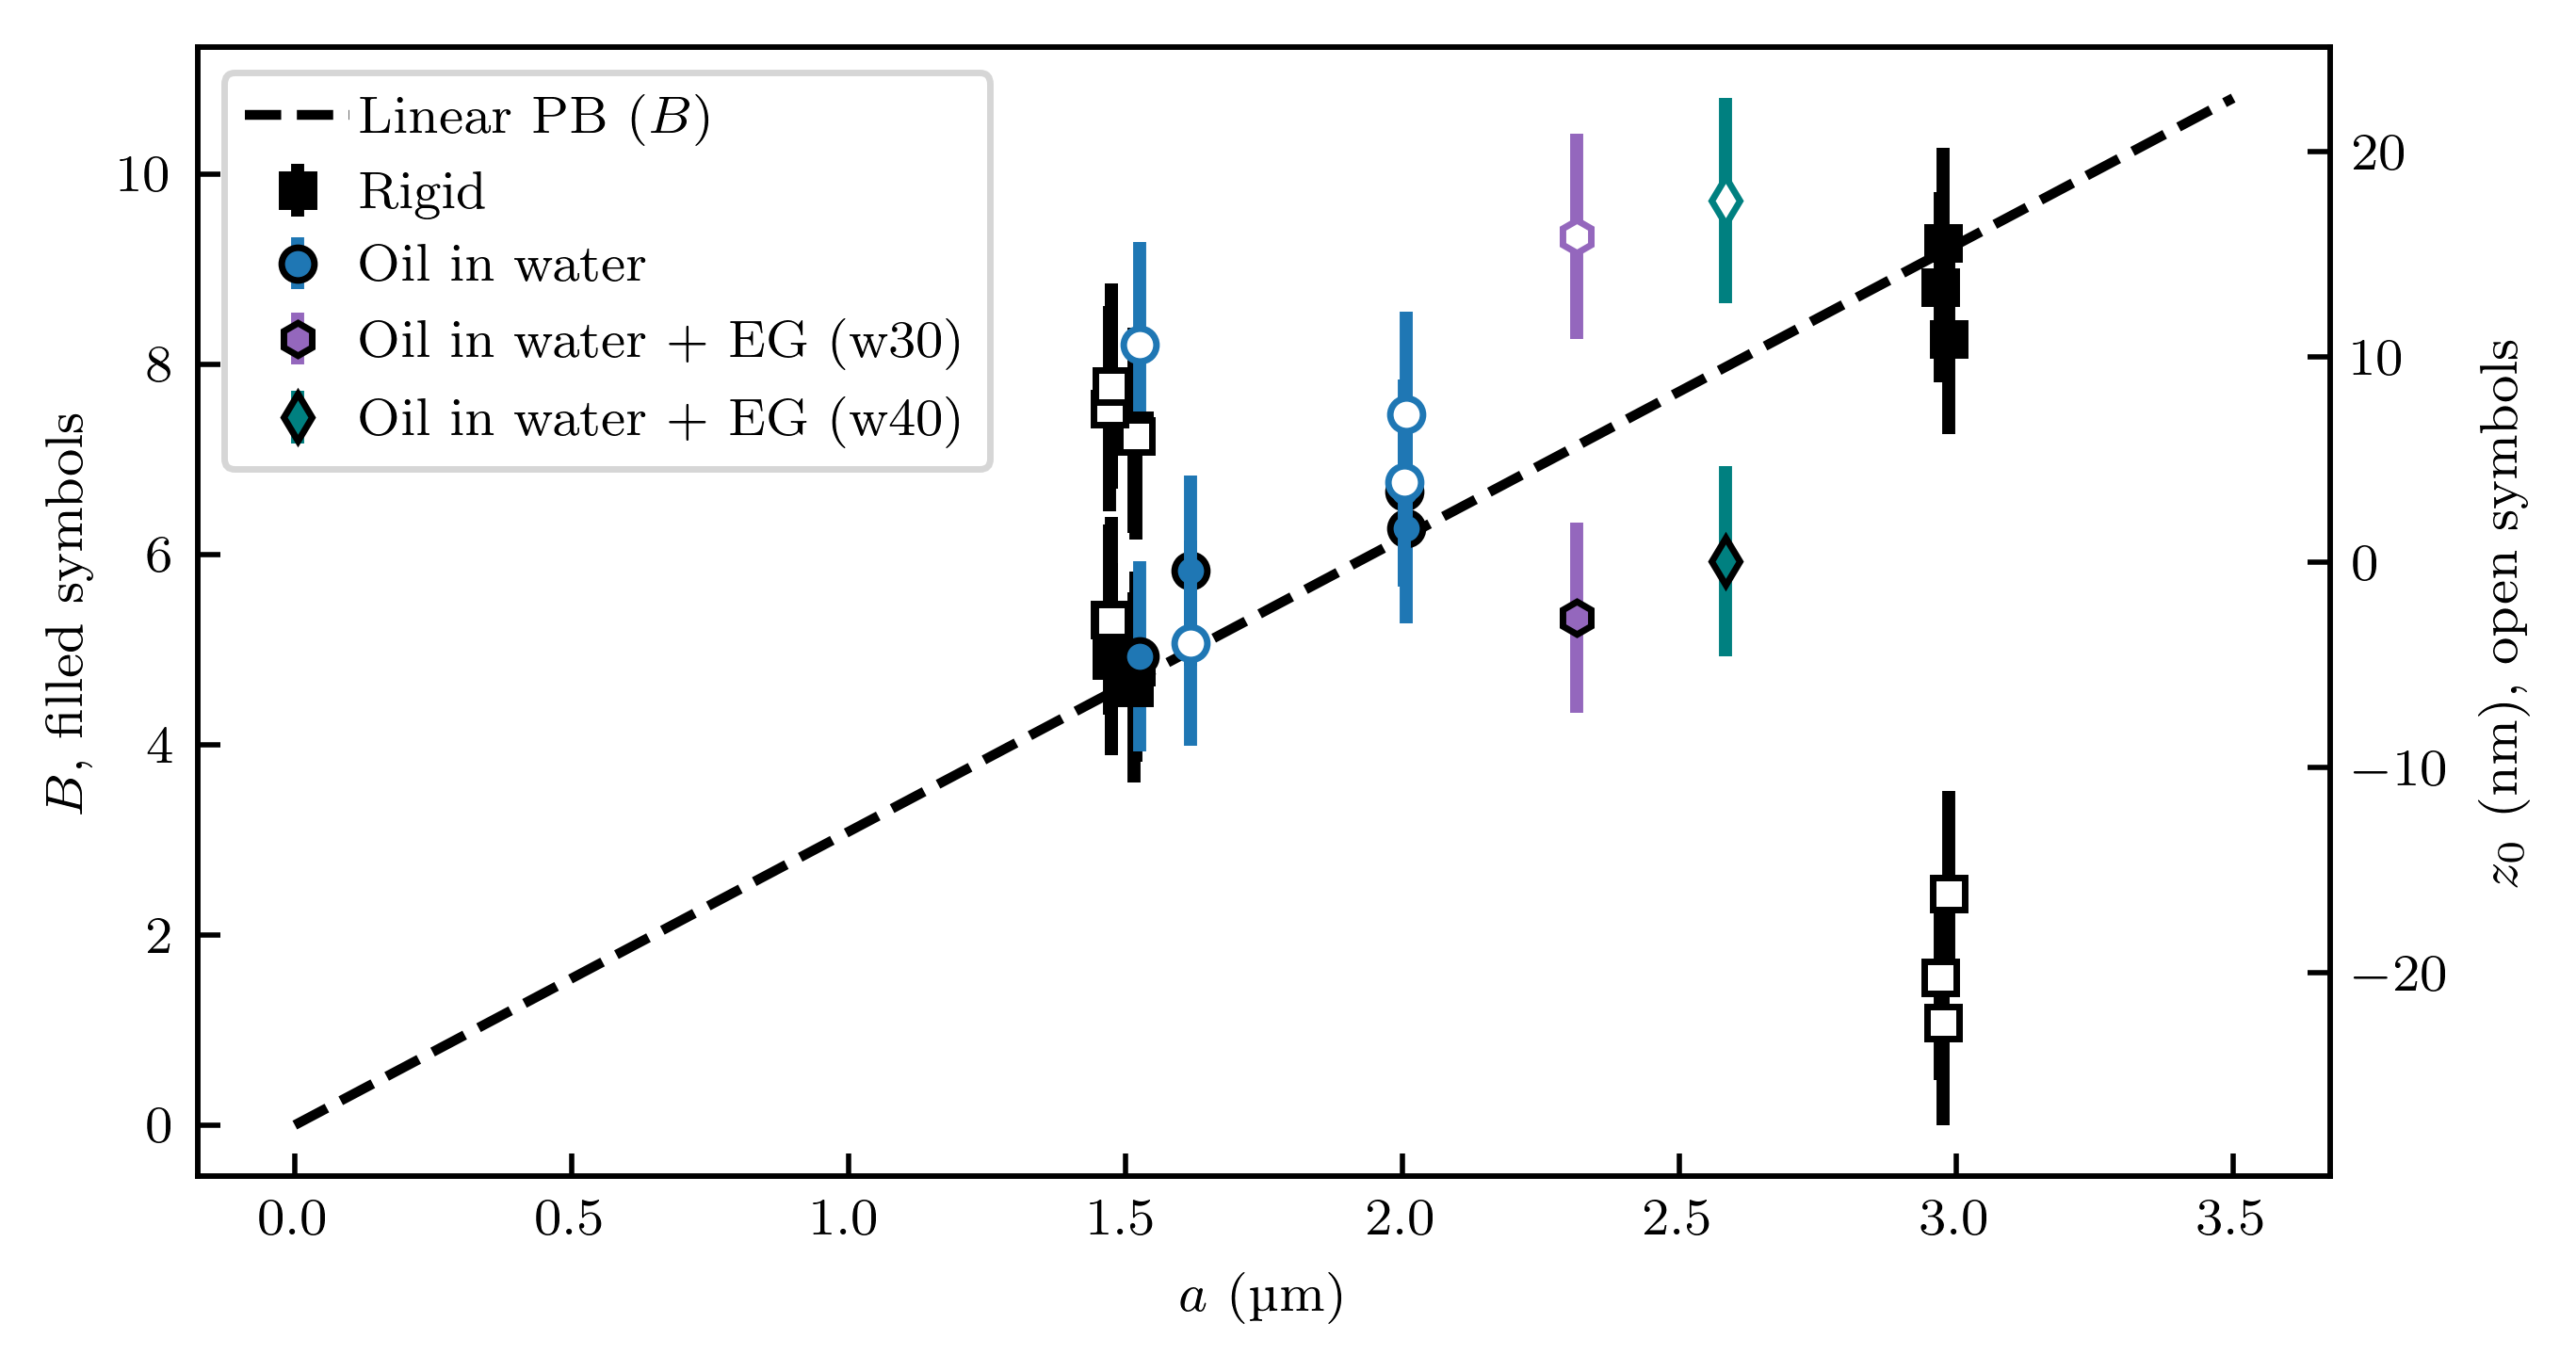

In [75]:
fig, ax1 = plt.subplots(1, 1, figsize=(14/2.54, 7.5/2.54))
ax2 = ax1.twinx()

for i, datas in enumerate([datas_rigid, datas_water, datas_wEG30, datas_wEG40]):
    a, B, lD, lB, z0, b = get_multifitted_values(datas)
    
    ax1.errorbar(
        a * 1e6, B, yerr=1*np.ones(len(B)), 
        ls='', marker=markers[i], markersize=5, markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=1, 
        ecolor=colors[i], elinewidth=2, 
        label=labels[i], 
    )
    ax2.errorbar(
        a * 1e6, z0 * 1e9, yerr=5*np.ones(len(z0)), 
        ls='', marker=markers[i], markersize=5, markerfacecolor='w', markeredgecolor=colors[i], markeredgewidth=1, 
        ecolor=colors[i], elinewidth=2, 
    )

radii = np.linspace(0, 3.5, 20) * 1e-6
ax1.plot(radii * 1e6, B_theory(radii), '--k', label='Linear PB ($B$)')

ax1.legend(frameon=True, loc='best', handletextpad=0.2)
ax1.set(
    xlabel='$a$ (µm)', 
    ylabel='$B$, filled symbols', 
    xscale='linear', 
    yscale='linear', 
)
ax2.set(
    xlabel='$a$ (µm)', 
    ylabel='$z_0$ (nm), open symbols', 
    xscale='linear', 
    yscale='linear', 
)

plt.tight_layout()
plt.show()

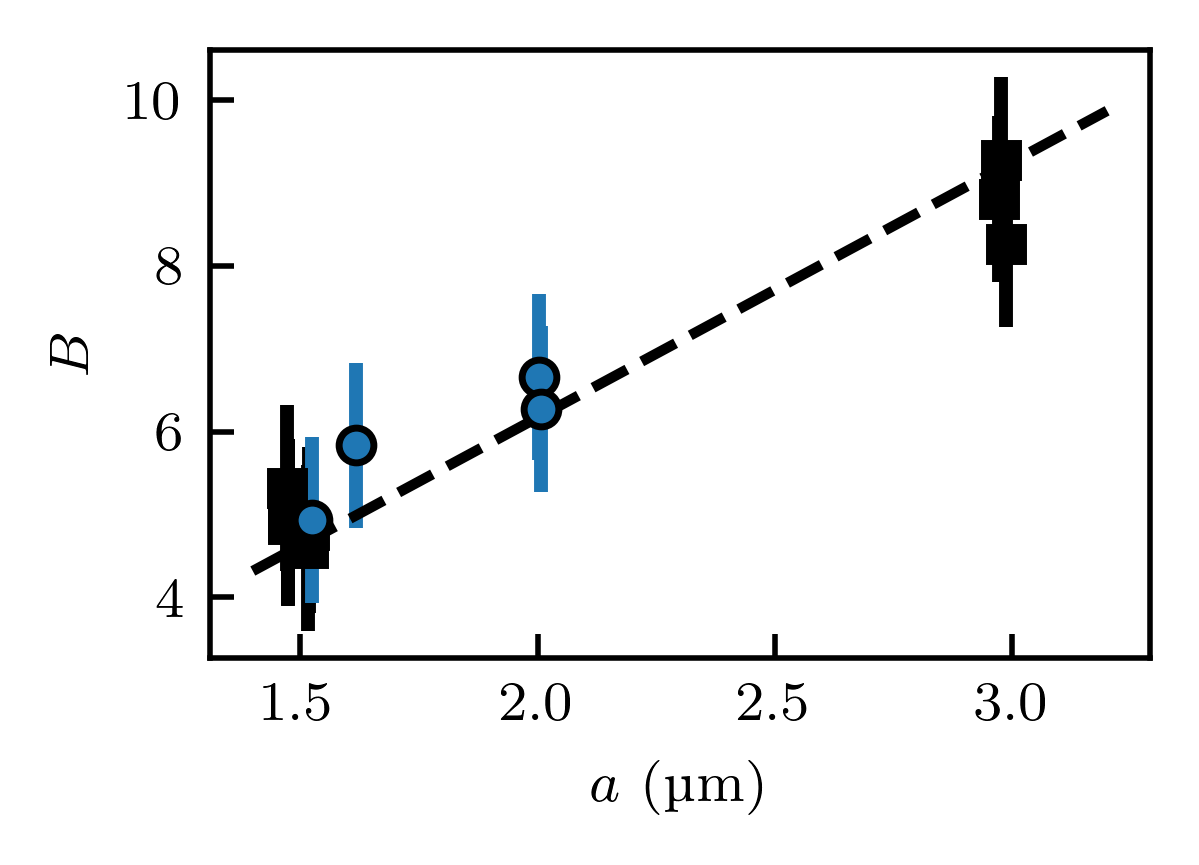

In [76]:
fig, ax1 = plt.subplots(1, 1, figsize=(5.7/2.54, 4/2.54))

local_labels = ['PS', 'Oil']

# for i, datas in enumerate([datas_rigid, datas_water, datas_wEG30, datas_wEG40]):
for i, datas in enumerate([datas_rigid, datas_water]):
    a, B, lD, lB, z0, b = get_multifitted_values(datas)
    
    ax1.errorbar(
        a * 1e6, B, yerr=1*np.ones(len(B)), 
        ls='', marker=markers[i], markersize=5, markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=1, 
        ecolor=colors[i], elinewidth=2, 
        label=local_labels[i], 
    )

radii = np.linspace(1.4, 3.2, 20) * 1e-6
ax1.plot(radii * 1e6, B_theory(radii), '--k')

# ax1.legend(frameon=False, loc='lower right', handletextpad=0.1, ncol=1, borderpad=0.2, columnspacing=0.2)
ax1.set(
    xlabel='$a$ (µm)', 
    ylabel='$B$', 
    xscale='linear', 
    yscale='linear',
    xticks=[1.5, 2, 2.5, 3], 
)

plt.tight_layout(pad=0.2)
plt.show()

In [77]:
# fig.savefig('figure_SM_B.pdf')

In [78]:
# Salt Concentration 
# Data from Maxime PRR 

NaCl = np.array([0.139e-3, 37.685e-6, 16.3e-6, 8.9e-6 ])
ld_th = 0.304 / np.sqrt(NaCl)

ld_exp =  [25.1, 50.0, 75.1, 100.0]
B_exp = [4.4,4.1,4.0,4.1]

d_ld_exp = [3, 5, 5, 5]


# Data me 

ld_thbis = [17, 17, 36, 36, 36]
NaClbis = (0.304 / np.array(ld_thbis)) ** 2
ld_expbis = [16, 22, 40, 35, 37]
d_ld_expbis = [3, 3, 5, 3, 3]

# Theory 
NaCl_theory = [8.9e-6, (0.304 / np.array(17)) ** 2]
ld_theory = 0.304 / np.sqrt(NaCl_theory)


# Data me 1.5 um

ld_th_1p5 = [17, 17, 17]
ld_exp_1p5 = [22, 13, 16]
NaCl_1p5 = (0.304 / np.array(ld_th_1p5)) ** 2

B_exp_1p5 = [4.9, 5.3, 4.9]


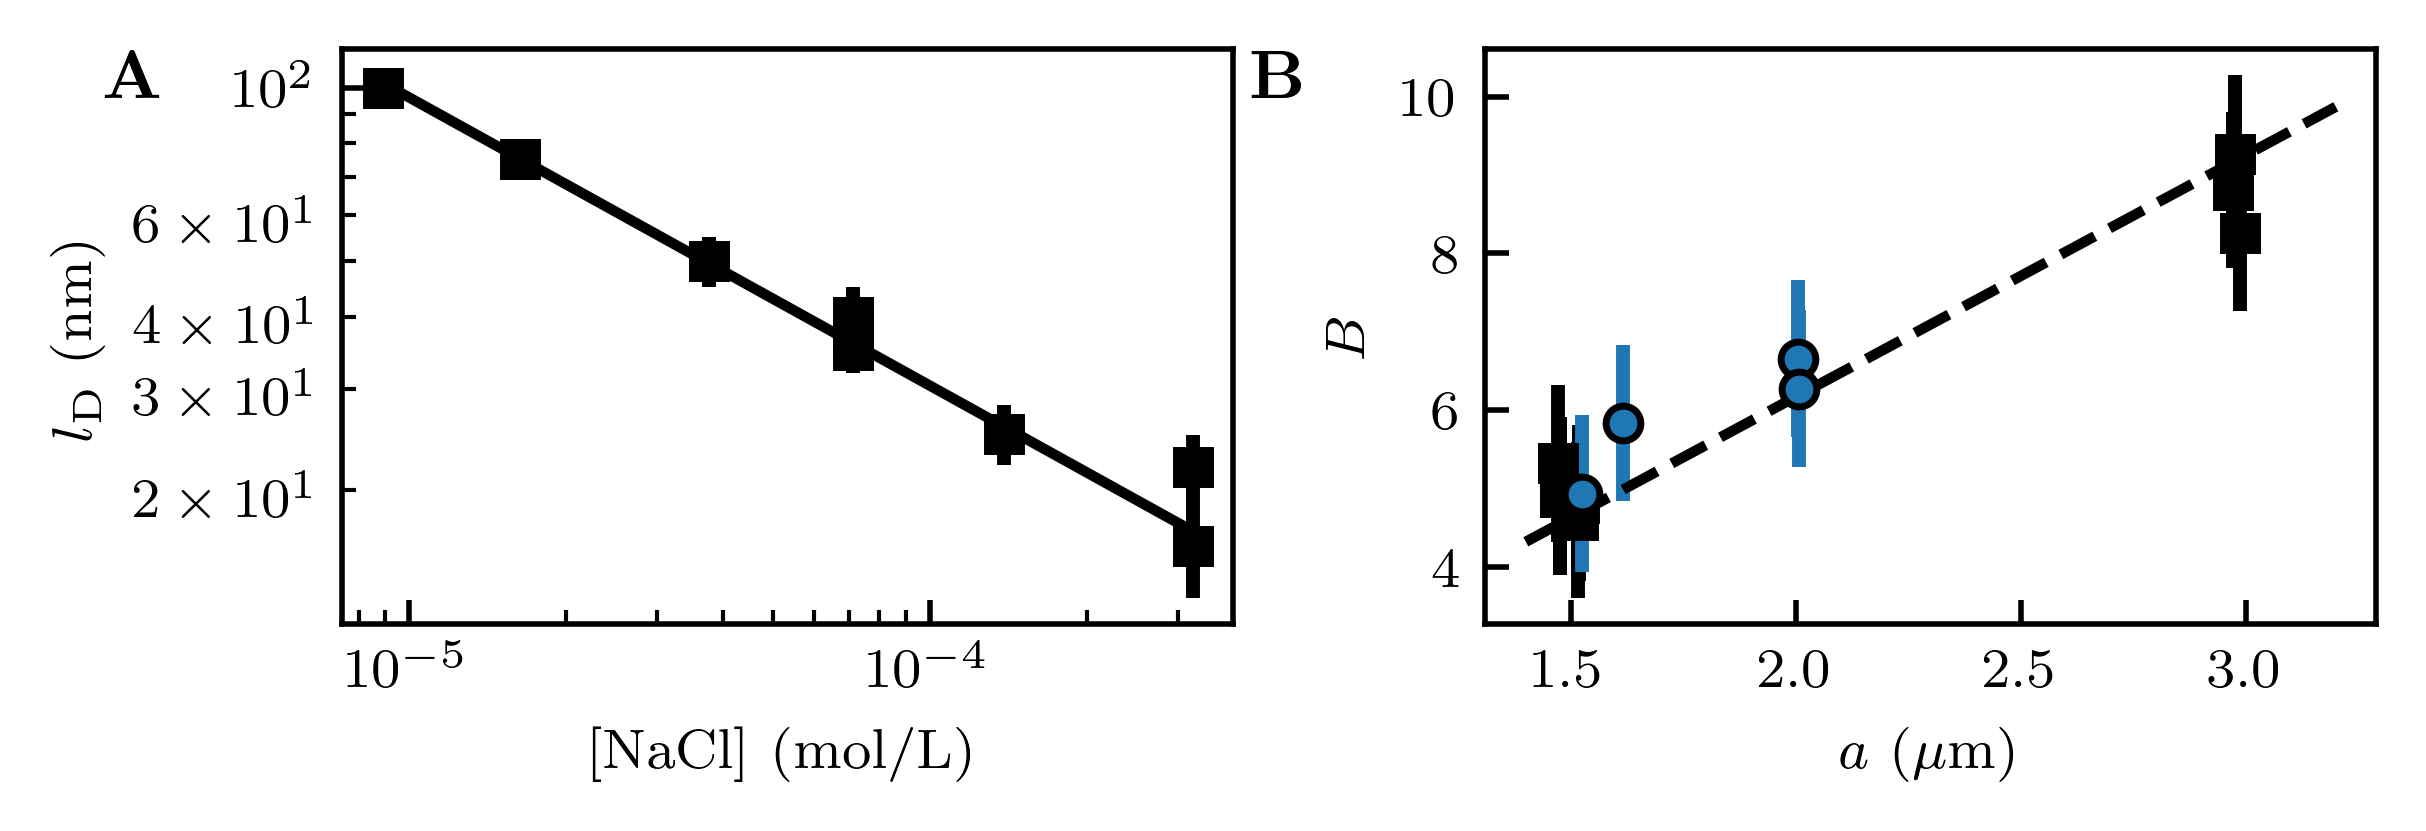

In [79]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12.1/2.54, 4/2.54))

local_labels = ['PS', 'Oil']

# Values PRR
ax1.errorbar(
    NaCl, ld_exp, yerr=d_ld_exp, 
    ls='', marker='s', markersize=5, markerfacecolor='k', markeredgecolor='k', markeredgewidth=1, 
    ecolor='k', elinewidth=2, 
    label='PS', 
)
# Values Me
ax1.errorbar(
    NaClbis, ld_expbis, yerr=d_ld_expbis, 
    ls='', marker='s', markersize=5, markerfacecolor='k', markeredgecolor='k', markeredgewidth=1, 
    ecolor='k', elinewidth=2, 
    label='PS', 
)

ax1.plot(NaCl_theory, ld_theory, ls='-', c='k')

# for i, datas in enumerate([datas_rigid, datas_water, datas_wEG30, datas_wEG40]):
for i, datas in enumerate([datas_rigid, datas_water]):
    a, B, lD, lB, z0, b = get_multifitted_values(datas)
    
    ax2.errorbar(
        a * 1e6, B, yerr=1*np.ones(len(B)), 
        ls='', marker=markers[i], markersize=5, markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=1, 
        ecolor=colors[i], elinewidth=2, 
        label=local_labels[i], 
    )

radii = np.linspace(1.4, 3.2, 20) * 1e-6
ax2.plot(radii * 1e6, B_theory(radii), '--k')

ax1.set(
    xlabel='[NaCl] (mol/L)', 
    ylabel='$l_\mathrm{D}$ (nm)', 
    xscale='log', 
    yscale='log', 
)

# ax2.legend(frameon=False, loc='lower right', handletextpad=0.1, ncol=1, borderpad=0.2, columnspacing=0.2)
ax2.set(
    xlabel='$a$ ($\mathrm{\mu m}$)', 
    ylabel='$B$', 
    xscale='linear', 
    yscale='linear',
    xticks=[1.5, 2, 2.5, 3], 
)


ax1.annotate(
    "$\mathbf{A}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.20, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=10, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax2.annotate(
    "$\mathbf{B}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.20, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=10, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)


plt.tight_layout(pad=0.5)
plt.show()

In [80]:
# fig.savefig('figure_SM_B_lD.pdf')

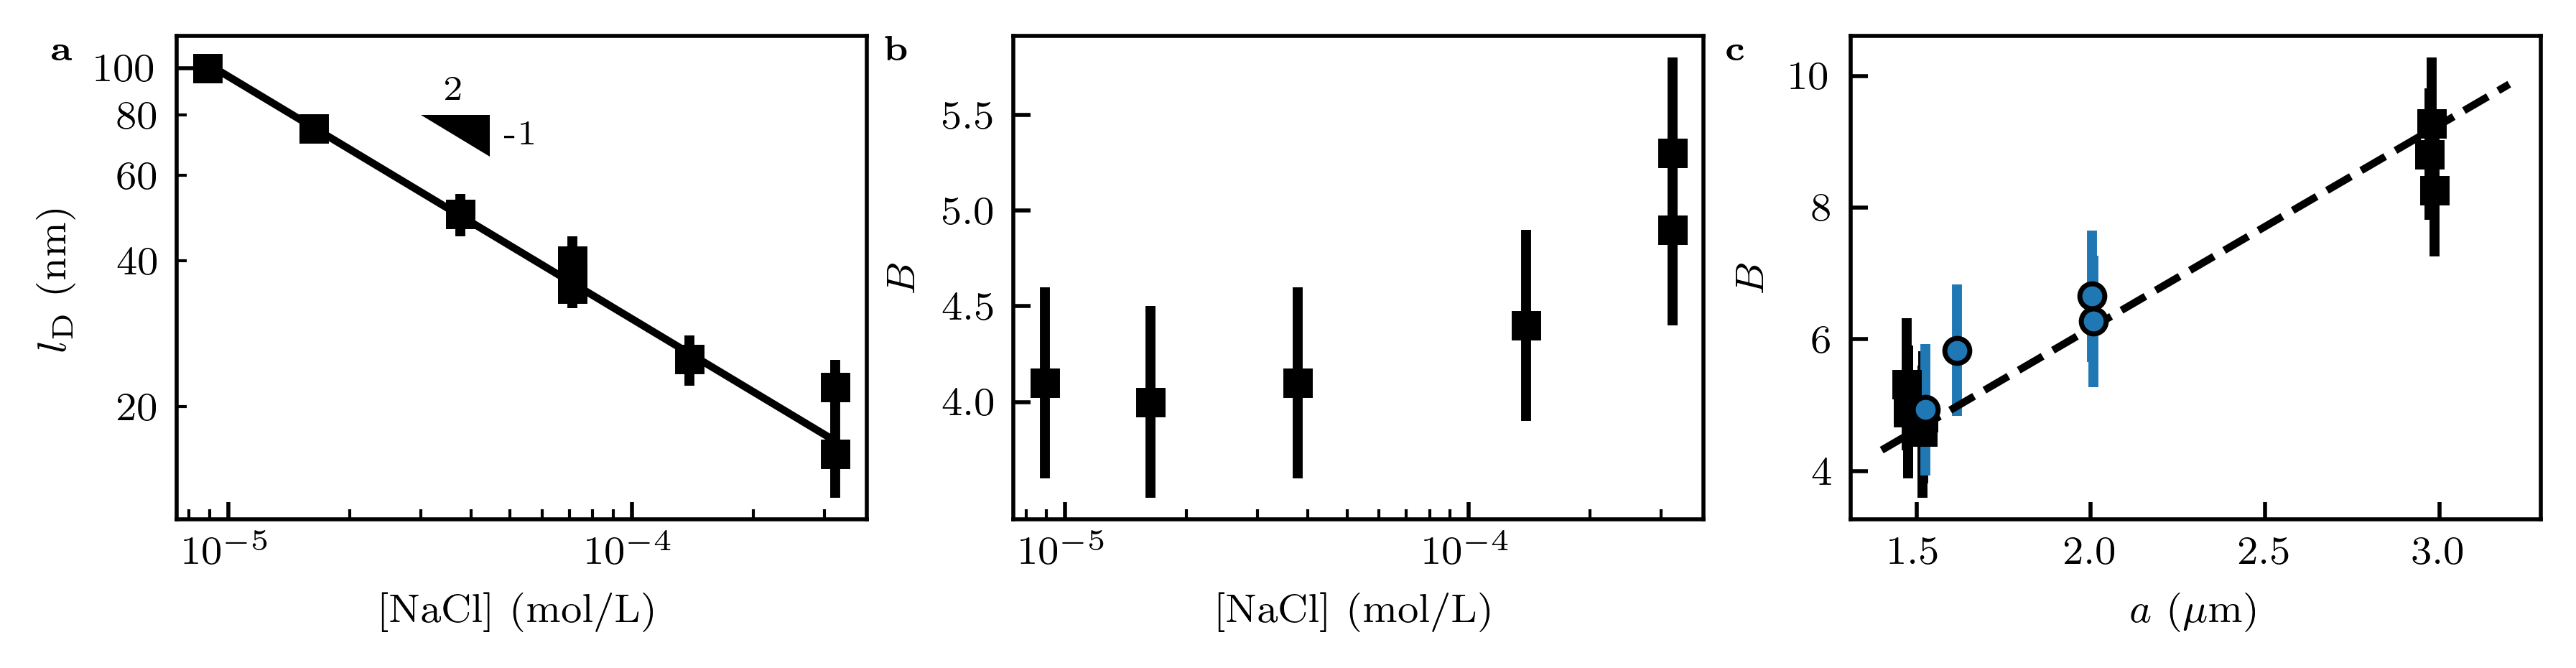

In [81]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(18/2.54, 4.5/2.54))

local_labels = ['PS', 'Oil']

# Values PRR
ax1.errorbar(
    NaCl, ld_exp, yerr=d_ld_exp, 
    ls='', marker='s', markersize=5, markerfacecolor='k', markeredgecolor='k', markeredgewidth=1, 
    ecolor='k', elinewidth=2, 
    label='PS', 
)
# Values Me
ax1.errorbar(
    NaClbis, ld_expbis, yerr=d_ld_expbis, 
    ls='', marker='s', markersize=5, markerfacecolor='k', markeredgecolor='k', markeredgewidth=1, 
    ecolor='k', elinewidth=2, 
    label='PS', 
)

ax1.plot(NaCl_theory, ld_theory, ls='-', c='k')

# for i, datas in enumerate([datas_rigid, datas_water, datas_wEG30, datas_wEG40]):
for i, datas in enumerate([datas_rigid, datas_water]):
    a, B, lD, lB, z0, b = get_multifitted_values(datas)
    
    ax3.errorbar(
        a * 1e6, B, yerr=1*np.ones(len(B)), 
        ls='', marker=markers[i], markersize=5, markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=1, 
        ecolor=colors[i], elinewidth=2, 
        label=local_labels[i], 
    )

radii = np.linspace(1.4, 3.2, 20) * 1e-6
ax3.plot(radii * 1e6, B_theory(radii), '--k')

# Values PRR 
ax2.errorbar(
    NaCl, B_exp, yerr=0.5, 
    ls='', marker='s', markersize=5, markerfacecolor='k', markeredgecolor='k', markeredgewidth=1, 
    ecolor='k', elinewidth=2, 
    label='PS', 
)
# Values me
ax2.errorbar(
    NaCl_1p5, B_exp_1p5, yerr=0.5, 
    ls='', marker='s', markersize=5, markerfacecolor='k', markeredgecolor='k', markeredgewidth=1, 
    ecolor='k', elinewidth=2, 
    label='PS', 
)


ax1.set(
    xlabel='[NaCl] (mol/L)', 
    ylabel='$l_\mathrm{D}$ (nm)', 
    xscale='log', 
    yscale='log', 
)
# locmaj = mpl.ticker.LogLocator(base=10,numticks=2) 
# ax1.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10,subs=(0.2,0.4,0.6,0.8),numticks=6)
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax1.yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
# locmin = mpl.ticker.LogLocator(base=10,subs=(0.2,0.4,0.6,0.8),numticks=2)
# ax1.xaxis.set_minor_locator(locmin)


# ax3.legend(frameon=False, loc='lower right', handletextpad=0.1, ncol=1, borderpad=0.2, columnspacing=0.2)
ax3.set(
    xlabel='$a$ ($\mathrm{\mu m}$)', 
    ylabel='$B$', 
    xscale='linear', 
    yscale='linear',
    xticks=[1.5, 2, 2.5, 3], 
)

ax2.set(
    xlabel='[NaCl] (mol/L)', 
    ylabel='$B$', 
    xscale='log', 
    yscale='linear', 
    yticks=[4, 4.5, 5, 5.5]
)


ax1.annotate(
    "$\mathbf{a}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.15, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax2.annotate(
    "$\mathbf{b}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.15, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax3.annotate(
    "$\mathbf{c}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.15, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)

annotation.slope_marker((3e-5, 80), (-1,2), invert=False, ax=ax1, text_kwargs={'color': 'k', 'fontsize':7}, poly_kwargs={'facecolor': 'k'})

# plt.subplots_adjust(wspace=1, hspace=1)


plt.tight_layout(pad=0.5)
plt.show()

In [82]:
# fig.savefig('figure_SI_B_lD.pdf')

In [83]:
def get_MSD_values(datas):

    a = np.zeros(len(datas))
    D0 = np.zeros(len(datas))
    eta_m = np.zeros(len(datas))
    mean_D_perp = np.zeros(len(datas))
    mean_D_para = np.zeros(len(datas))
    nl_perp = np.zeros(len(datas))
    nl_para = np.zeros(len(datas))
    
    for i, data in enumerate(datas):
        a[i] = data['r']
        D0[i] = data['D0']
        eta_m[i] = 4e-21 / (6 * np.pi * a[i] * D0[i])
        mean_D_perp[i] = data['mean_D_perp_from_MSD']
        mean_D_para[i] = data['mean_D_para_from_MSD']
        nl_perp[i] = data['noise_level_perp_from_MSD']
        nl_para[i] = data['noise_level_para_from_MSD']
        
    return a, D0, eta_m, mean_D_perp, mean_D_para, nl_perp, nl_para

In [84]:
def delta_rho(lB, a, kT=4e-21, g=9.81):
    return kT / (4/3 * np.pi * g * a**3 * lB)

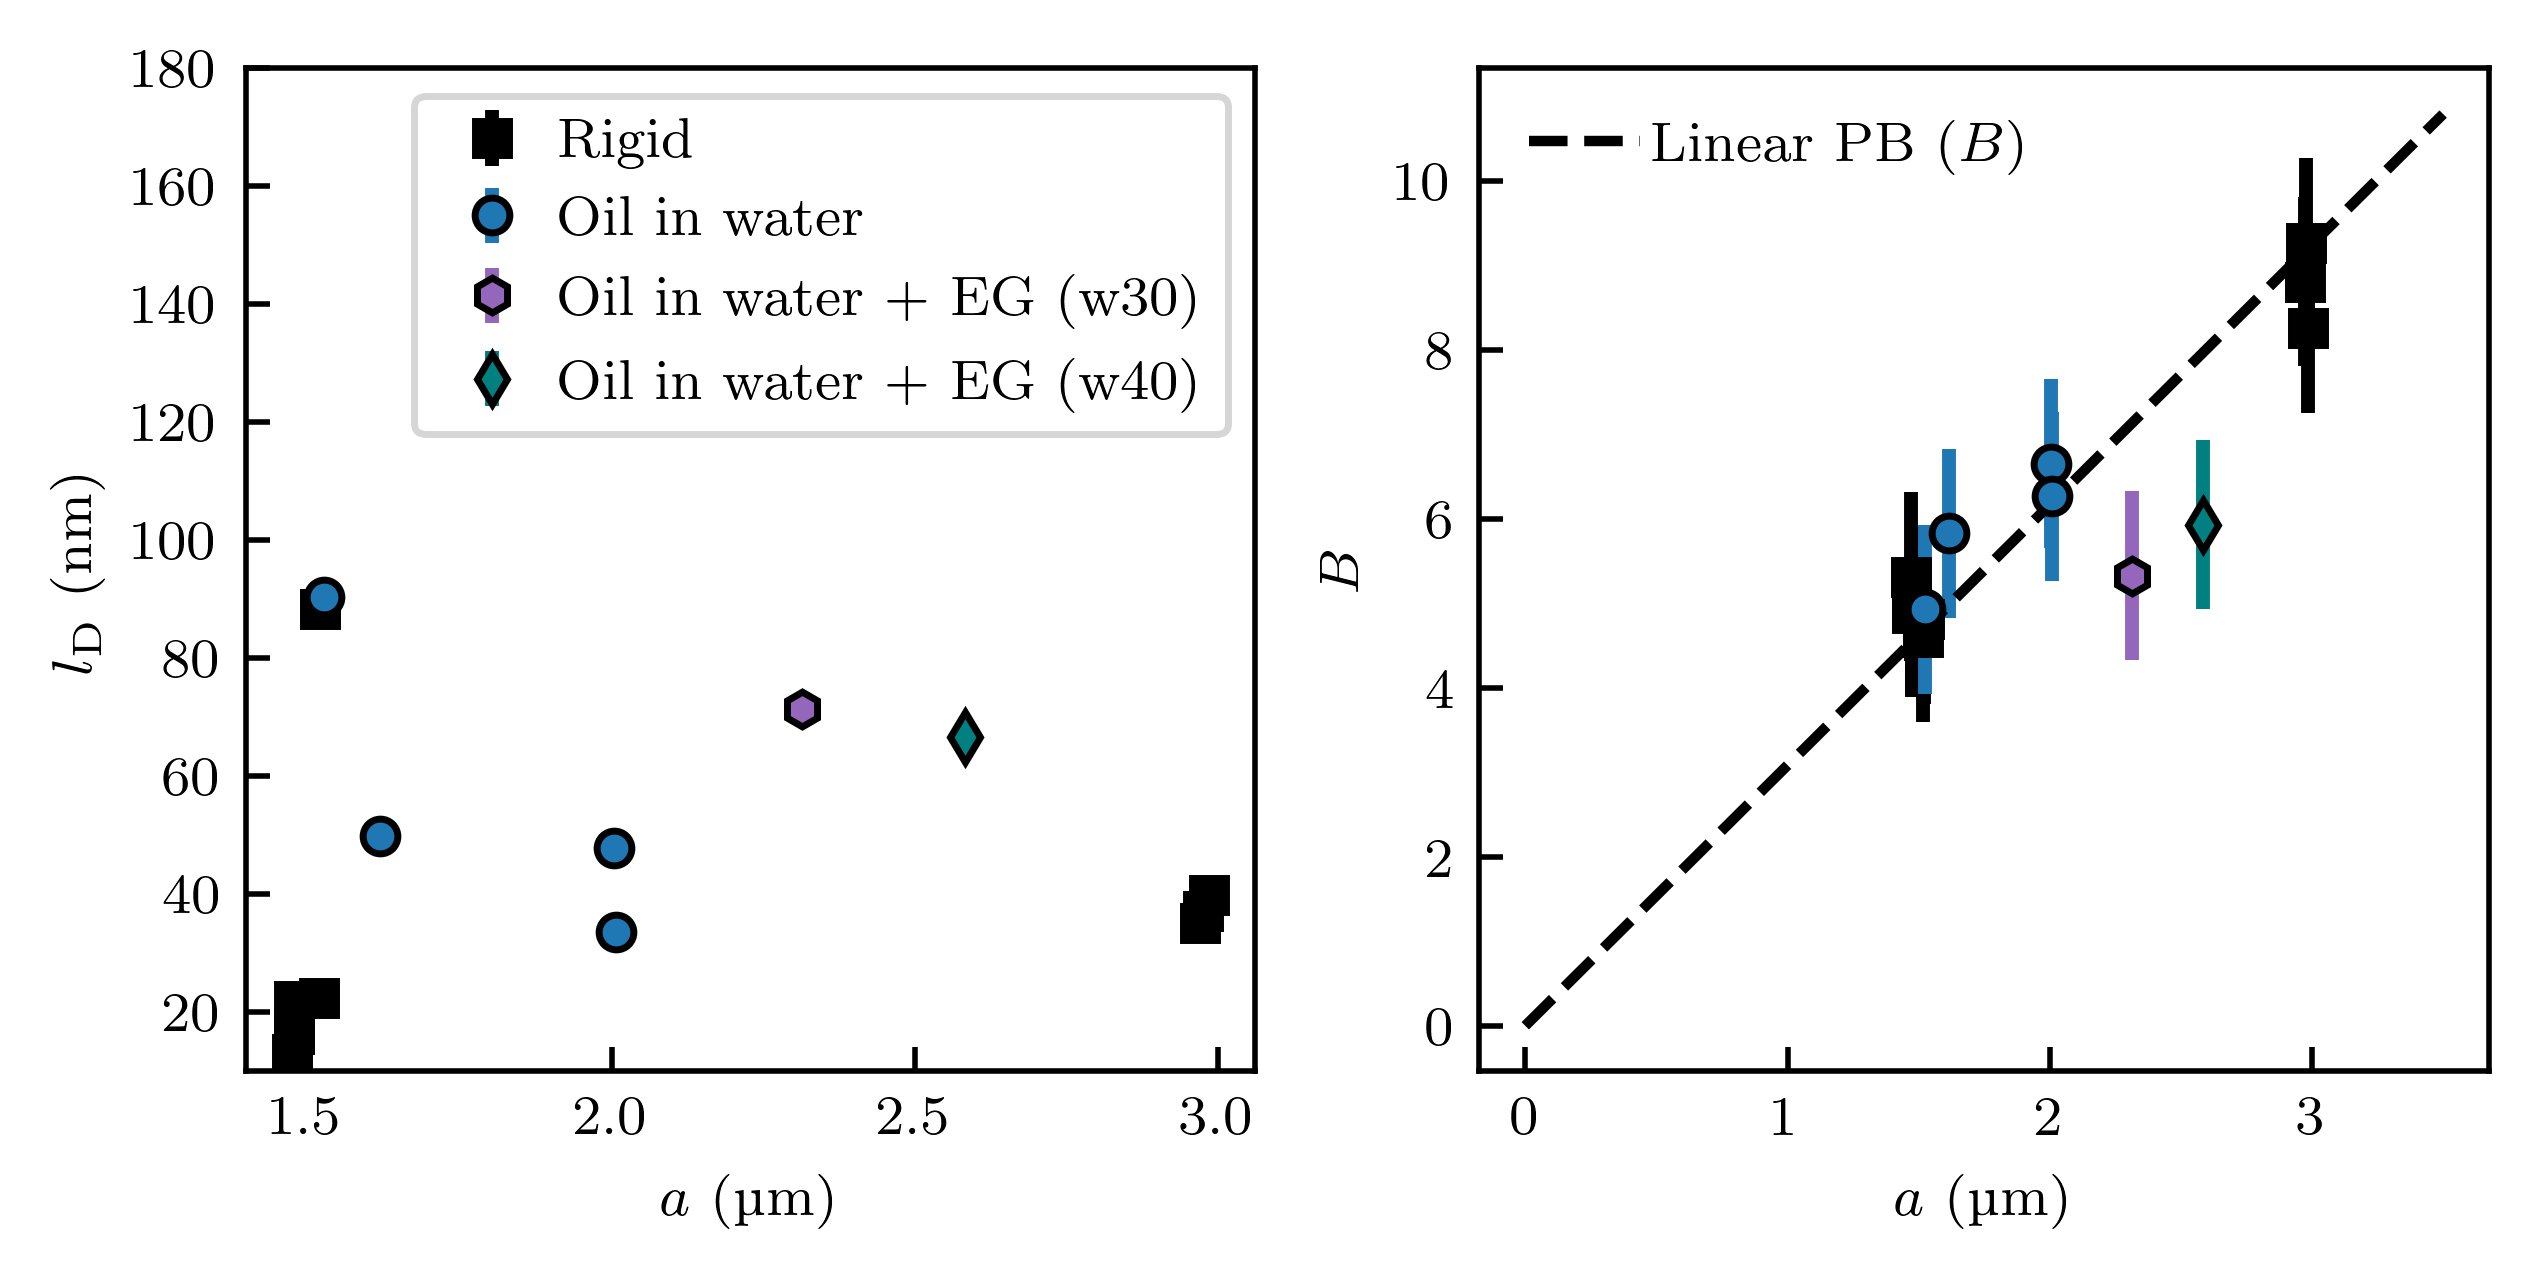

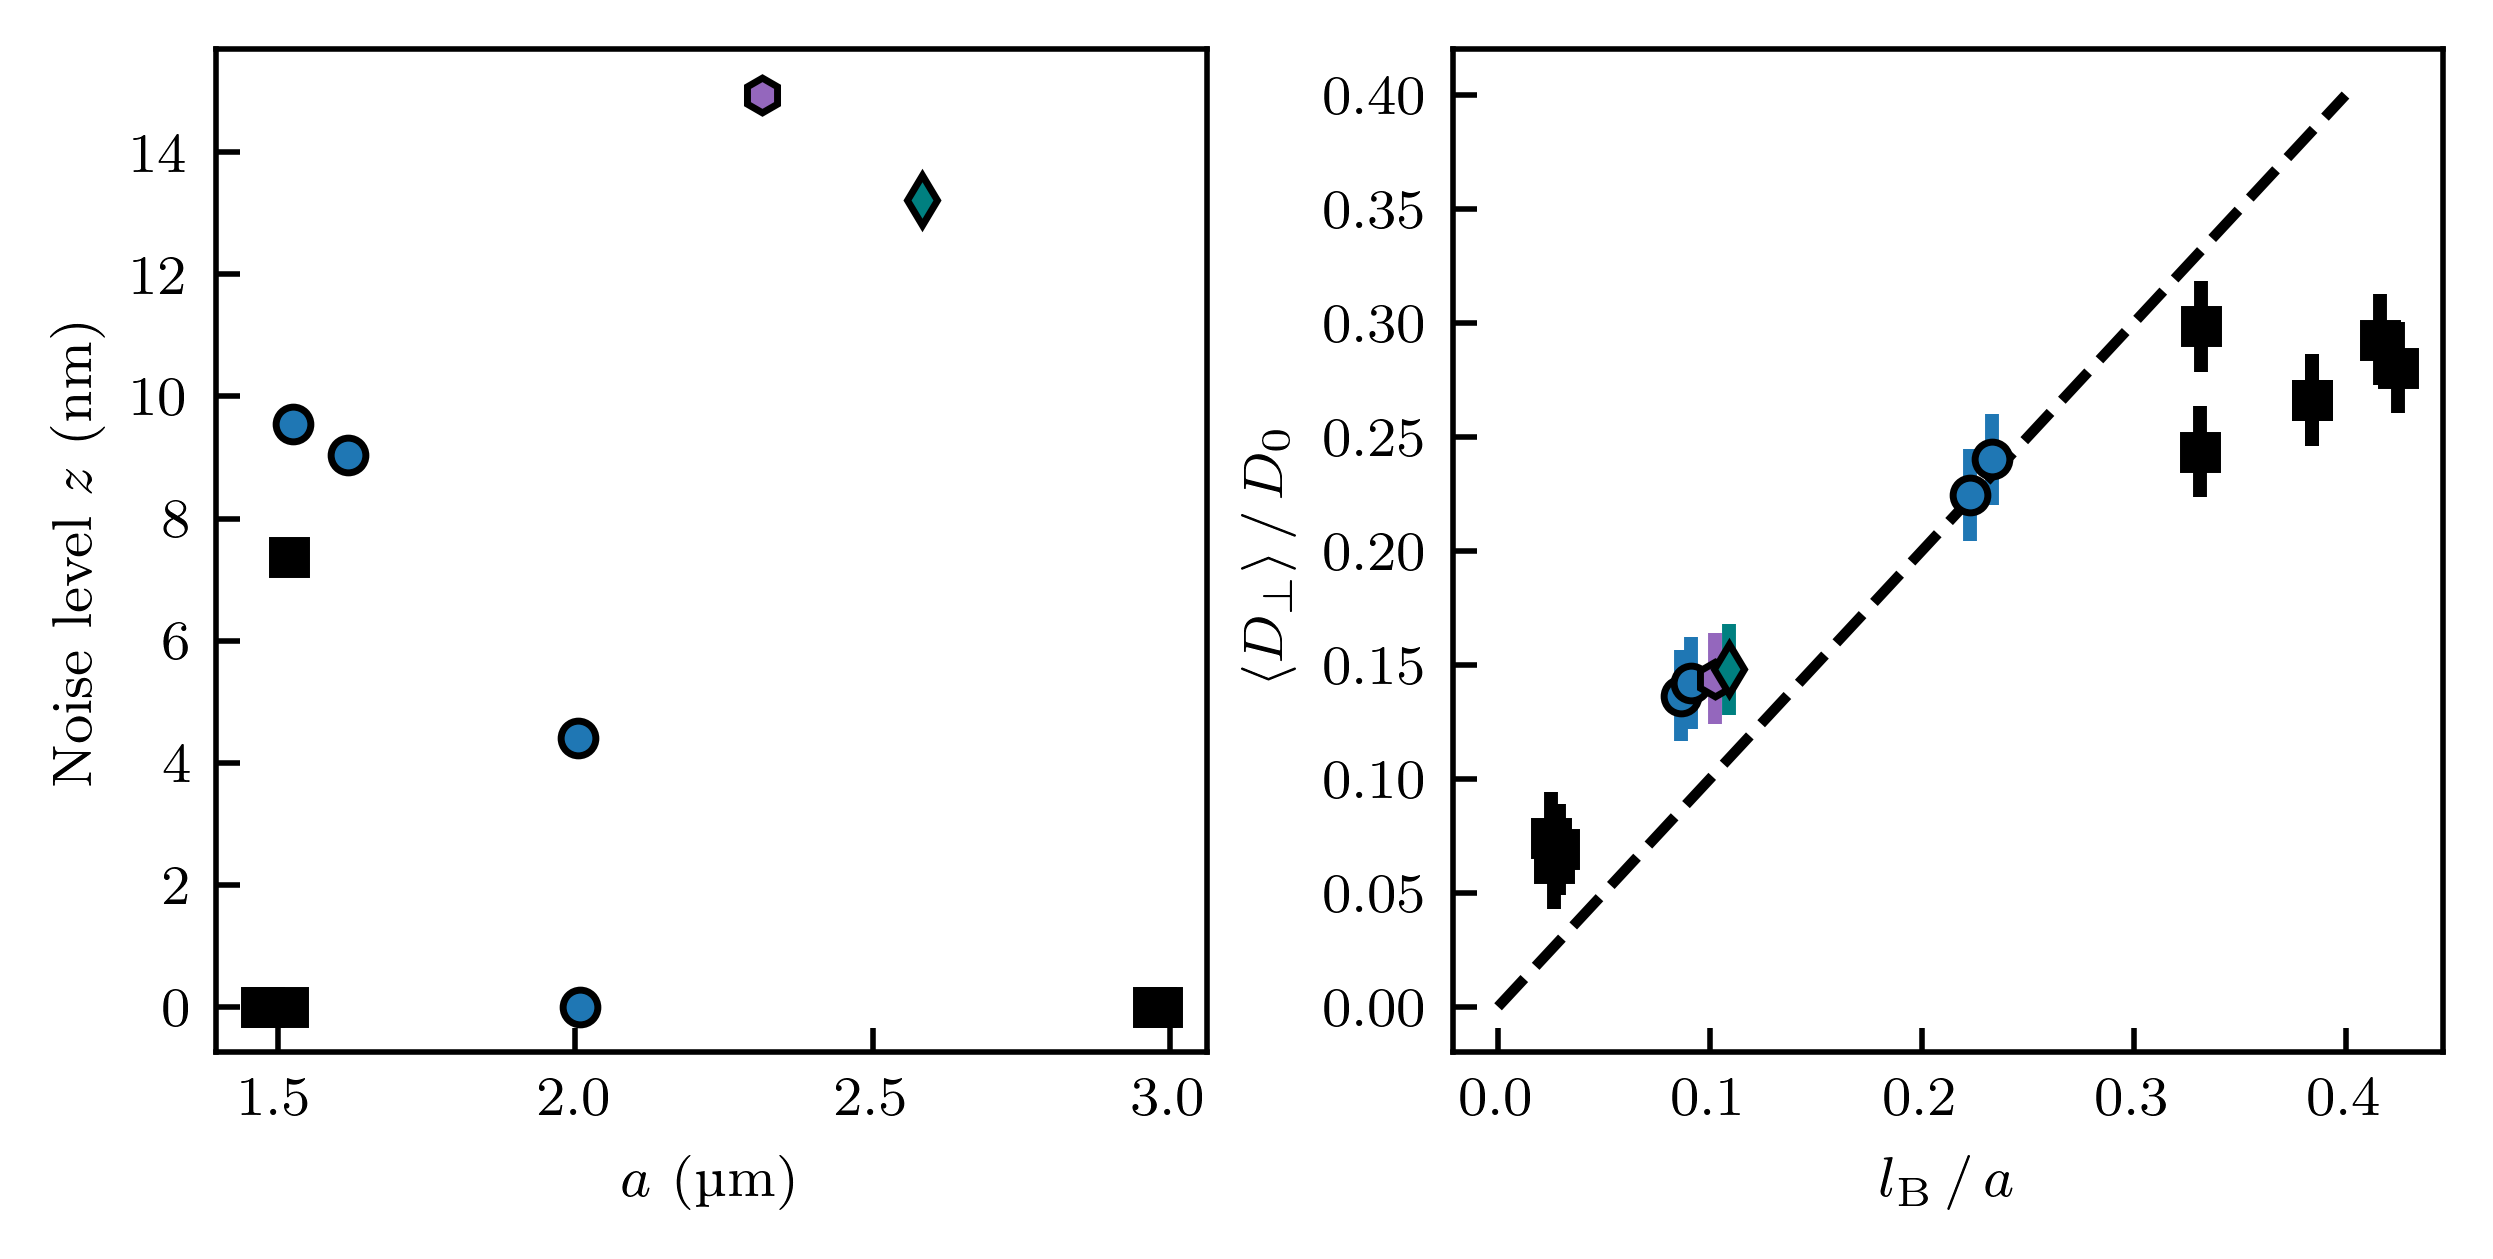

In [85]:
# Noise levels from MSD

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(13/2.54, 6.5/2.54))
fig2, [ax3, ax4] = plt.subplots(1, 2, figsize=(13/2.54, 6.5/2.54))
# ax5 = ax2.twinx()

for i, datas in enumerate([datas_rigid, datas_water, datas_wEG30, datas_wEG40]):
    a, B, lD, lB, z0, b = get_multifitted_values(datas)
    _, D0, eta_m, mean_D_perp, mean_D_para, nl_perp, nl_para = get_MSD_values(datas)
    
    drho = delta_rho(lB, a)
    
    ax1.errorbar(
        a * 1e6, lD * 1e9, yerr=0*np.ones(len(nl_perp)), 
        ls='', marker=markers[i], markersize=5, markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=1, 
        ecolor=colors[i], elinewidth=2, 
        label=labels[i], 
    )
    ax2.errorbar(
        a * 1e6, B, yerr=1*np.ones(len(B)), 
        ls='', marker=markers[i], markersize=5, markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=1, 
        ecolor=colors[i], elinewidth=2, 
        # label=labels[i], 
    )
    
    ax3.errorbar(
        a * 1e6, nl_perp * 1e9, yerr=0*np.ones(len(nl_perp)), 
        ls='', marker=markers[i], markersize=5, markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=1, 
        ecolor=colors[i], elinewidth=2, 
        # label=labels[i], 
    )
    ax4.errorbar(
        # drho ** -1 * (a) ** -4, mean_D_perp, yerr=0.02*np.ones(len(mean_D_perp)), 
        lB / a, mean_D_perp, yerr=0.02*np.ones(len(mean_D_perp)), 
        ls='', marker=markers[i], markersize=5, markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=1, 
        ecolor=colors[i], elinewidth=2, 
    )
    # ax5.errorbar(
    #     (a * 1e6) ** -1, mean_D_para, yerr=0.02*np.ones(len(mean_D_perp)), 
    #     ls='', marker=markers[i], markersize=5, markerfacecolor='w', markeredgecolor=colors[i], markeredgewidth=1, 
    #     ecolor=colors[i], elinewidth=2, 
    # )
    
radii = np.linspace(0, 3.5, 20) * 1e-6
ax2.plot(radii * 1e6, B_theory(radii), '--k', label='Linear PB ($B$)')

xx = np.linspace(0, 0.4, 20)  
ax4.plot(xx, xx, '--k')

ax1.legend(frameon=True, loc='best', handletextpad=0.2)
ax1.set(
    xlabel='$a$ (µm)', 
    ylabel='$l_\mathrm{D}$ (nm)', 
    xscale='linear', 
    yscale='linear', 
    ylim=[10, 180], 
)
ax2.legend(frameon=False, handletextpad=0.2)
ax2.set(
    xlabel='$a$ (µm)', 
    ylabel=r'$B$', 
    xscale='linear', 
    yscale='linear', 
)
ax3.set(
    xlabel='$a$ (µm)', 
    ylabel='Noise level $z$ (nm)', 
    xscale='linear', 
    yscale='linear',
)
ax4.set(
    xlabel=r'$l_\mathrm{B} \, / \, a$', 
    ylabel=r'$\langle D_\perp \rangle \, / \, D_0$', 
    xscale='linear', 
    yscale='linear', 
)
# ax5.set(
#     xlabel='$a^{-1}$ (µm$^{-1}$)', 
#     ylabel=r'$\langle D_\parallel \rangle \, / \, D_0$, open symbols', 
#     xscale='linear', 
#     yscale='linear', 
# )

fig.tight_layout()
fig2.tight_layout()

plt.show()

In [86]:
# fig.savefig("./fig_1_electrostatic_properties_droplets_AR1000.pdf")
# fig2.savefig("./fig_2_MSD_properties_droplets_AR1000.pdf")

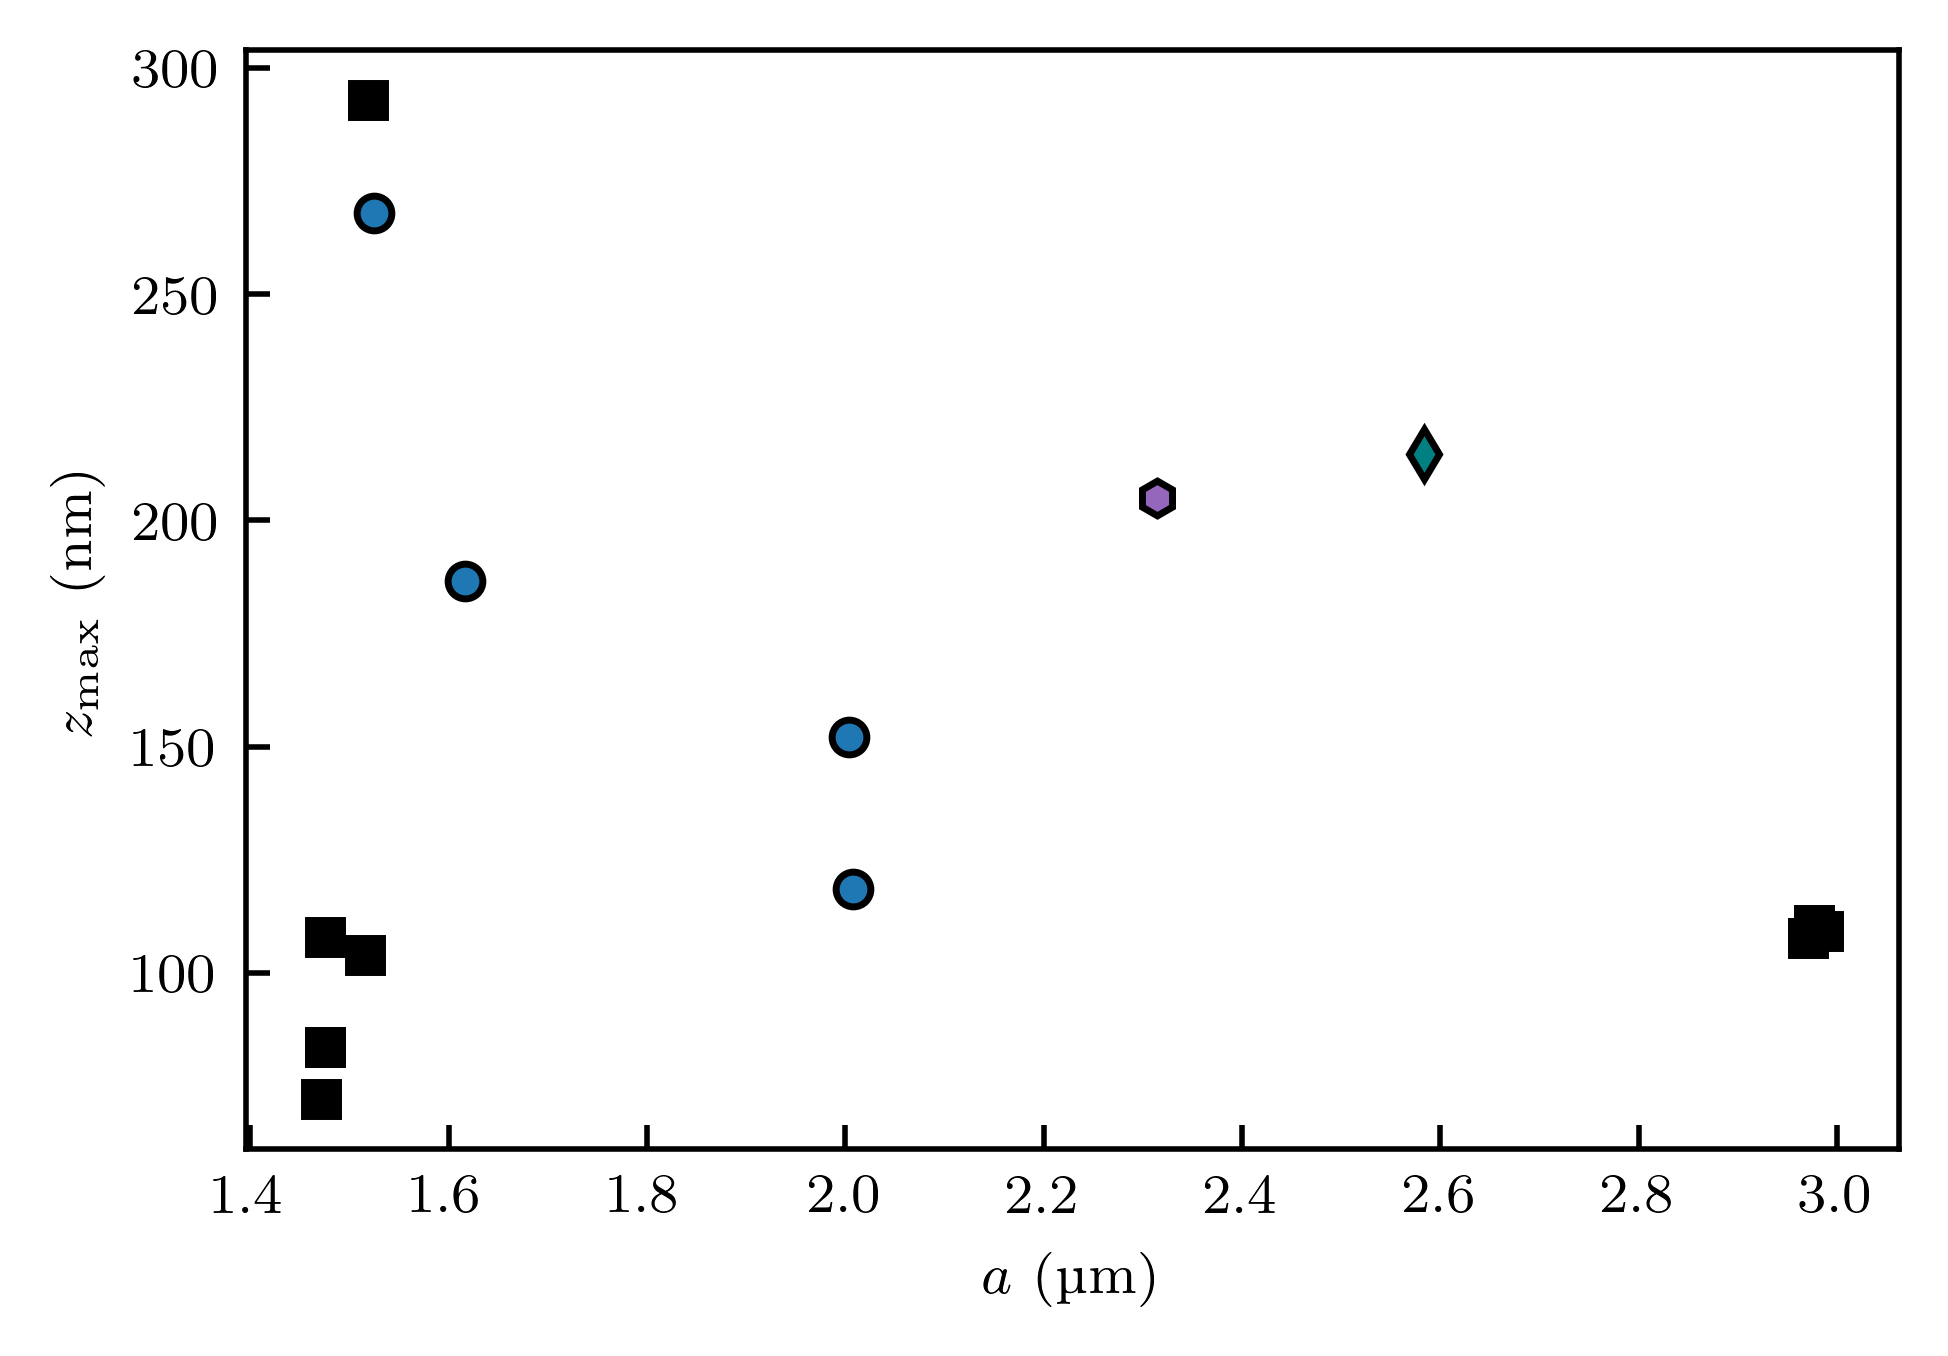

In [87]:
fig, ax1 = plt.subplots(1, 1, figsize=(10/2.54, 7/2.54))

for i, datas in enumerate([datas_rigid, datas_water, datas_wEG30, datas_wEG40]):
    a, B, lD, lB, z0, b = get_multifitted_values(datas)
    
    z_Pmax = lD * np.log(B * lB / lD)
    
    ax1.errorbar(
        a * 1e6, z_Pmax * 1e9, yerr=0*np.ones(len(a)), 
        ls='', marker=markers[i], markersize=5, markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=1, 
        ecolor=colors[i], elinewidth=2, 
        label=labels[i], 
    )

# ax1.legend(frameon=True, loc='best', handletextpad=0.2)
ax1.set(
    xlabel='$a$ (µm)', 
    ylabel='$z_\mathrm{max}$ (nm)', 
    xscale='linear', 
    yscale='linear', 
    # ylim=[10, 180], 
)

plt.tight_layout()
plt.show()

In [88]:
# fig.savefig()

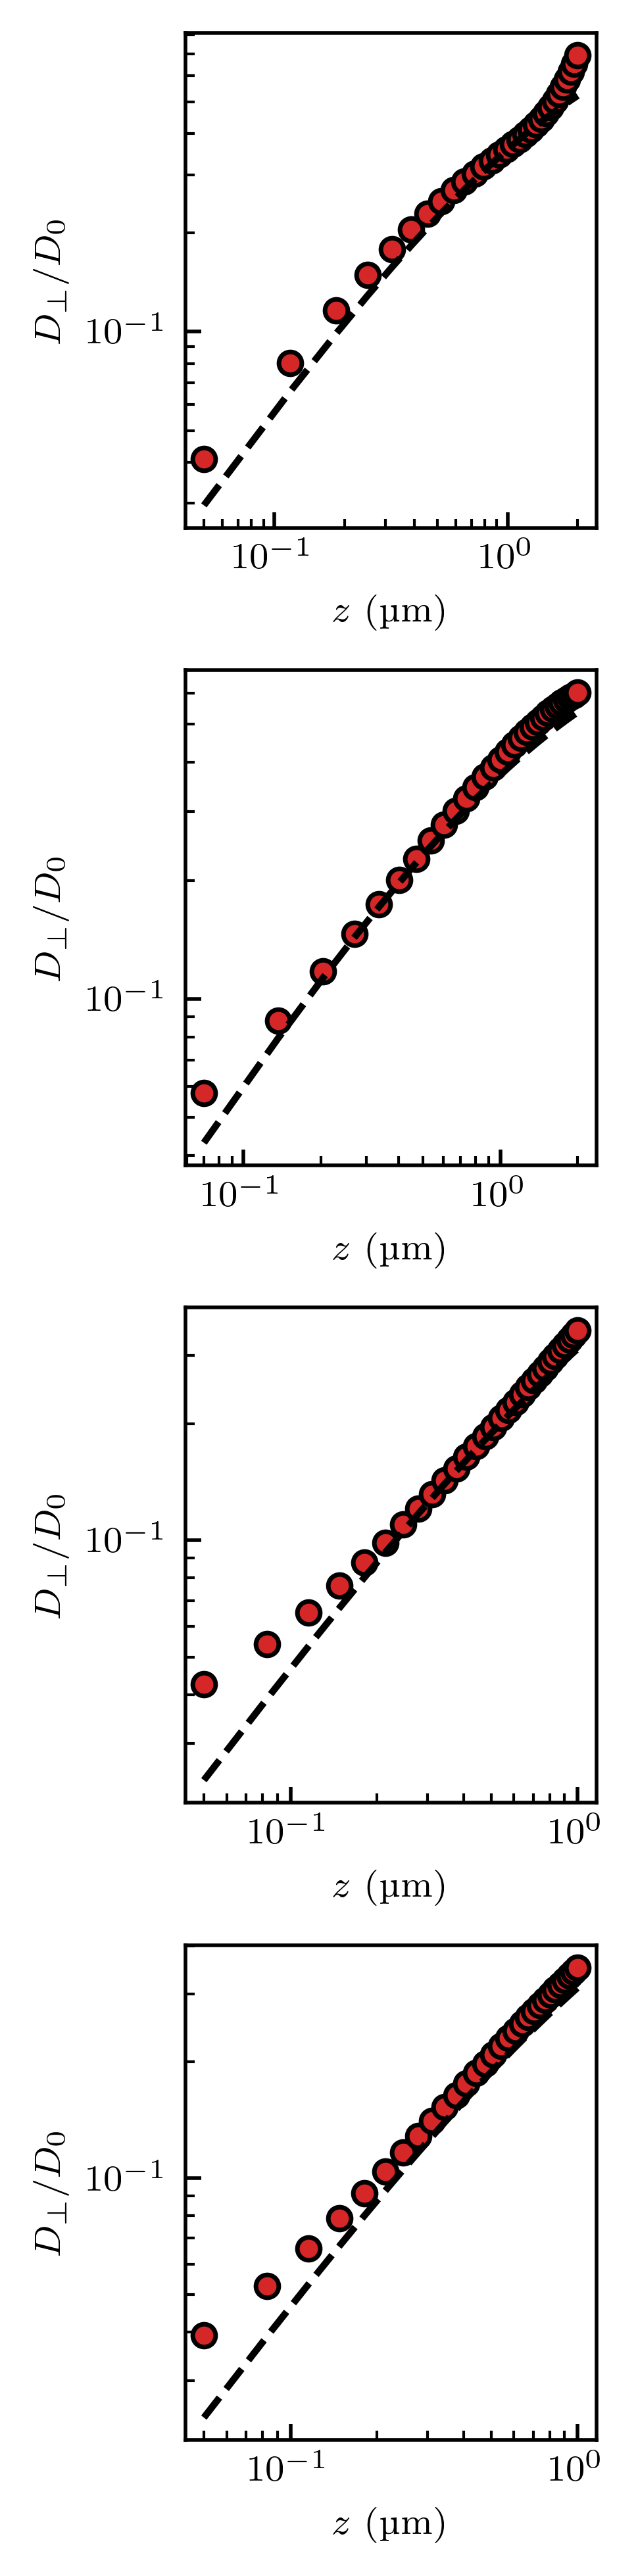

In [89]:
# Diffusion profile

datas = datas_water

nlin, ncol = len(datas), 1

fig, axes = plt.subplots(nlin, ncol, figsize=(5/2.54, nlin*5/2.54))

for i, data in enumerate(datas):
    
    z_D = data['z_D']
    D_perp_z = data['D_perp_z']
    
    r = data['r'] # Update r in Dperp_z
    
    D_perp_z_th = Dperp_z(z_D, b=0, z0=0, nl=0)

    axes[i].plot(z_D * 1e6, D_perp_z, 'o', markerfacecolor='tab:red', markersize=5)
    axes[i].plot(z_D * 1e6, D_perp_z_th, '--', color='k')

    axes[i].set(
        xlabel='$z$ (µm)',
        ylabel=r'$D_\perp / D_0$', 
        xscale='log', 
        yscale='log', 
    )

plt.tight_layout()
plt.show()

# Plots of Forces (Several Trajectories, Several Experimental Conditions)

In [90]:
def get_raw_Fnc(datas, zmin, plot=True, marker=None, color=None, label=None, ax=None, normalize=False):
    if plot:
        markers = [marker] * len(datas)
        if ( type(color) == str ) or ( color == None ):
            colors = [color] * len(datas)
        else:
            colors = color
        if ( type(label) == str ) or ( label == None ):
            labels = [label] + [''] * (len(datas) - 1)
        else: 
            labels = label
        
    for i, data in enumerate(datas):
        a = data['r']
        
        x_F_nc = data['x_F_nc']
        y_F_nc = data['y_F_nc']
        z0 = data['fitted_z0']

        # x_F_nc = x_F_nc + z0 

        y_F_nc = y_F_nc[x_F_nc >= zmin]
        x_F_nc = x_F_nc[x_F_nc >= zmin]
        
        # print(data['r'], data['fitted_lD'])
        
        B, lD, lB = data['fitted_B'], data['fitted_lD'], data['fitted_lB']
        z_Pmax = lD * np.log(B * lB / lD)
        
        if plot:
            if not(normalize):
                ax.plot(
                    x_F_nc * 1e6, y_F_nc * 1e15, 
                    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
                    label=np.round(a*1e6, 2), # labels[i], 
                )
            else:
                ax.plot(
                    x_F_nc / z_Pmax, y_F_nc * 1e15, 
                    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
                    label=labels[i], 
                )

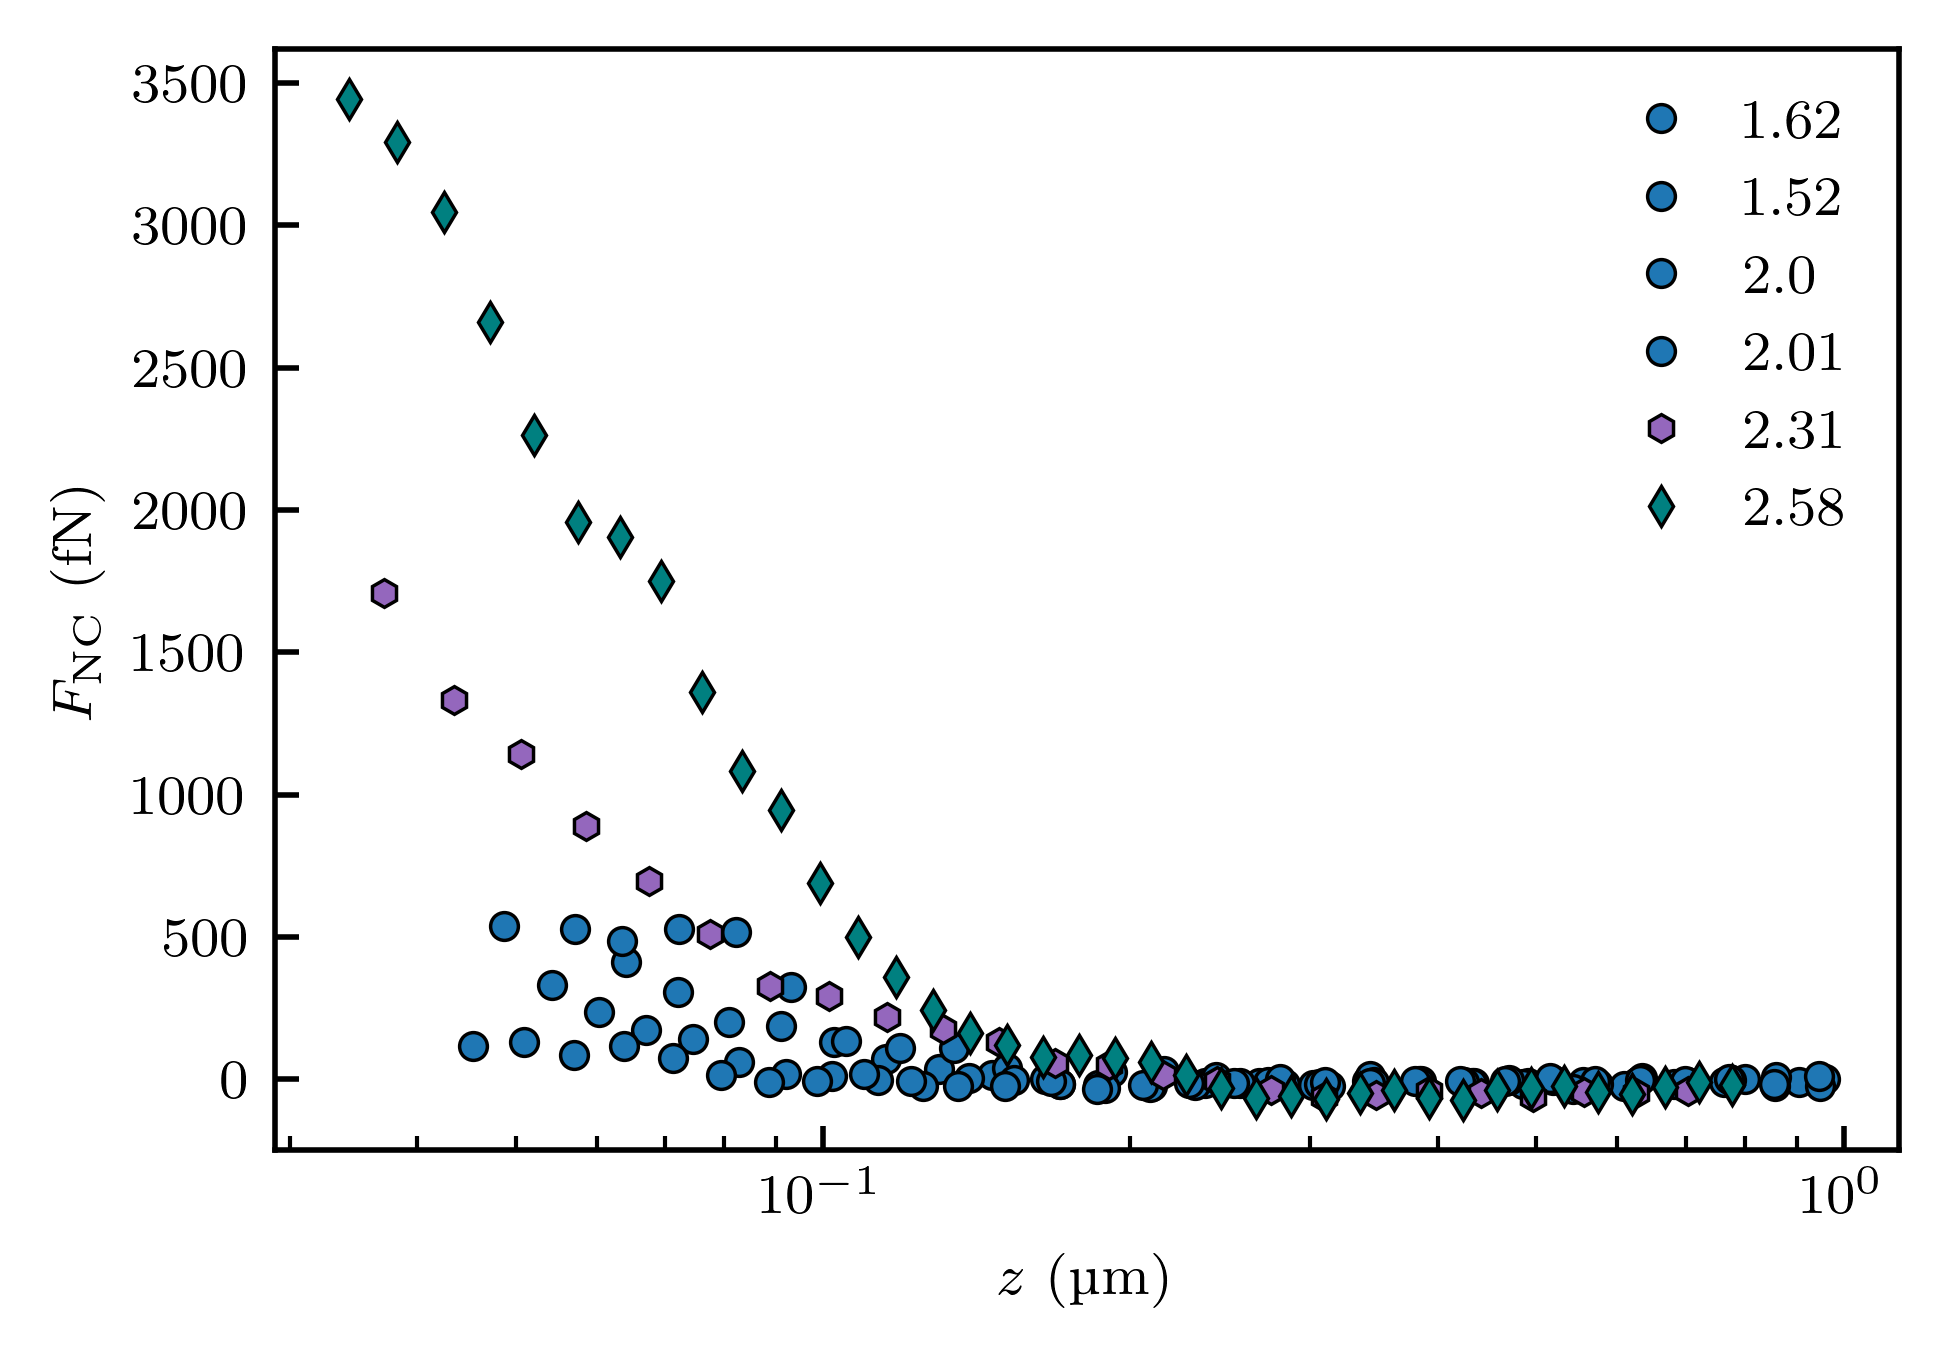

In [91]:
fig, ax1 = plt.subplots(1, 1, figsize=(10/2.54, 7/2.54))

zmin = -1e-6

normalize = False

# get_raw_Fnc(datas_rigid, zmin, plot=True, marker=markers[0], color=colors[0], label='Rigid', ax=ax1, normalize=normalize)
get_raw_Fnc(datas_water, zmin, plot=True, marker=markers[1], color=colors[1], label='Oil in water', ax=ax1, normalize=normalize)
get_raw_Fnc(datas_wEG30, zmin, plot=True, marker=markers[2], color=colors[2], label='Oil in water + EG (w30)', ax=ax1, normalize=normalize)
get_raw_Fnc(datas_wEG40, zmin, plot=True, marker=markers[3], color=colors[3], label='Oil in water + EG (w40)', ax=ax1, normalize=normalize)

ax1.legend(frameon=False, handletextpad=0.5)
ax1.set(
    xlabel='$z$ (µm)', 
    ylabel='$F_\mathrm{NC}$ (fN)', 
    xscale='log', 
    yscale='linear', 
)

plt.tight_layout()
plt.show()

In [92]:
# fig.savefig('fig_raw_Fnc_oil_droplets.pdf')

In [93]:
def sort_and_assemble_forces(datas, zmin, zmax, nbins, zspace='log', base=2):
    
    if len(datas) == 1:
        data = datas[0]
        zz = data['x_F_nc']
        dzz = ( zz[1:] - zz[:-1] ) / 2
        FF = data['y_F_nc']
        dFF = np.zeros(len(zz)) #data['err_F_tot']
        # Same length as error dzz
        zz = zz[:-1]
        FF = FF[:-1]
        dFF = dFF[:-1]
        # Restrict the z-domain
        dzz = dzz[(zmin <= zz) & (zz < zmax)]
        FF = FF[(zmin <= zz) & (zz < zmax)]
        dFF = dFF[(zmin <= zz) & (zz < zmax)]
        zz = zz[(zmin <= zz) & (zz < zmax)]
        return zz, dzz, FF, dFF
    
    if zspace == 'log':
        zz = np.logspace(
            np.log(zmin) / np.log(base), 
            np.log(zmax) / np.log(base), 
            nbins+1, 
            base=base,
        )
        # bins edges
    else:
        zz = np.linspace(zmin, zmax, nbins+1)

    ff = [[] for i in range(nbins)]

    FF = np.zeros((nbins))
    dFF = np.zeros((nbins))

    for i, data in enumerate(datas):

        x_F_nc = data['x_F_nc']
        y_F_nc = data['y_F_nc']

        z0 = data['fitted_z0']

        # x_F_nc = x_F_nc + z0 
        
        # x_F_err_th = data['x_F_err_th']
        # y_F_err_th = data['y_F_err_th']

        y_F_nc = y_F_nc[x_F_nc >= zmin] # /!\ Start with y, before modifying x
        x_F_nc = x_F_nc[x_F_nc >= zmin]
        # y_F_err_th = y_F_err_th[x_F_err_th >= zmin]
        # x_F_err_th = x_F_err_th[x_F_err_th >= zmin]
        
        for k in range(nbins):
            f_temp = y_F_nc[(zz[k] <= x_F_nc) & (x_F_nc < zz[k+1])]
            for f in f_temp:
                ff[k].append(f)
    
    # Array
    size = max([len(ff[k]) for k in range(nbins)])
    fff = np.ones((nbins, size)) * np.nan
    for k in range(nbins):
        fff[k,:len(ff[k])] = np.array(ff[k])

    del ff 

    FF = np.nanmean(fff, axis=1)
    dFF = np.nanstd(fff, axis=1)
    
    dzz = (zz[1:] - zz[:-1]) / 2
    zz = (zz[1:] + zz[:-1]) / 2
    
    return zz, dzz, FF, dFF

In [94]:
# Sort and assemble experiments 

zmin = 50e-9
zmax = 0.2e-6
nbins = 10

zz, dzz, FF_PS, dFF_PS = sort_and_assemble_forces(datas_rigid, zmin, zmax, nbins)
_, _, FF_oil_water, dFF_oil_water = sort_and_assemble_forces(datas_water, zmin, zmax, nbins)
zz_oil_waterEG30, dzz_oil_waterEG30, FF_oil_waterEG30, dFF_oil_waterEG30 = sort_and_assemble_forces(datas_wEG30, zmin, zmax, nbins)
zz_oil_waterEG40, dzz_oil_waterEG40, FF_oil_waterEG40, dFF_oil_waterEG40 = sort_and_assemble_forces(datas_wEG40, zmin, zmax, nbins)

# zz_oil_waterEG40, dzz_oil_waterEG40, FF_oil_waterEG40, dFF_oil_waterEG40 = datas_wEG40[0]['x_F_nc'], np.zeros(len(datas_wEG40[0]['x_F_nc'])), datas_wEG40[0]['y_F_nc'], np.zeros(len(datas_wEG40[0]['x_F_nc']))

In [95]:
def smooth(x, y):
    xx = x[~np.isnan(y)]
    yy = y[~np.isnan(y)]
    s = interpolate.InterpolatedUnivariateSpline(xx, yy)
    ys = s(xx)
    return xx, ys

In [96]:
zz_smoothed_PS, FFsmoothed_PS = smooth(zz, FF_PS)
zz_smoothed_oil_water, FFsmoothed_oil_water = smooth(zz, FF_oil_water)
zz_smoothed_oil_waterEG30, FFsmoothed_oil_waterEG30 = smooth(zz_oil_waterEG30, FF_oil_waterEG30)
zz_smoothed_oil_waterEG40, FFsmoothed_oil_waterEG40 = smooth(zz_oil_waterEG40, FF_oil_waterEG40)

In [97]:
### ------------------------------------------------------------------------
# Estimate error bars, independently of the number of experiments performed. 
### ------------------------------------------------------------------------

# data = datas_wEG40[0]

# delta = data['noise_level_perp_from_MSD']
# print('Noise level z = {:.2f} nm'.format(delta * 1e9))

# fps = data['fps']
# z_dedrift = data['z_dedrift']

# x_F_tot = data['x_F_tot']
# y_F_tot = data['y_F_tot']

# x_F_err_th = data['x_F_err_th']
# y_F_err_th = data['y_F_err_th']

# print(len(x_F_err_th))

# bins_edges = np.concatenate(
#     (
#         data['x_pdf_z'] - data['width_pdf_z'] / 2, 
#         np.array([data['x_pdf_z'][-1] + data['width_pdf_z'][-1] / 2]), 
#     )
# )
# # /!\ bins_edges may not correspond to x_F_tot. TO BE CHECKED

# # Compute drifts (or could get them back from all the forces saved in data)
# vz, _ = co.vzz(
#         bins_edges, z_dedrift, 
#         times=np.arange(1,2), 
#         fps=fps, 
#     )

# print(len(vz))

# print(len(y_F_tot))

# # Error on the force 
# err_F = y_F_err_th[data['x_pdf_z'] <= data['z_D_max'] - data['fitted_z0']] + 2 * delta * y_F_tot / vz[data['x_pdf_z'] <= data['z_D_max'] - data['fitted_z0']]




# THIS NEED TO BE BETTER CODED, SO THAT SIZES MATCH! 
# For that, add x_F_err_th in the force-binning process.
# Then estimate the drifts from total forces and diffusion coefficients
# Compute the above-mentionned drifts for each trajectories, then average? 
# Let's think again.

In [98]:
### ------------------------------------------------------------------------
# Estimate error bars, independently of the number of experiments performed. 
### ------------------------------------------------------------------------

def binning(x, y, bins_edges):
    
    nbins = len(bins_edges) - 1
    x_binned = (bins_edges[1:] + bins_edges[:-1]) / 2
    y_binned = np.zeros(nbins)
    
    yy = [[] for i in range(nbins)] # Will contain all the y values before averaging. 
    
    for k in range(nbins):
            y_temp = y[(bins_edges[k] <= x) & (x < bins_edges[k+1])]
            for value in y_temp:
                yy[k].append(value)
                
    for k in range(nbins):
        y_binned[k] = np.nanmean(np.array(yy[k]))
    
    return x_binned, y_binned

def theoretical_error_bar_F(data, bins_edges):
    
    delta = data['noise_level_perp_from_MSD']
    print('Noise level z = {:.2f} nm'.format(delta * 1e9))

    fps = data['fps']
    z_dedrift = data['z_dedrift']

    x_F_tot = data['x_F_tot']
    y_F_tot = data['y_F_tot']
    _, F_tot = binning(x_F_tot, y_F_tot, bins_edges=bins_edges)
    
    x_F_err_th = data['x_F_err_th']
    y_F_err_th = data['y_F_err_th']
    _, F_err_th = binning(x_F_err_th, y_F_err_th, bins_edges=bins_edges)
    
    # Compute drifts (or could get them back from all the forces saved in data)
    # vz, _ = co.vzz(
    #         bins_edges, z_dedrift, 
    #         times=np.arange(1,2), 
    #         fps=fps, 
    #     )
    # /!\
    # Due to this independent (from previous analysis) binning, 
    # bins_edges may not correspond to x_F_tot. 
    # Is it a real problem for the error-bar estimation? 
    # /!\
    
    bins_centers = (bins_edges[1:] + bins_edges[:-1]) / 2

    # Error on the force 
    err_F = F_err_th + 2 * delta / bins_centers * F_tot 

    return err_F

In [99]:
def create_bins_edges(bins_centers, bins_half_widths):
    zz = bins_centers
    dzz = bins_half_widths
    bins_edges = np.concatenate((zz - dzz, np.array([zz[-1] + dzz[-1]])))
    return bins_edges

In [100]:
# bins_edges = np.concatenate((zz - dzz, np.array([zz[-1] + dzz[-1]]))) # To match previously defined bins
bins_edges = create_bins_edges(zz, dzz) # To match previously defined bins
bins_edges_waterEG30 = create_bins_edges(zz_oil_waterEG30, dzz_oil_waterEG30)
bins_edges_waterEG40 = create_bins_edges(zz_oil_waterEG40, dzz_oil_waterEG40)

err_F_PS_water = theoretical_error_bar_F(datas_rigid[0], bins_edges=bins_edges)
err_F_oil_water = theoretical_error_bar_F(datas_water[0], bins_edges=bins_edges)
err_F_oil_waterEG30 = theoretical_error_bar_F(datas_wEG30[0], bins_edges=bins_edges_waterEG30)
err_F_oil_waterEG40 = theoretical_error_bar_F(datas_wEG40[0], bins_edges=bins_edges_waterEG40)

Noise level z = -0.00 nm
Noise level z = 9.04 nm
Noise level z = 14.94 nm
Noise level z = 13.22 nm


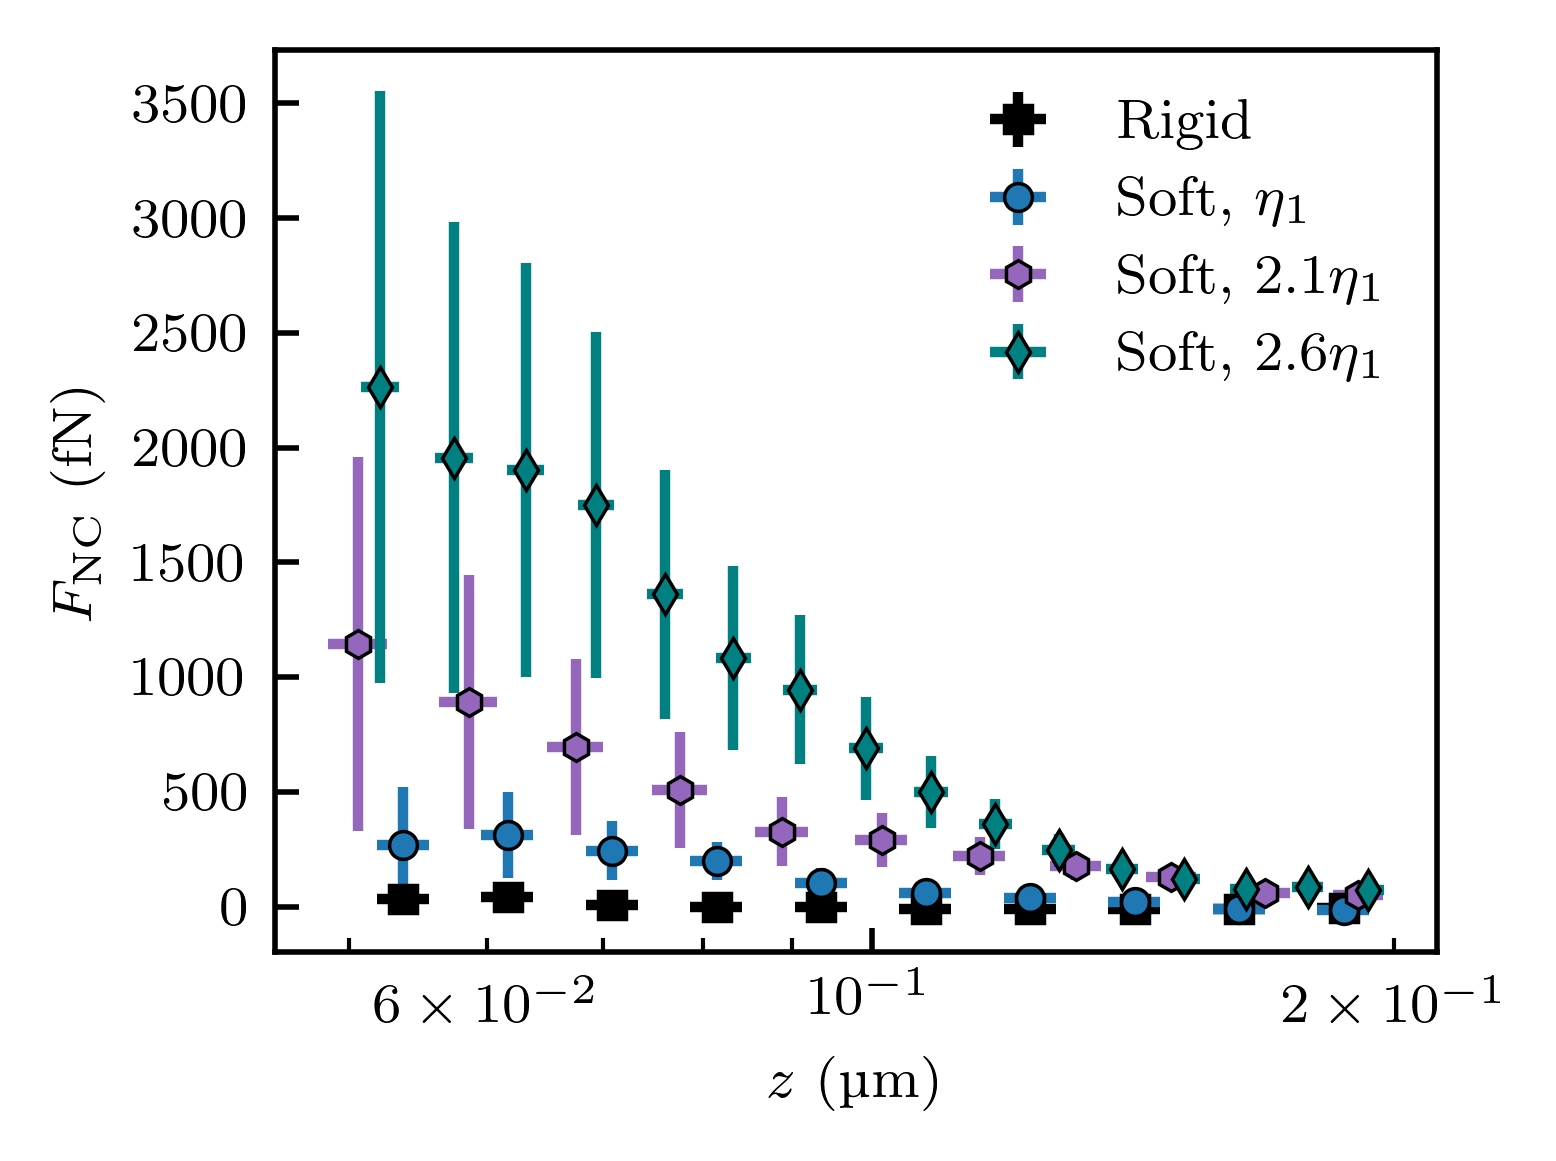

In [101]:
# Non-conservative force: made pretty, with error bars from theoretical expectations and MSD noise level

fig, ax1 = plt.subplots(1, 1, figsize=(8/2.54, 6/2.54))

i = 0
ax1.errorbar(
    zz * 1e6, FF_PS * 1e15, yerr = err_F_PS_water * 1e15, xerr = dzz / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label='Rigid', 
)

i = 1
ax1.errorbar(
    zz * 1e6, FF_oil_water * 1e15, yerr = err_F_oil_water * 1e15, xerr = dzz / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'Soft, $\eta_1$', 
)

i = 2
ax1.errorbar(
    zz_oil_waterEG30 * 1e6, FF_oil_waterEG30 * 1e15, yerr = err_F_oil_waterEG30 * 1e15, xerr = dzz_oil_waterEG30 / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'Soft, 2.1$\eta_1$', 
)

i = 3
ax1.errorbar(
    zz_oil_waterEG40 * 1e6, FF_oil_waterEG40 * 1e15, yerr = err_F_oil_waterEG40 * 1e15, xerr = dzz_oil_waterEG40 / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'Soft, 2.6$\eta_1$', 
)

ax1.legend(frameon=False)
ax1.set(
    xlabel='$z$ (µm)', 
    ylabel='$F_\mathrm{NC}$ (fN)', 
    xscale='log', 
    yscale='linear', 
    # xlim=[0.2, None], 
    # ylim=[-300, 100],
)

plt.tight_layout()
plt.show()

In [102]:
# fig.savefig("./fig_F_NC_theoretical_error_bar_oil_droplets_AR1000_3_liquids.pdf")

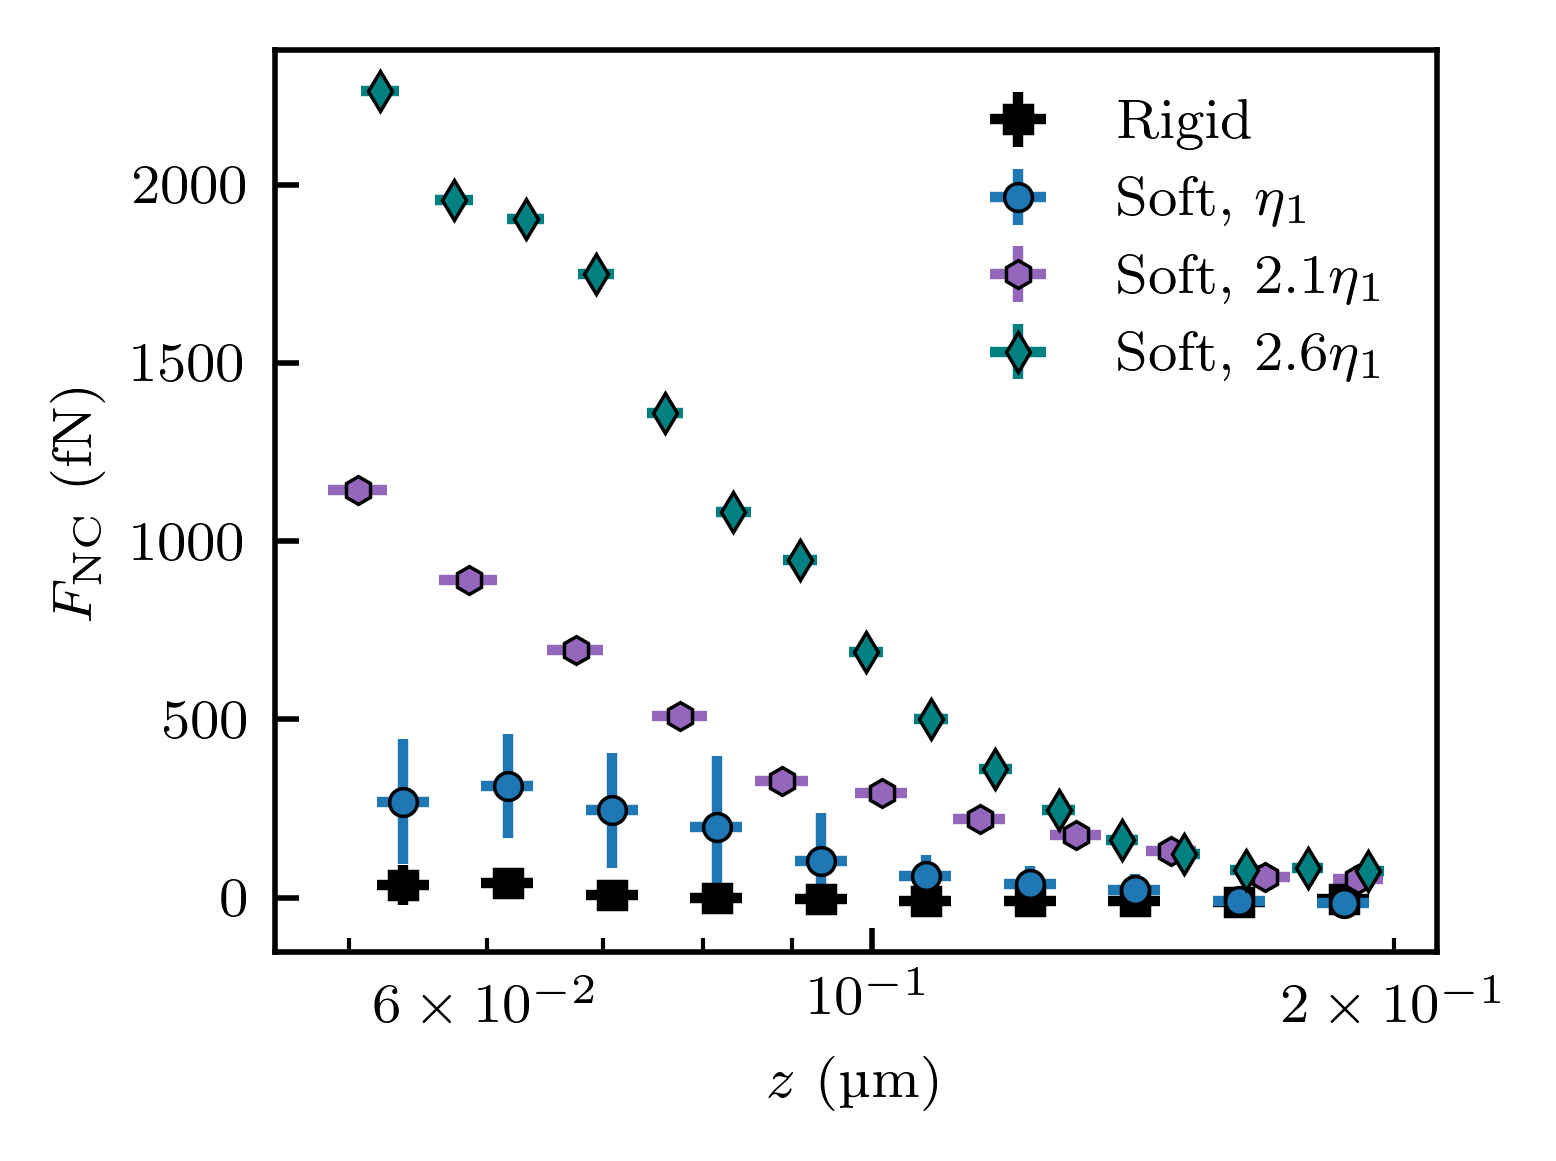

In [103]:
# Non-conservative force: made pretty with statistical error bars

fig, ax1 = plt.subplots(1, 1, figsize=(8/2.54, 6/2.54))

i = 0
ax1.errorbar(
    zz * 1e6, FF_PS * 1e15, yerr = dFF_PS * 1e15, xerr = dzz / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label='Rigid', 
)

i = 1
ax1.errorbar(
    zz * 1e6, FF_oil_water * 1e15, yerr = dFF_oil_water * 1e15, xerr = dzz / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'Soft, $\eta_1$', 
)

i = 2
ax1.errorbar(
    zz_oil_waterEG30 * 1e6, FF_oil_waterEG30 * 1e15, yerr = dFF_oil_waterEG30 * 1e15, xerr = dzz_oil_waterEG30 / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'Soft, 2.1$\eta_1$', 
)

i = 3
ax1.errorbar(
    zz_oil_waterEG40 * 1e6, FF_oil_waterEG40 * 1e15, yerr = dFF_oil_waterEG40 * 1e15, xerr = dzz_oil_waterEG40 / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'Soft, 2.6$\eta_1$', 
)

ax1.legend(frameon=False)
ax1.set(
    xlabel='$z$ (µm)', 
    ylabel='$F_\mathrm{NC}$ (fN)', 
    xscale='log', 
    yscale='linear', 
    # xlim=[0.2, None], 
    # ylim=[-300, 100],
)

plt.tight_layout()
plt.show()

In [104]:
# fig.savefig("./fig_F_NC_oil_droplets_AR1000_3_liquids.pdf")

In [105]:
def v2_thermal(a, rho, kT):
    m = 4/3 * np.pi * a**3 * rho
    return kT / m

def F1_z(z, E=10e3, eta=0.001, a=1.5e-6, rho=1050, kT=4e-21):
    vz = np.sqrt(v2_thermal(a, rho, kT))
    return - 6 * np.pi * eta * a**2 / z * vz

def F2_z(z, E=10e3, eta=0.001, a=1.5e-6, rho=1050, kT=4e-21):
    vx = np.sqrt(2 * v2_thermal(a, rho, kT))
    return 0.416 * (eta**2 * vx**2) / (E / 3) * (a / z)**(5/2)

def F3_z(z, E=10e3, eta=0.001, a=1.5e-6, rho=1050, kT=4e-21):
    vz = np.sqrt(v2_thermal(a, rho, kT))
    return - 41.912 * (eta**2 * vz ** 2) / (E / 3) * (a / z)**(7/2)

def F4_z(z, az, E=10e3, eta=0.001, a=1.5e-6, rho=1050):
    return 18.499 * (eta**2 * az * a) / (E / 3) * (a / z)**(5/2)

In [106]:
def F_test(z, gamma=10e-3, eta=0.001, rho=1050, kT=4e-21):
    prefactor = 1.248 / (4/3*np.pi*np.sqrt(2)) * 2 * 2
    return prefactor * (eta ** 2 * kT) / (gamma * rho) * 1 / z ** 2

In [107]:
gamma = 8e-3

F_theory_1 = F_test(zz, gamma, eta=0.001, rho=1070) 
F_theory_2 = F_test(zz, gamma, eta=0.0021, rho=1070)
F_theory_3 = F_test(zz, gamma, eta=0.0028, rho=1070)

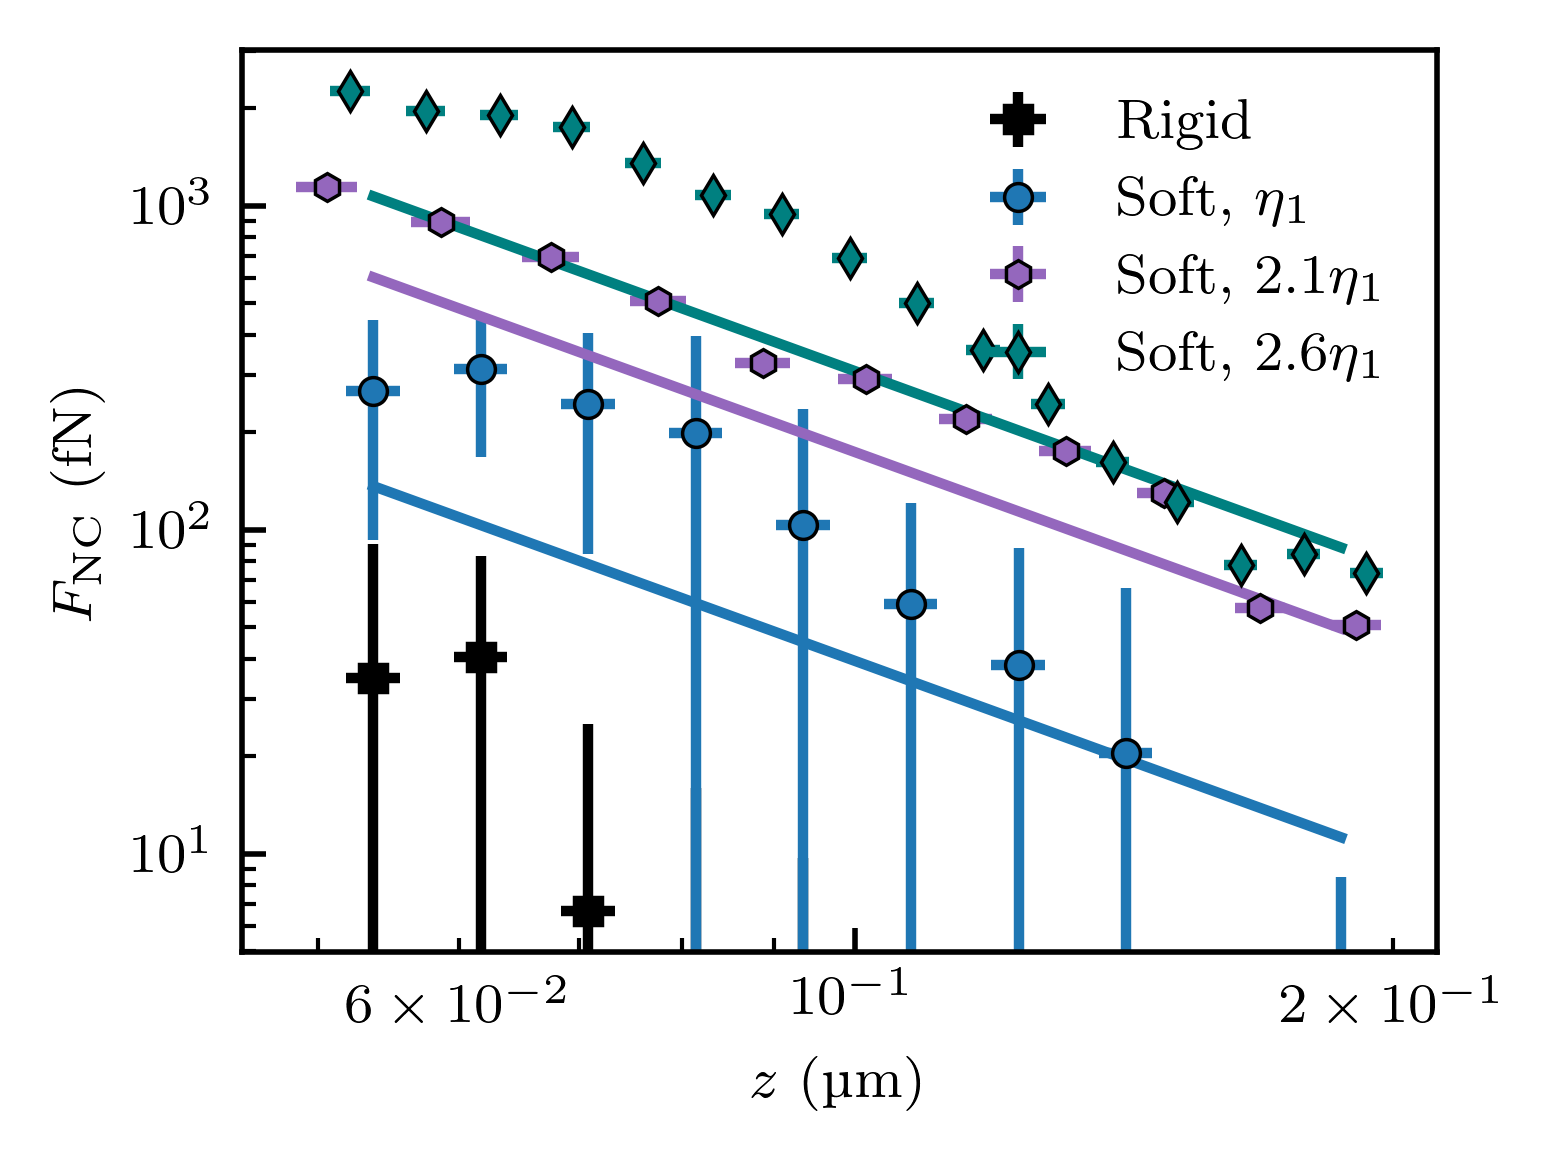

In [108]:
fig, ax1 = plt.subplots(1, 1, figsize=(8/2.54, 6/2.54))

i = 0
ax1.errorbar(
    zz * 1e6, FF_PS * 1e15, yerr = dFF_PS * 1e15, xerr = dzz / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label='Rigid', 
)

i = 1
ax1.errorbar(
    zz * 1e6, FF_oil_water * 1e15, yerr = dFF_oil_water * 1e15, xerr = dzz / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'Soft, $\eta_1$', 
)
ax1.plot(zz * 1e6, F_theory_1 * 1e15, c=colors[i])

i = 2
ax1.errorbar(
    zz_oil_waterEG30 * 1e6, FF_oil_waterEG30 * 1e15, yerr = dFF_oil_waterEG30 * 1e15, xerr = dzz_oil_waterEG30 / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'Soft, $2.1\eta_1$', 
)
ax1.plot(zz * 1e6, F_theory_2 * 1e15, c=colors[i])

i = 3
ax1.errorbar(
    zz_oil_waterEG40 * 1e6, FF_oil_waterEG40 * 1e15, yerr = dFF_oil_waterEG40 * 1e15, xerr = dzz_oil_waterEG40 / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'Soft, $2.6\eta_1$', 
)
ax1.plot(zz * 1e6, F_theory_3 * 1e15, c=colors[i])


ax1.legend(frameon=False)
ax1.set(
    xlabel='$z$ (µm)', 
    ylabel='$F_\mathrm{NC}$ (fN)', 
    xscale='log', 
    yscale='log',
    # xlim=[None, 3e-1], 
    # ylim=[10, 3000], 
)

plt.tight_layout()
plt.show()

In [109]:
# fig.savefig('fig_loglog_F_NC_oil_droplets_AR1000.pdf')

In [110]:
# Rescale forces

In [111]:
def rescale_force(F, eta_m, rho_p, a=2e-6, gamma=8e-3, kT=4e-21):
    return F / eta_m ** 2 / kT * gamma * rho_p * a ** 2

In [112]:
a_oil_water = 2e-6
a_oil_waterEG30 = datas_wEG30[0]['r']
a_oil_waterEG40 = datas_wEG40[0]['r']

In [113]:
FR_PS = rescale_force(FF_PS, eta_m=0.001, rho_p=1050, gamma=8e-3)
FR_oil_water = rescale_force(FF_oil_water, eta_m=0.001, a=a_oil_water, rho_p=1070)
FR_oil_waterEG30 = rescale_force(FF_oil_waterEG30, eta_m=0.0021, a=a_oil_waterEG30, rho_p=1070)
FR_oil_waterEG40 = rescale_force(FF_oil_waterEG40, eta_m=0.0026, a=a_oil_waterEG40, rho_p=1070)

In [114]:
# err_F_PS_water = theoretical_error_bar_F(datas_rigid[0], bins_edges=bins_edges)
# err_F_oil_water = theoretical_error_bar_F(datas_water[0], bins_edges=bins_edges)
# err_F_oil_waterEG30 = theoretical_error_bar_F(datas_wEG30[0], bins_edges=bins_edges_waterEG30)
# err_F_oil_waterEG40 = theoretical_error_bar_F(datas_wEG40[0], bins_edges=bins_edges_waterEG40)

In [115]:
err_FR_PS_water = rescale_force(err_F_PS_water, eta_m=0.001, rho_p=1050, gamma=10000e-3)
err_FR_oil_water = rescale_force(err_F_oil_water, eta_m=0.001, a=a_oil_water, rho_p=1070)
err_FR_oil_waterEG30 = rescale_force(err_F_oil_waterEG30, eta_m=0.0021, a=a_oil_waterEG30, rho_p=1070)
err_FR_oil_waterEG40 = rescale_force(err_F_oil_waterEG40, eta_m=0.0026, a=a_oil_waterEG40, rho_p=1070)

In [116]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

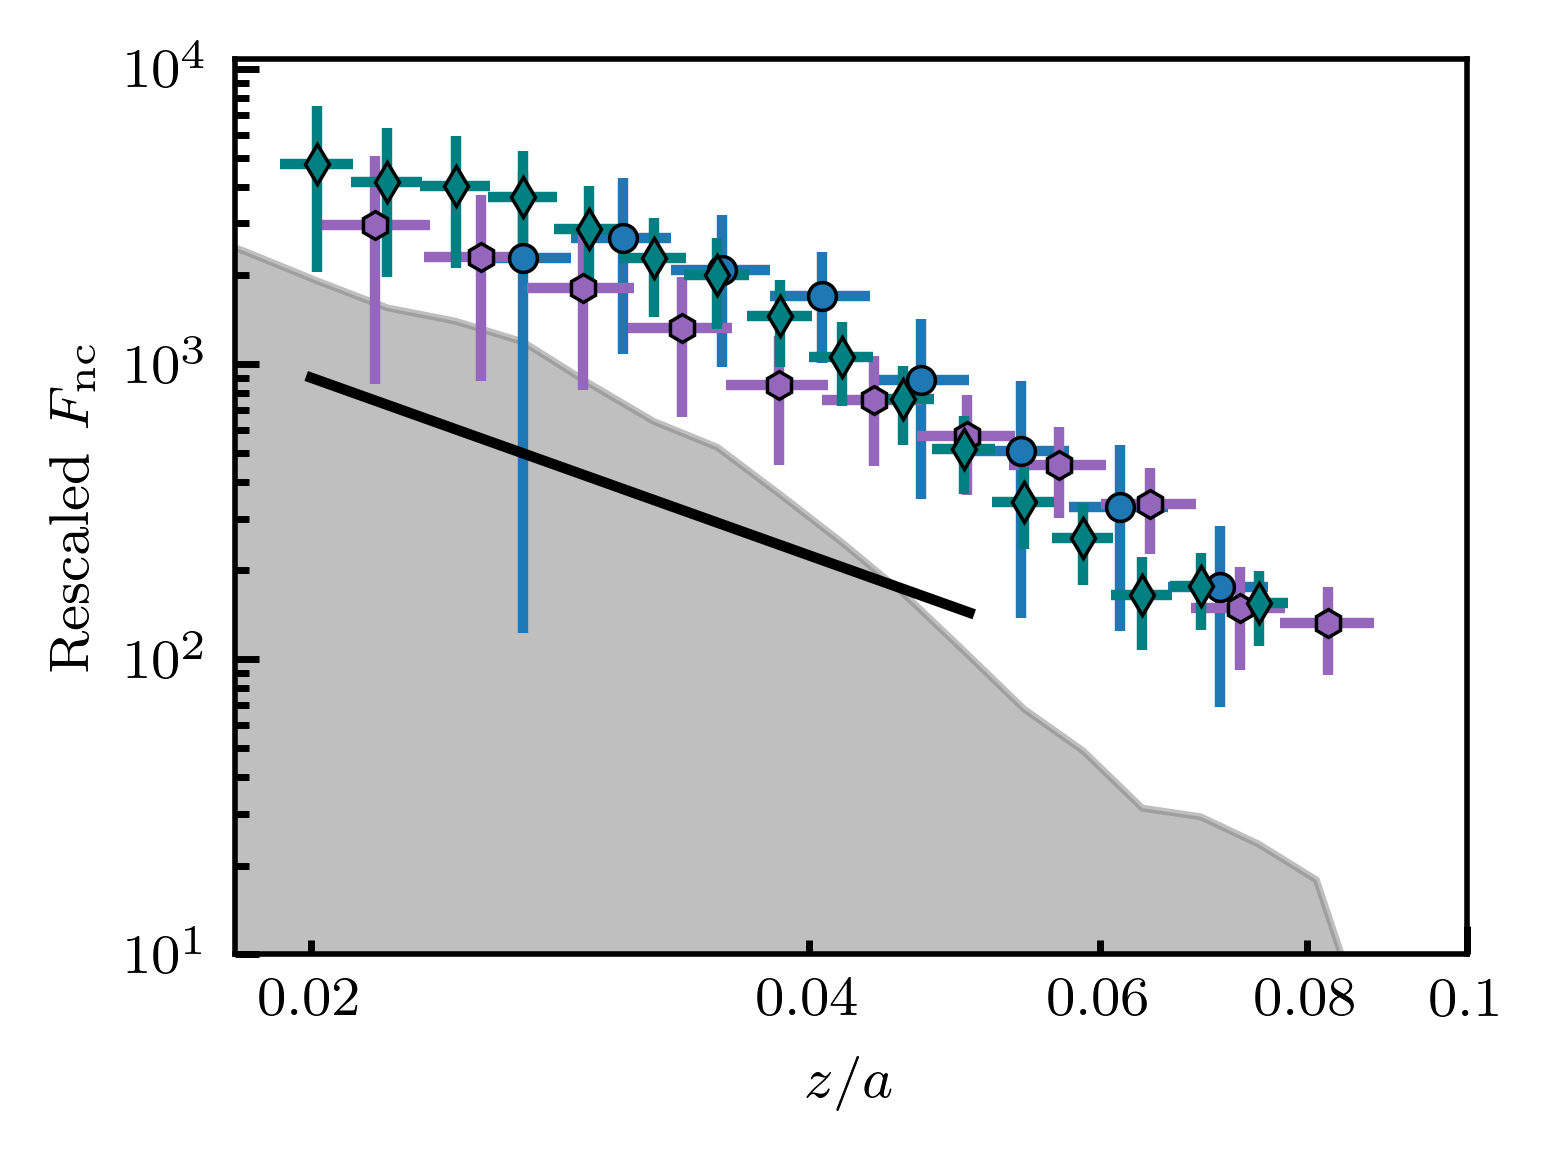

In [117]:
fig, ax1 = plt.subplots(1, 1, figsize=(8/2.54, 6/2.54))

i = 1
ax1.errorbar(
    zz / a_oil_water, FR_oil_water, yerr = err_FR_oil_water, xerr = dzz / a_oil_water, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'$\eta$', 
)

i = 2
ax1.errorbar(
    zz_oil_waterEG30 / a_oil_waterEG30, FR_oil_waterEG30, yerr = err_FR_oil_waterEG30, xerr = dzz_oil_waterEG30 / a_oil_waterEG30, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'$2.1\eta$', 
)

i = 3
ax1.errorbar(
    zz_oil_waterEG40 / a_oil_waterEG40, FR_oil_waterEG40, yerr = err_FR_oil_waterEG40, xerr = dzz_oil_waterEG40 / a_oil_waterEG40, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'$2.6\eta$', 
)

# Theory
# prefactor = 8 / (4/3*np.pi) #1.248 / (4/3*np.pi*np.sqrt(2)) * 2 * 2 
# aaa = 2e-6
# XXX = np.linspace(0.017, 0.1, 20)
# ax1.plot(XXX, prefactor * XXX ** -2, '-k')

# # Theoretical error rescaled
# # ax1.axhline(y=datas_wEG40[0]['y_F_err_th'][0] / 0.0026 ** 2 / 4e-21 * 8e-3 * 1070 * a_oil_waterEG40 ** 2, ls='--')
# thermal_error_R = datas_wEG40[0]['y_F_err_th'][0] / 0.0026 ** 2 / 4e-21 * 8e-3 * 1070 * a_oil_waterEG40 ** 2
# ax1.fill_between(
#     XXX, np.zeros(len(XXX)), np.ones(len(XXX)) * thermal_error_R, 
#     alpha=0.5, color='gray', 
# )
prefactor = 0.18 * 2 
XXX = np.linspace(0.02, 0.05, 20)
ax1.plot(XXX, prefactor * XXX ** -2, '-k')

# Theoretical error rescaled
# thermal_error_R = datas_wEG40[0]['y_F_err_th'][0] #err_F_oil_waterEG40[0]
# thermal_error_R = thermal_error_R / 0.0026 ** 2 / 4e-21 * 8e-3 * 1070 * a_oil_waterEG40 ** 2
# XXXX = np.linspace(0.005, 0.5, 20)
# ax1.fill_between(
#     XXXX, np.zeros(len(XXXX)), np.ones(len(XXXX)) * thermal_error_R, 
#     alpha=0.5, color='gray', 
# )
x_force_error = datas_wEG40[0]['x_F_nc']
y_force_error = datas_wEG40[0]['err_F_tot'] #+ datas_wEG40[0]['y_F_err_th'][:len(datas_wEG40[0]['err_F_tot'])]
x_force_error_R = x_force_error / a_oil_waterEG40
y_force_error_R = y_force_error / 0.0026 ** 2 / 4e-21 * 8e-3 * 1070 * a_oil_waterEG40 ** 2
ax1.fill_between(
    x_force_error_R, np.zeros(len(x_force_error_R)), y_force_error_R, 
    alpha=0.5, color='gray', 
)


# ax1.legend(frameon=False, handletextpad=0.5)
ax1.set(
    xlabel='$z / a$', 
    ylabel='Rescaled $F_\mathrm{nc}$', 
    xscale='log', 
    yscale='log',
    xlim=[0.018, 0.1], 
    ylim=[10, None], 
)
ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax1.xaxis.set_major_formatter('{x:.1f}')
ax1.xaxis.set_minor_locator(MultipleLocator(0.02))
ax1.xaxis.set_minor_formatter('{x:.2f}')
ax1.tick_params(which='both', width=1)
ax1.xaxis.set_tick_params(which='major', length=4)
ax1.xaxis.set_tick_params(which='minor', length=2)

plt.tight_layout()
plt.show()

In [118]:
# fig.savefig('fig_Fnc.pdf')

## Figure Fnc for paper

In [119]:
# /!\
# Should re load the data for pannel A here 
# /!\

data = datas_water[0]

x_F_eq = data['x_F_eq']
y_F_eq = data['y_F_eq']
x_F_eq_theory = data['x_F_eq_theory']
y_F_eq_theory = data['y_F_eq_theory']
x_F_tot = data['x_F_tot']
y_F_tot = data['y_F_tot']
z_D_max = data['z_D_max']
x_F_err_th = data['x_F_err_th'][data['x_F_err_th'] < z_D_max]
y_F_err_th = data['y_F_err_th'][data['x_F_err_th'] < z_D_max]
x_F_nc = data['x_F_nc']
y_F_nc = data['y_F_nc']

In [120]:
data['n_bins']

30

In [121]:
# /!\
# Data must be analyzed again 
# To save err_F_tot
# MUST BE CHANGED IN THE FULL ANALYSIS
# /!\

In [122]:
5.4/1.68

3.2142857142857144

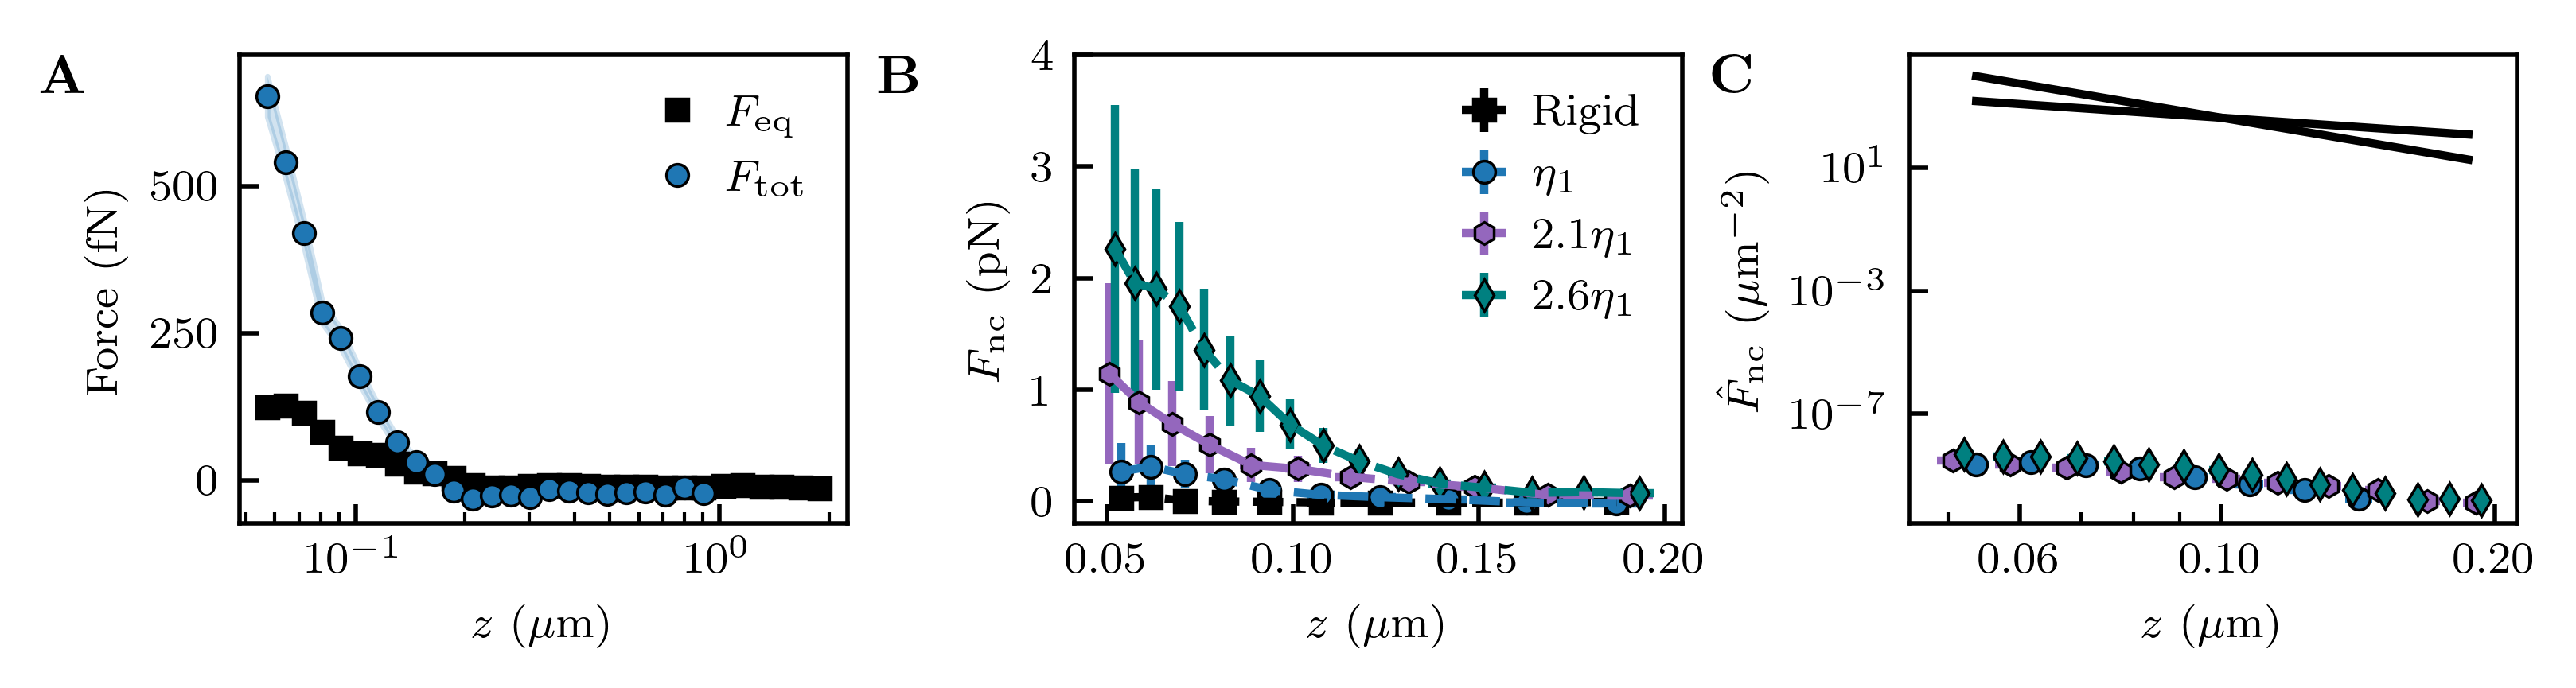

In [123]:
# Pannel Fnc 

fig, axes = plt.subplots(1, 3, figsize=(16/2.54, 4/2.54))
ax1, ax2, ax3 = axes


# -------------------------------------------------------------------------------------------------
# ---------- Plots
# -------------------------------------------------------------------------------------------------

ax1.plot(x_F_eq * 1e6, y_F_eq * 1e15, markers[0], markerfacecolor=colors[0], markersize=4, markeredgecolor='k', markeredgewidth=0.5, label="$F_\mathrm{eq}$")
ax1.plot(x_F_tot * 1e6, y_F_tot * 1e15, markers[1], markerfacecolor=colors[1], markersize=4, markeredgecolor='k', markeredgewidth=0.5, label="$F_\mathrm{tot}$")
# ax1.fill_between(
#     x_F_eq_theory * 1e6, (y_F_eq_theory - 1/2 * y_F_err_th)*1e15, (y_F_eq_theory + 1/2 * y_F_err_th)*1e15, 
#     alpha = 0.2, color ="k", label = "Thermal noise", 
# )
ax1.fill_between(
    x_F_tot * 1e6, (y_F_tot - y_F_err_th) * 1e15, (y_F_tot + y_F_err_th) * 1e15, 
    alpha = 0.2, color =colors[1],
)

i = 0
ax2.errorbar(
    zz * 1e6, FF_PS * 1e12, yerr = err_F_PS_water * 1e12, xerr = dzz / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label='Rigid', 
)
ax2.plot(
    zz_smoothed_PS * 1e6, FFsmoothed_PS * 1e12, 
    ls='--', c=colors[i], linewidth=1.5, 
    zorder=3, 
)

i = 1
ax2.errorbar(
    zz * 1e6, FF_oil_water * 1e12, yerr = err_F_oil_water * 1e12, xerr = dzz / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'$\eta_1$', 
)
ax2.plot(
    zz_smoothed_oil_water * 1e6, FFsmoothed_oil_water * 1e12, 
    ls='--', c=colors[i], linewidth=1.5, 
    zorder=3, 
)
ax3.errorbar(
    zz * 1e6, FR_oil_water * 1e-12, yerr = 0, xerr = dzz / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'$\eta_1$', 
)

i = 2
ax2.errorbar(
    zz_oil_waterEG30 * 1e6, FF_oil_waterEG30 * 1e12, yerr = err_F_oil_waterEG30 * 1e12, xerr = dzz_oil_waterEG30 / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'2.1$\eta_1$', 
)
ax2.plot(
    zz_smoothed_oil_waterEG30 * 1e6, FFsmoothed_oil_waterEG30 * 1e12, 
    ls='--', c=colors[i], linewidth=1.5, 
    zorder=3, 
)
ax3.errorbar(
    zz_oil_waterEG30 * 1e6, FR_oil_waterEG30 * 1e-12, yerr = 0, xerr = dzz_oil_waterEG30 / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'$2.1\eta_1$', 
)

i = 3
ax2.errorbar(
    zz_oil_waterEG40 * 1e6, FF_oil_waterEG40 * 1e12, yerr = err_F_oil_waterEG40 * 1e12, xerr = dzz_oil_waterEG40 / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'2.6$\eta_1$', 
)
ax2.plot(
    zz_smoothed_oil_waterEG40 * 1e6, FFsmoothed_oil_waterEG40 * 1e12, 
    ls='--', c=colors[i], linewidth=1.5, 
    zorder=3, 
)
ax3.errorbar(
    zz_oil_waterEG40 * 1e6, FR_oil_waterEG40 * 1e-12, yerr = 0, xerr = dzz_oil_waterEG40 / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'$2.6\eta_1$', 
)

# ax3.plot(
#     zz * 1e6, rescale_force(FF_oil_waterEG30, eta_m=0.0021, rho_p=1070, gamma=8e-3) * 1e-12, 
#     ls='--', c='k', linewidth=1.5, 
#     zorder=3, 
# )
prefactor = 1.248 / (4/3*np.pi*np.sqrt(2)) * 2 * 2
ax3.plot(zz * 1e6, prefactor / zz ** 2 * 5e-12, '-k')
ax3.plot(zz * 1e6, prefactor / zz ** 5/2 * 1e-32, '-k')



# -------------------------------------------------------------------------------------------------
# ---------- General properties
# -------------------------------------------------------------------------------------------------

ax1.legend(frameon=False, handletextpad=0.1)
ax1.set(
    xlabel="$z$ ($\mu$m)", 
    ylabel="Force (fN)", 
    xscale="log", 
    yscale="linear", 
    yticks=[0, 250, 500],
)
ax2.legend(frameon=False, loc='upper right', handletextpad=0.1)
ax2.set(
    xlabel="$z$ ($\mu$m)", 
    ylabel="$F_\mathrm{nc}$ (pN)", 
    xscale="linear", 
    yscale="linear", 
    xticks=[0.05, 0.1, 0.15, 0.2], 
    yticks=[0, 1, 2, 3, 4],
)
ax3.set(
    xlabel="$z$ ($\mu$m)", 
    ylabel="$\hat{F}_\mathrm{nc}$ ($\mu$m$^{-2}$)", 
    xscale="log", 
    yscale="log", 
    xticks=[0.06, 0.1, 0.2], 
)
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax3.xaxis.set_major_formatter(formatter)

ax1.annotate(
    "$\mathbf{A}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.25, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=10, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax2.annotate(
    "$\mathbf{B}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.25, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=10, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax3.annotate(
    "$\mathbf{C}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.25, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=10, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)

plt.tight_layout(pad=0.2)
plt.show()

In [94]:
# fig.savefig('figure_4_science.pdf')

In [124]:
# Load data for the inset about the transient force
ddd = loadmat('../2nd_try_only_perfect_exp/AR1000_water_EG_40/data_after_analysis/force_tau_traj_rp_2p5836_np_1p4623_vid_5_50fps.mat', squeeze_me=True)

# Correct the data to account for z0
z0_wEG40 = datas_wEG40[0]['fitted_z0']
ddd['bins_left'] = ddd['bins_left'] - z0_wEG40


# Rk: 
# This step is necessary because the force(tau) was computed
# Before the multifit

/tmp/ipykernel_1250914/4148645309.py:255: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.2)


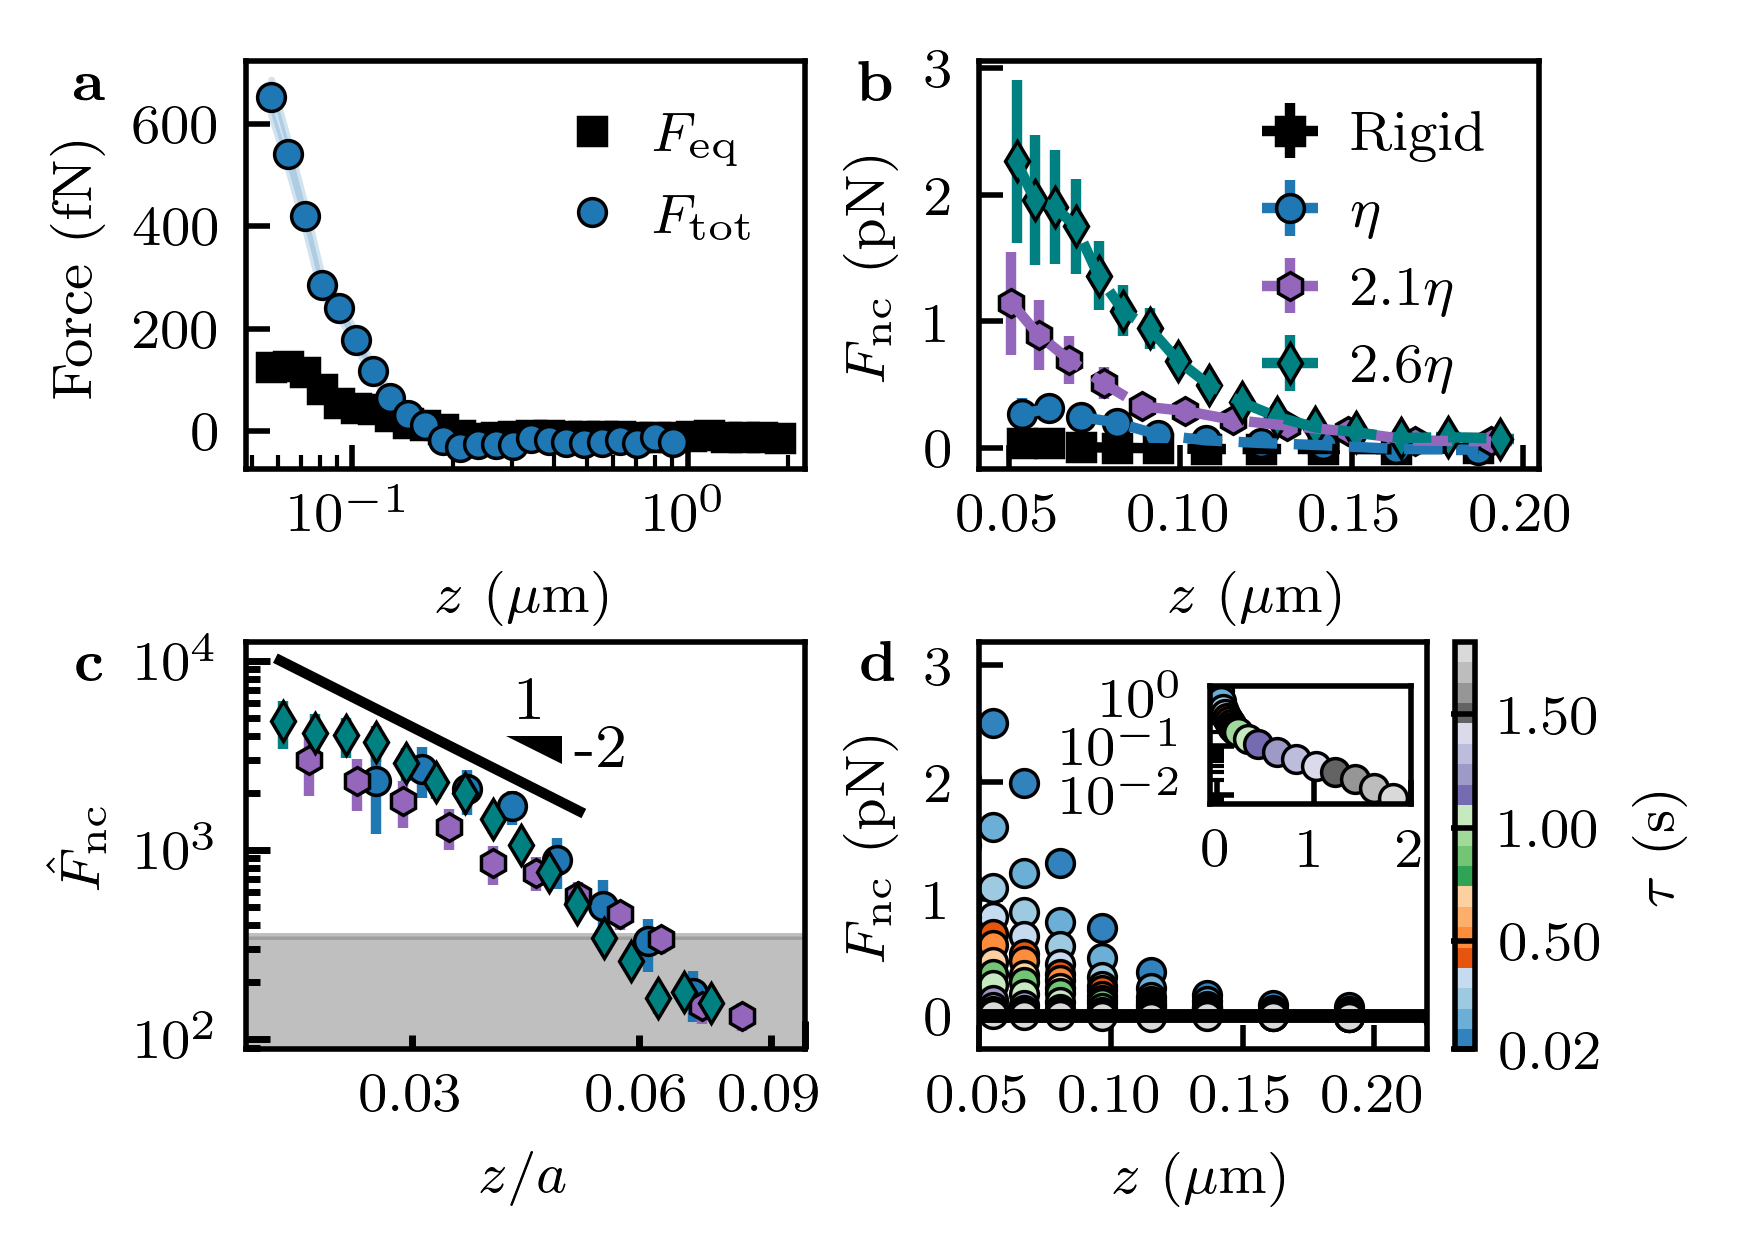

In [150]:
# Pannel Fnc 

fig, axes = plt.subplots(2, 2, figsize=(8.5/2.54, 6/2.54))
[[ax1, ax2], [ax3, ax4]] = axes


# -------------------------------------------------------------------------------------------------
# ---------- Plots
# -------------------------------------------------------------------------------------------------

ax1.plot(x_F_eq * 1e6, y_F_eq * 1e15, markers[0], markerfacecolor=colors[0], markersize=4, markeredgecolor='k', markeredgewidth=0.5, label="$F_\mathrm{eq}$")
ax1.plot(x_F_tot * 1e6, y_F_tot * 1e15, markers[1], markerfacecolor=colors[1], markersize=4, markeredgecolor='k', markeredgewidth=0.5, label="$F_\mathrm{tot}$")
# ax1.fill_between(
#     x_F_eq_theory * 1e6, (y_F_eq_theory - 1/2 * y_F_err_th)*1e15, (y_F_eq_theory + 1/2 * y_F_err_th)*1e15, 
#     alpha = 0.2, color ="k", label = "Thermal noise", 
# )
ax1.fill_between(
    x_F_tot * 1e6, (y_F_tot - y_F_err_th) * 1e15, (y_F_tot + y_F_err_th) * 1e15, 
    alpha = 0.2, color =colors[1],
)

i = 0
ax2.errorbar(
    zz * 1e6, FF_PS * 1e12, yerr = err_F_PS_water * 1e12 / 2, xerr = dzz / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label='Rigid', 
)
ax2.plot(
    zz_smoothed_PS * 1e6, FFsmoothed_PS * 1e12, 
    ls='--', c=colors[i], linewidth=1.5, 
    zorder=3, 
)

i = 1
ax2.errorbar(
    zz * 1e6, FF_oil_water * 1e12, yerr = err_F_oil_water * 1e12 / 2, xerr = dzz / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'$\eta$', 
)
ax2.plot(
    zz_smoothed_oil_water * 1e6, FFsmoothed_oil_water * 1e12, 
    ls='--', c=colors[i], linewidth=1.5, 
    zorder=3, 
)
ax3.errorbar(
    zz / a_oil_water, FR_oil_water, yerr = err_FR_oil_water / 2, xerr = dzz / a_oil_water * 0, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'$\eta_1$', 
)

i = 2
ax2.errorbar(
    zz_oil_waterEG30 * 1e6, FF_oil_waterEG30 * 1e12, yerr = err_F_oil_waterEG30 * 1e12 / 2, xerr = dzz_oil_waterEG30 / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'2.1$\eta$', 
)
ax2.plot(
    zz_smoothed_oil_waterEG30 * 1e6, FFsmoothed_oil_waterEG30 * 1e12, 
    ls='--', c=colors[i], linewidth=1.5, 
    zorder=3, 
)
ax3.errorbar(
    zz_oil_waterEG30 / a_oil_waterEG30, FR_oil_waterEG30, yerr = err_FR_oil_waterEG30 / 2, xerr = dzz_oil_waterEG30 / a_oil_waterEG30 * 0, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'$2.1\eta_1$', 
)

i = 3
ax2.errorbar(
    zz_oil_waterEG40 * 1e6, FF_oil_waterEG40 * 1e12, yerr = err_F_oil_waterEG40 * 1e12 / 2, xerr = dzz_oil_waterEG40 / 2 * 1e6, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'2.6$\eta$', 
)
ax2.plot(
    zz_smoothed_oil_waterEG40 * 1e6, FFsmoothed_oil_waterEG40 * 1e12, 
    ls='--', c=colors[i], linewidth=1.5, 
    zorder=3, 
)
ax3.errorbar(
    zz_oil_waterEG40 / a_oil_waterEG40, FR_oil_waterEG40, yerr = err_FR_oil_waterEG40 / 2, xerr = dzz_oil_waterEG40 / a_oil_waterEG40 * 0, 
    ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
    ecolor=colors[i], elinewidth=1.5, 
    label=r'$2.6\eta_1$', 
)

# ax3.plot(
#     zz * 1e6, rescale_force(FF_oil_waterEG30, eta_m=0.0021, rho_p=1070, gamma=8e-3) * 1e-12, 
#     ls='--', c='k', linewidth=1.5, 
#     zorder=3, 
# )
# prefactor = 1.248 / (4/3*np.pi*np.sqrt(2)) * 2 * 2
# ax3.plot(zz * 1e6, prefactor / zz ** 2 * 5e-12, '-k')
# ax3.plot(zz * 1e6, prefactor / zz ** 5/2 * 1e-32, '-k')


cmap = 'tab20c'
vmin = ddd['ttt'][0] #- timestep_diffusion
vmax = ddd['ttt'][-1] #- timestep_diffusion
# ax4.plot(ddd['bins_left'] * 1e6, ddd['y_F_eq_trunc'] * 1e12, 'h', markerfacecolor='tab:red', markersize=4, markeredgecolor='k', markeredgewidth=0.5, label="Equilibrium")
ax4.plot(ddd['bins_left'] * 1e6, ddd['F_eq_theoretical'] * 1e12 * 0, ls='-', linewidth=2, c='k', zorder=3, label="Equilibrium")
for i in range(0, 5, 1):
    ax4.plot(
        ddd['bins_left'] * 1e6, ddd['F_nc_tau'][:,i] * 1e12, 
        'o', markersize=4, markeredgewidth=0.5, c=mpl.cm.get_cmap(cmap)(i), 
        label=ddd['tau'][i], 
    )
for i in range(5, len(ddd['tau']), 2):
    ax4.plot(
        ddd['bins_left'] * 1e6, ddd['F_nc_tau'][:,i] * 1e12, 
        'o', markersize=4, markeredgewidth=0.5, c=mpl.cm.get_cmap(cmap)(i), 
        label=ddd['tau'][i], 
    ) 
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap=cmap), ax=ax4, ticks=[0.02, 0.5, 1, 1.5], label=r'$\tau$ (s)')


# -------------------------------------------------------------------------------------------------
# ---------- Theory rescaled
# -------------------------------------------------------------------------------------------------

prefactor = 4 #32 / (4/3) #1.248 / (4/3*np.pi*np.sqrt(2)) * 2 * 2
XXX = np.linspace(0.02, 0.05, 20)
aaa = 2e-6
ax3.plot(XXX, prefactor * XXX ** -2, '-k')

# Theoretical error rescaled
thermal_error_R = datas_wEG40[0]['y_F_err_th'][0] #err_F_oil_waterEG40[0]
thermal_error_R = thermal_error_R / 0.0026 ** 2 / 4e-21 * 8e-3 * 1070 * a_oil_waterEG40 ** 2
XXXX = np.linspace(0.005, 0.5, 20)
ax3.fill_between(
    XXXX, np.zeros(len(XXXX)), np.ones(len(XXXX)) * thermal_error_R, 
    alpha=0.5, color='gray', 
)


# -------------------------------------------------------------------------------------------------
# ---------- Inset fig transient
# -------------------------------------------------------------------------------------------------

left, bottom, width, height = [0.7, 0.35, 0.12, 0.1]
ax5 = fig.add_axes([left, bottom, width, height])
# ax5.plot(ddd['ttt'], ddd['mean_F_nc_tau'] * 1e12, 'o', markersize=4, markeredgewidth=0.5, c='tab:red')
# ax5.plot(ddd['ttt'], ddd['mean_F_nc_tau'] * 1e12, 'o', markersize=4, markeredgewidth=0.5, c='k')
for i in range(len(ddd['tau'])):
    # ax5.plot(ddd['ttt'][i], ddd['F_nc_tau'][0,i] * 1e12, 'o', markersize=4, markeredgewidth=0.5, c=mpl.cm.get_cmap(cmap)(i))
    ax5.plot(ddd['ttt'][i], ddd['mean_F_nc_tau'][i] * 1e12, 'o', markersize=4, markeredgewidth=0.5, c=mpl.cm.get_cmap(cmap)(i))
# ax5.plot(ddd['ttt'], 1/ ddd['ttt'] * np.exp(-ddd['ttt']), '-k')
ax5.set(
    xscale='linear', 
    yscale='log',
    # xlabel=r'$\tau$ (s)', 
    # ylabel=r"$\langle F_\mathrm{nc} \rangle_z$ (pN)", 
)
ax5.set_xticks([0, 1, 2])
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax5.xaxis.set_major_formatter(formatter)
ax5.xaxis.set_major_formatter('{x:.0f}')




# -------------------------------------------------------------------------------------------------
# ---------- General properties
# -------------------------------------------------------------------------------------------------

ax1.legend(frameon=False, handletextpad=0.1)
ax1.set(
    xlabel="$z$ ($\mu$m)", 
    ylabel="Force (fN)", 
    xscale="log", 
    yscale="linear", 
    # yticks=[0, 250, 500],
    yticks=[0, 200, 400, 600],
)
ax2.legend(frameon=False, loc='upper right', handletextpad=0.1)
ax2.set(
    xlabel="$z$ ($\mu$m)", 
    ylabel="$F_\mathrm{nc}$ (pN)", 
    xscale="linear", 
    yscale="linear", 
    xticks=[0.05, 0.1, 0.15, 0.2], 
    yticks=[0, 1, 2, 3],
)
ax3.set(
    xlabel='$z / a$', 
    ylabel='$\hat{F}_\mathrm{nc}$', 
    xscale='log', 
    yscale='log',
    # xticks=[0.02, 0.05, 0.08], 
    xlim=[0.018, 0.1], 
)
# ax3.xaxis.set_major_locator(MultipleLocator(0.1))
ax3.xaxis.set_major_formatter('{x:.1f}')
ax3.xaxis.set_major_formatter('')
ax3.xaxis.set_minor_locator(MultipleLocator(0.03))
ax3.xaxis.set_minor_formatter('{x:.2f}')
ax3.tick_params(which='both', width=1)
ax3.xaxis.set_tick_params(which='major', length=4)
ax3.xaxis.set_tick_params(which='minor', length=2)
# ax4.legend(frameon=False)
ax4.set(
    xlabel="$z$ ($\mu$m)", 
    ylabel="$F_\mathrm{nc}$ (pN)", 
    xscale="linear", 
    yscale="linear", 
    xlim=[0.05, 0.22], 
    ylim=[None, 3.2], 
    xticks=[0.05, 0.1, 0.15, 0.2], 
    yticks=[0, 1, 2, 3],
)

ax1.annotate(
    "$\mathbf{a}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.25, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=8, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax2.annotate(
    "$\mathbf{b}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.15, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=8, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax3.annotate(
    "$\mathbf{c}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.25, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=8, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax4.annotate(
    "$\mathbf{d}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(-0.18, 1), textcoords='axes fraction', 
    # weight='bold',
    fontsize=8, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)

annotation.slope_marker((0.04, 4e3), (-2,1), invert=False, ax=ax3, text_kwargs={'color': 'k', 'fontsize':9}, poly_kwargs={'facecolor': 'k'})

plt.subplots_adjust(wspace=1, hspace=1)

plt.tight_layout(pad=0.2)
plt.show()

In [151]:
# fig.savefig('figure_4.pdf')

In [127]:
4.5e-3 / (6e-34 * 3e8 / 470e-9 * np.pi * 1.6e-3 * 0.5e-3)

4.675176453324425e+21

In [128]:
# def F_test_2(z, gamma=10e-3, eta=0.001, rho=1050, kT=4e-21):
#     prefactor = 1.248 / (4/3*np.pi*np.sqrt(2)) * 2
#     return prefactor * (eta ** 2 * kT) / (gamma * rho) * 1 / z ** 2

In [129]:
# gamma = 4e-3

# F_theory_1 = F_test(zz, gamma, eta=0.001, rho=1070) 
# F_theory_2 = F_test(zz, gamma, eta=0.0018, rho=1070)
# F_theory_3 = F_test(zz, gamma, eta=0.003, rho=1070)

In [130]:
# fig, ax1 = plt.subplots(1, 1, figsize=(8/2.54, 6/2.54))

# # i = 0
# # ax1.errorbar(
# #     zz * 1e6, FF_PS * 1e15, yerr = dFF_PS * 1e15, xerr = dzz / 2 * 1e6, 
# #     ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
# #     ecolor=colors[i], elinewidth=1.5, 
# #     label='Rigid', 
# # )

# i = 1
# ax1.errorbar(
#     zz * 1e6, FF_oil_water * 1e15, yerr = dFF_oil_water * 1e15, xerr = dzz / 2 * 1e6, 
#     ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
#     ecolor=colors[i], elinewidth=1.5, 
#     label=r'Soft, $\eta_1$', 
# )

# i = 2
# ax1.errorbar(
#     zz * 1e6, FF_oil_waterEG30 * 1e15, yerr = dFF_oil_water * 1e15, xerr = dzz / 2 * 1e6, 
#     ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
#     ecolor=colors[i], elinewidth=1.5, 
#     label=r'Soft, $\eta_2$', 
# )

# i = 3
# ax1.errorbar(
#     zz * 1e6, FF_oil_watergl38 * 1e15, yerr = dFF_oil_watergl38 * 1e15, xerr = dzz / 2 * 1e6, 
#     ls='', marker=markers[i], markerfacecolor=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, 
#     ecolor=colors[i], elinewidth=1.5, 
#     label=r'Soft, $\eta_3$', 
# )

# ax1.plot(zz * 1e6, F_theory_1 * 1e15, c='tab:red')
# ax1.plot(zz * 1e6, F_theory_2 * 1e15, c='tab:orange')
# ax1.plot(zz * 1e6, F_theory_3 * 1e15, c='tab:purple')

# ax1.legend(frameon=False)
# ax1.set(
#     xlabel='$z$ (µm)', 
#     ylabel='$F_\mathrm{NC}$ (fN)', 
#     xscale='log', 
#     yscale='log', 
# )

# plt.tight_layout()
# plt.show()

# Plot Sedimentations

In [131]:
data = loadmat('../sedimentation/sedimentation_20231102_AR1000_water_EG30.mat', squeeze_me=True)

FileNotFoundError: [Errno 2] No such file or directory: './sedimentation/sedimentation_20231102_AR1000_water_EG30.mat'

In [63]:
# data

In [64]:
delta_time = data['delta_time']
drift_z = data['drift_z']
MSD_para = data['MSD_para']

eta_m_from_MSD = data['eta_m_from_MSD']
delta_rho_from_drift = data['delta_rho_from_drift']

v_s_from_drift = data['v_s_from_drift']

a = data['r_p']

D0 = 4e-21 / (6*np.pi * eta_m_from_MSD * a)

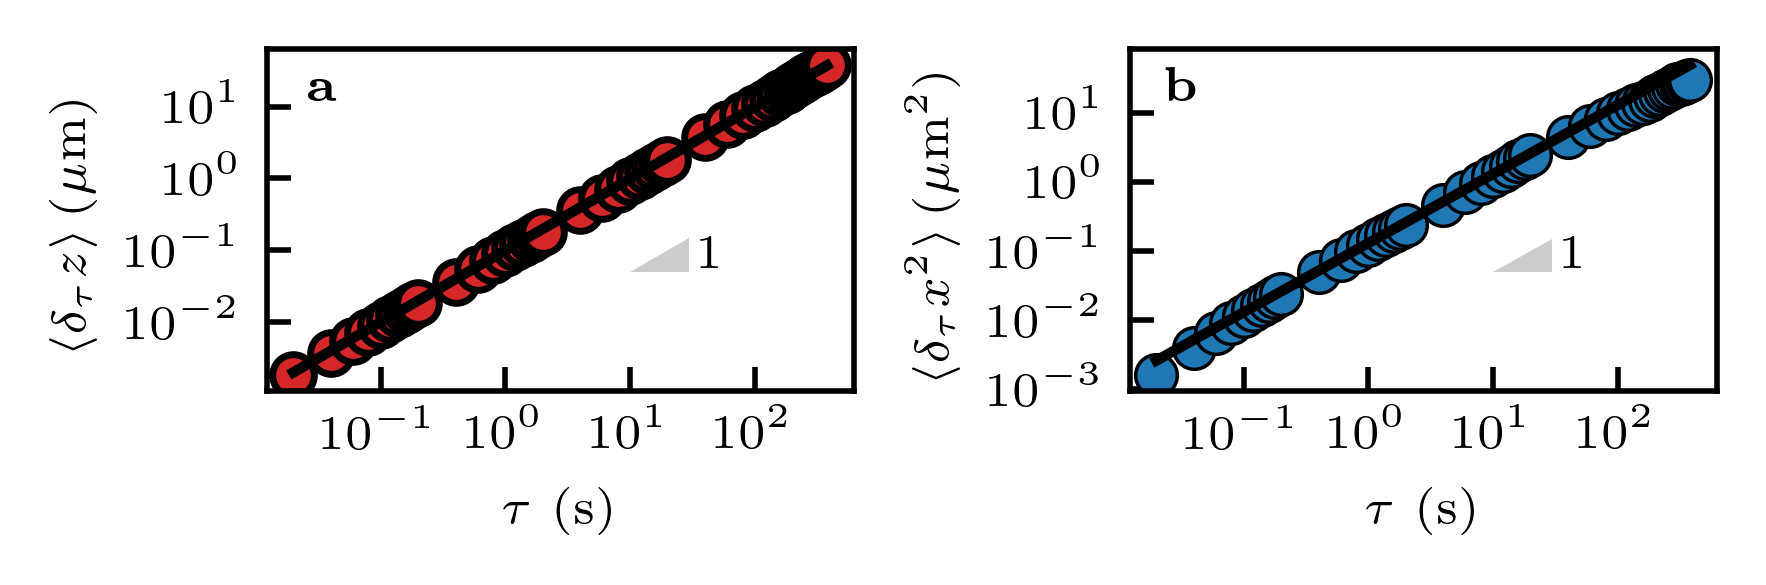

In [65]:
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(9/2.54, 3/2.54))


# Drift z
ax1.plot(delta_time, np.abs(drift_z) * 1e6, 'o', c='tab:red', label="$z$")
ax1.plot(delta_time, np.abs(v_s_from_drift * delta_time) * 1e6, ls='-', c='k')

# ax.legend()
ax1.set(
    xlabel=r"$\tau$ (s)", 
    ylabel=r"$\langle \delta_\tau z \rangle \, \mathrm{(\mu m)}$", 
    xscale='log', 
    yscale='log', 
    # yticks=[1e-4, 1e-3, 1e-2, 1e-1, 1], 
)

locmaj = mpl.ticker.LogLocator(base=10,numticks=6) 
ax1.xaxis.set_major_locator(locmaj)
# locmin = mpl.ticker.LogLocator(base=10,subs=(0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=6)
# ax1.xaxis.set_minor_locator(locmin)
# ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
locmaj = mpl.ticker.LogLocator(base=10,numticks=10) 
ax1.yaxis.set_major_locator(locmaj)

annotation.slope_marker((10, 0.05), 1, ax=ax1)


# MSD x
ax2.plot(delta_time, MSD_para * 1e12, 'o', markerfacecolor='tab:blue', markersize=6, markeredgecolor='k', markeredgewidth=0.5, label="Para.")
ax2.plot(delta_time, 2 * D0 * delta_time * 1e12, ls='-', c='k', linewidth=1.5)

# ax2.annotate(
#     r"$\eta$ = {:.2f} mPa.s".format(eta_m_from_MSD*1e3), 
#     xy=(0.2, 0.8), xytext=(0.2,0.8), xycoords='axes fraction', textcoords='axes fraction', 
# )

# ax.legend()
ax2.set(
    xscale='log',
    yscale='log', 
    xlabel=r'$\tau$ (s)', 
    ylabel=r'$\langle \delta_\tau x ^2 \rangle \, \mathrm{(\mu m^2)}$', 
)

locmaj = mpl.ticker.LogLocator(base=10,numticks=6) 
ax2.xaxis.set_major_locator(locmaj)
locmaj = mpl.ticker.LogLocator(base=10,numticks=10) 
ax2.yaxis.set_major_locator(locmaj)

annotation.slope_marker((10, 0.05), 1, ax=ax2)


ax1.annotate(
    "$\mathbf{a}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(0.12, 0.95), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)
ax2.annotate(
    "$\mathbf{b}$", 
    xy=(0, 0),  xycoords='axes fraction', xytext=(0.12, 0.95), textcoords='axes fraction', 
    # weight='bold',
    fontsize=7, 
    color='k',  
    horizontalalignment='right', verticalalignment='top', 
)


plt.tight_layout()
plt.show()

In [66]:
# fig.savefig('figure_SI_sedimentation.pdf')

In [244]:
data['r_p']

1.5869999999999998e-06

# Plot theoretical ideas

In [62]:
def Dz_z(z, r=1.5e-6):
    res = (6 * z * z + 2 * r * z) / (6 * z * z + 9 * r * z + 2 * r * r)
    return res

def Dx_z(z, r=1.5e-6):
    res = 1 - 9/16 * (r / (z + r)) + 1/8 * (r / (z + r)) ** 3 - 45/256 * (r / (z + r)) ** 4 - 1/16 * (r / (z + r)) ** 5
    return res

In [63]:
zz = np.linspace(30e-9, 1e-6, 100) 
aa = 0.75e-6 + np.arange(0,14,1) / 4 * 1e-6
aa

array([7.50e-07, 1.00e-06, 1.25e-06, 1.50e-06, 1.75e-06, 2.00e-06,
       2.25e-06, 2.50e-06, 2.75e-06, 3.00e-06, 3.25e-06, 3.50e-06,
       3.75e-06, 4.00e-06])

In [64]:
kT = 4e-21
eta = 0.002

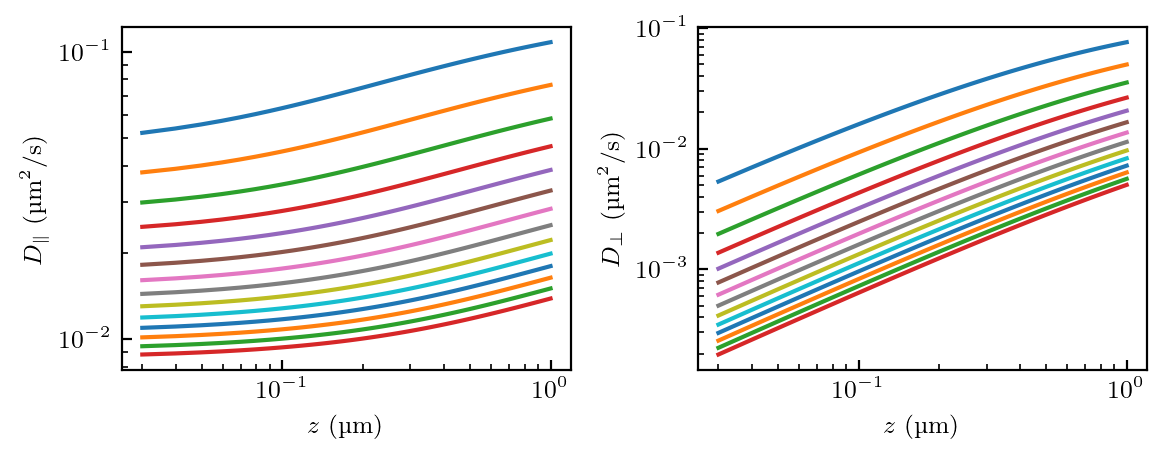

In [65]:
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(15/2.54,6/2.54))

for i, a in enumerate(aa):
    D0 = kT / (6 * np.pi * eta * a)
    ax1.plot(zz * 1e6, Dx_z(zz, r=a) * D0 * 1e12)
    ax2.plot(zz * 1e6, Dz_z(zz, r=a) * D0 * 1e12)
    
ax1.set(
    xscale='log', 
    yscale='log', 
    xlabel=r'$z$ (µm)', 
    ylabel=r'$D_\parallel$ (µm$^2$/s)', 
)
ax2.set(
    xscale='log', 
    yscale='log', 
    xlabel=r'$z$ (µm)', 
    ylabel=r'$D_\perp$ (µm$^2$/s)', 
)

plt.tight_layout()
plt.show()

In [66]:
gamma = 8e-3

zzz = np.linspace(30e-9, 100e-9, 100)

def F(z, b=0, gamma=10e-3, eta=0.001, rho=1050, kT=4e-21):
    z = z + b
    prefactor = 1.248 / (4/3*np.pi*np.sqrt(2)) * 2 # gamma / rayon hydro
    return prefactor * (eta ** 2 * kT) / (gamma * rho) * 1 / z ** 2

F_theory_1 = F(zzz, gamma=gamma, eta=0.001, rho=1070) 
F_theory_2 = F(zzz, gamma=gamma, eta=0.0021, rho=1070)
F_theory_3 = F(zzz, gamma=gamma, eta=0.0025, rho=1070)
F_theory_4 = F(zzz, gamma=gamma, eta=0.004, rho=1070)

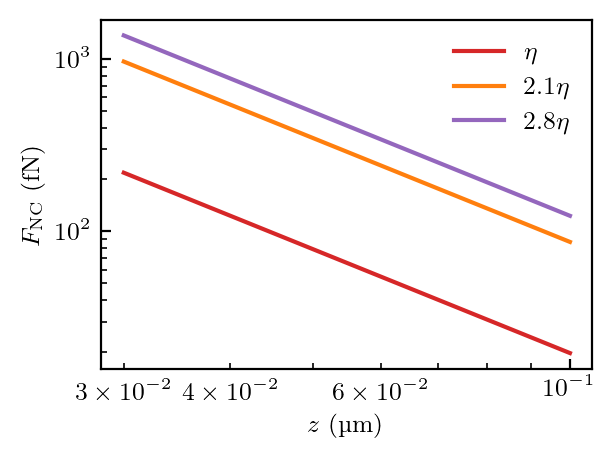

In [67]:
fig, ax1 = plt.subplots(1, 1, figsize=(8/2.54, 6/2.54))


i = 1
ax1.plot(zzz * 1e6, F_theory_1 * 1e15, c=colors[i], label=r"$\eta$")

i = 2
ax1.plot(zzz * 1e6, F_theory_2 * 1e15, c=colors[i], label=r"$2.1\eta$")

i = 3
ax1.plot(zzz * 1e6, F_theory_3 * 1e15, c=colors[i], label=r"$2.8\eta$")

# i = 4
# ax1.plot(zzz * 1e6, F_theory_4 * 1e15, c=colors[i], label=r"$4\eta$")

# ax1.fill_between()

ax1.legend(frameon=False)
ax1.set(
    xlabel='$z$ (µm)', 
    ylabel='$F_\mathrm{NC}$ (fN)', 
    xscale='log', 
    yscale='log',
    # xlim=[None, 3e-1], 
    # ylim=[10, 3000], 
)

plt.tight_layout()
plt.show()

In [787]:
from math import sqrt 
drho = 70
a = 2e-6
g = 9.81
Bo = 1
print(Bo * sqrt(gamma / (drho * g * a)))

2.6983698674848857


In [ ]:
# fig, ax1 = plt.subplots(1, 1, figsize=(8/2.54, 6/2.54))

# ax1.plot()


# ax1.legend(frameon=False)
# ax1.set(
#     xlabel='$z$ (µm)', 
#     ylabel='$F_\mathrm{NC}$ (fN)', 
#     xscale='log', 
#     yscale='log',
#     # xlim=[None, 3e-1], 
#     # ylim=[10, 3000], 
# )

# plt.tight_layout()
# plt.show()

In [134]:
gamma = 10e-3 
rho = 50
g = 9.81
a = 1.5e-6

alpha = gamma / (rho*g*a)
alpha

13.591573224600749

In [133]:
delta = alpha * (alpha + 4)
delta 

239.09715561808702

In [135]:
np.sqrt(delta)

15.462766751719661

In [138]:
xp = 0.5 * (alpha + np.sqrt(delta))
xp

14.527169988160205

In [139]:
xp ** 2 / 2 / a

70346222.62163419

In [140]:
a - alpha

-13.59157172460075

In [141]:
gamma / rho / g / 2 / a

6.795786612300374

In [142]:
alpha ** 2 / 2 / a

61576954.239894666

In [143]:
1.5/8

0.1875